In [369]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os
from matplotlib.backends.backend_pdf import PdfPages

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [370]:
# read data from the CSV file
df = pd.read_csv('covid19-cdc-23200672.csv',  keep_default_na=True, delimiter=',', skipinitialspace=True)

# (1). Prepare a data quality report for the CSV file.

### Check shape of CSV file

In [371]:
# Print rows and columns
rows, columns = df.shape
print(f"Number of rows:{rows}")
print(f"Number of columns:{columns}")

Number of rows:50000
Number of columns:19


### Print first and last 5 rows of CSV file

In [372]:
# Print the first 5 rows
print("First 5 rows:")
print(df.head(5))

First 5 rows:
  case_month res_state  state_fips_code   res_county  county_fips_code  \
0    2020-10        TX             48.0      TARRANT           48439.0   
1    2021-02        CA              6.0  LOS ANGELES            6037.0   
2    2020-12        FL             12.0          NaN               NaN   
3    2022-01        PA             42.0    LANCASTER           42071.0   
4    2022-07        MI             26.0      OAKLAND           26125.0   

   age_group     sex   race            ethnicity  \
0  65+ years  Female  White      Hispanic/Latino   
1  65+ years    Male  White      Hispanic/Latino   
2  65+ years  Female  White  Non-Hispanic/Latino   
3  65+ years    Male  White  Non-Hispanic/Latino   
4  65+ years  Female  White  Non-Hispanic/Latino   

   case_positive_specimen_interval  case_onset_interval  process exposure_yn  \
0                              NaN                  NaN  Missing     Missing   
1                              NaN                  NaN  Missing    

In [373]:
# Print the last 5 rows
print("\nLast 5 rows:")
print(df.tail(5))


Last 5 rows:
      case_month res_state  state_fips_code res_county  county_fips_code  \
49995    2020-12        NC             37.0    CHATHAM           37037.0   
49996    2021-08        KS             20.0        NaN               NaN   
49997    2021-10        OH             39.0   WILLIAMS           39171.0   
49998    2022-01        OH             39.0   FRANKLIN           39049.0   
49999    2020-11        IN             18.0    ELKHART           18039.0   

            age_group     sex     race            ethnicity  \
49995  50 to 64 years     NaN      NaN                  NaN   
49996  18 to 49 years     NaN      NaN                  NaN   
49997  18 to 49 years    Male    White  Non-Hispanic/Latino   
49998  50 to 64 years  Female  Unknown              Unknown   
49999  18 to 49 years  Female  Unknown              Unknown   

       case_positive_specimen_interval  case_onset_interval  \
49995                              0.0                  NaN   
49996                   

### Convert features to appropriate datatypes

In [374]:
#Datatypes
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

# Segregating data as Continuous and Categorical

continuous_columns = ['case_positive_specimen_interval', 'case_onset_interval']
categorical_columns = ['case_month','res_state','state_fips_code','res_county','county_fips_code','age_group','sex','race','ethnicity','process','exposure_yn','current_status','symptom_status','hosp_yn','icu_yn','death_yn','underlying_conditions_yn']    
df[continuous_columns] = df[continuous_columns].astype('float64')
df[categorical_columns] = df[categorical_columns].astype('category')

Based on examining the data in a spreadsheet program, 17 of the features are categorical and the rest continuous.

**Continuous**

- *case_positive_specimen_interval* Will be converted to **continuous** as the data represents weeks
- *case_onset_interval* Will be converted to **continuous** as the data represents weeks

**Categorical**

- *case_month* Will be converted to **categorical** even though date is continuous because it contains data in the format month-year, taking this as categorical.
- *res_state* Will be converted to **categorical** residing state of the recoded data which is a category.
- *state_fips_code* Will be converted to **categorical** residing state fibs code which is categorical
- *res_county* Will be converted to **categorical** residing country which is categorical
- *county_fips_code* Will be converted to **categorical** residing country fibs code which is categorical
- *age_group* Will be converted to **categorical** age group of the person effected which is categorical 
- *sex* Will be converted to **categorical** sex of the person is a category which is categorical 
- *race* Will be converted to **categorical** race of the person is a category which is categorical 
- *ethnicity* Will be converted to **categorical** ethinicity of the person which is categorical
- *process* Will be converted to **categorical** process of finding covid which is categorical
- *exposure_yn* Will be converted to **categorical** if the person had exposure or not which is categorical
- *current_status* Will be converted to **categorical** current status of the patient which is categorical
- *symptom_status* Will be converted to **categorical** if the person had any symptoms or not which is categorical
- *hosp_yn* Will be converted to **categorical** if the person was hospitalized which is categorical
- *icu_yn* Will be converted to **categorical** if the person was in ICU admitted which is categorical
- *death_yn* Will be converted to **categorical** if the person died or not yes or no which is categorical
- *underlying_conditions_yn* Will be converted to **categorical** if there is any other underlying conditions to the case

In [375]:
# Segrigating data as Continuous and Categorical

continuous_columns = ['case_positive_specimen_interval', 'case_onset_interval']
categorical_columns = ['case_month','res_state','state_fips_code','res_county','county_fips_code','age_group','sex','race','ethnicity','process','exposure_yn','current_status','symptom_status','hosp_yn','icu_yn','death_yn','underlying_conditions_yn']    
df[continuous_columns] = df[continuous_columns].astype('float64')
df[categorical_columns] = df[categorical_columns].astype('category')

In [376]:
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

### Check for duplicate row/columns

In [377]:
print(f"Total number of Duplicate rows(excluding first) are: {df.duplicated().sum()} Rows")
print('Total number of Duplicate rows (including first) are:', df[df.duplicated(keep=False)].shape[0])

Total number of Duplicate rows(excluding first) are: 4661 Rows
Total number of Duplicate rows (including first) are: 7836


In [379]:
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


#### Drop/ Not Drop Duplicates
- There exist a total of 4661 Rows, among which there are chances that some of the duplicates are mere coincidences.
- For instance, they can exist 2 different cases between age groups 65+ who are from the same country and state, lets say brothers sharing the same house who had similar characterstics creating duplicates.Unfortunately, we dont have any means of knowing this.
- This seems to be a very minimal set of data because as in our case we dont have ID to remove duplicates, so each and every column has to be identical inclding the case_month, and case onsets which seems to be less plausible or far less likely. Moreover, chances of collecting the same data twice seems more dominating.<b> Thus concluding to drop them all.</b>

In [380]:
# Dropping Duplicate Rows

df_cleaned = df.drop_duplicates()
print("Shape of DataFrame before dropping duplicate rows:", df.shape)
print("Shape of DataFrame after dropping duplicate rows:", df_cleaned.shape)
df = df_cleaned.copy()

Shape of DataFrame before dropping duplicate rows: (50000, 19)
Shape of DataFrame after dropping duplicate rows: (45339, 19)


In [381]:
# Dropping Duplicate Columns
dfT = df_cleaned.T
dfT_cleaned = dfT.drop_duplicates()

print("Shape of DataFrame before dropping duplicate columns:", dfT.shape)
print("Shape of DataFrame after dropping duplicate columns:", dfT_cleaned.shape)

Shape of DataFrame before dropping duplicate columns: (19, 45339)
Shape of DataFrame after dropping duplicate columns: (19, 45339)


#### Result - Duplicate rows exist

- Rows - There exist no primary key here, because of which each rows column attribute is compared with each other and a total of 4661 rows are duplicates which is removed making the dataset row count from 50000 to 45339.I am choosing to remove the duplicate rows as they can effect the data quility in the future
- Columns - There are no duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns.

### Check for constant columns

In [382]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
case_month,45339,40,2022-01,5226
res_state,45338,49,NY,4744
state_fips_code,45338.0,49.0,36.0,4744.0
res_county,42580,963,MIAMI-DADE,802
county_fips_code,42580.0,1385.0,12086.0,802.0
age_group,44946,5,18 to 49 years,17939
sex,44229,4,Female,23107
race,39427,8,White,27609
ethnicity,38883,4,Non-Hispanic/Latino,27135
process,45339,10,Missing,40960


**Categorical Data** - Reviewing the categorical data below we can see all unique values > 1

In [383]:
df.select_dtypes(include=['float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,24362.0,0.208768,2.755563,-109.0,0.0,0.0,0.0,142.0
case_onset_interval,20337.0,-0.024635,1.853515,-73.0,0.0,0.0,0.0,65.0


**Continuous Data** - Reviewing the continuous data below we can see all have a non zero standard deviation.  
- This implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
- Result - No constant columns

### Check for Null or Missing Values

In [384]:
missing_counts = {col: (df[col].isin(['Missing', None]) | df[col].isnull()).sum() for col in df.columns}

missing_counts

{'case_month': 0,
 'res_state': 1,
 'state_fips_code': 1,
 'res_county': 2759,
 'county_fips_code': 2759,
 'age_group': 450,
 'sex': 1153,
 'race': 7538,
 'ethnicity': 8693,
 'case_positive_specimen_interval': 20977,
 'case_onset_interval': 25002,
 'process': 40960,
 'exposure_yn': 38566,
 'current_status': 0,
 'symptom_status': 18278,
 'hosp_yn': 9764,
 'icu_yn': 35193,
 'death_yn': 0,
 'underlying_conditions_yn': 41259}

There exist a lot of null values on the dataset the highest being found in most within the *underlying_conditions_yn*, *case_onset_interval* ,*case_positive_specimen_interval*.

- Result - There exist a lot of Null values within the dataset either the column might be empty or it might be written missing`and here I am taking the cumulative sum for both 

### Check for Irregular cardinalities & permitted values

In [385]:
print("Unique values for:\n")
for column in df.columns:
    print(f'{column} : {pd.unique(df[column].ravel())}')

Unique values for:

case_month : ['2020-10', '2021-02', '2020-12', '2022-01', '2022-07', ..., '2022-10', '2020-01', '2023-04', '2021-05', '2022-03']
Length: 40
Categories (40, object): ['2020-01', '2020-02', '2020-03', '2020-04', ..., '2023-01', '2023-02', '2023-03', '2023-04']
res_state : ['TX', 'CA', 'FL', 'PA', 'MI', ..., 'IA', 'NE', 'VT', 'VI', NaN]
Length: 50
Categories (49, object): ['AK', 'AL', 'AR', 'AZ', ..., 'VT', 'WA', 'WI', 'WY']
state_fips_code : [48.0, 6.0, 12.0, 42.0, 26.0, ..., 19.0, 31.0, 50.0, 78.0, NaN]
Length: 50
Categories (49, float64): [1.0, 2.0, 4.0, 5.0, ..., 55.0, 56.0, 72.0, 78.0]
res_county : ['TARRANT', 'LOS ANGELES', NaN, 'LANCASTER', 'OAKLAND', ..., 'MCCURTAIN', 'HARDEE', 'ABBEVILLE', 'WEAKLEY', 'GLADWIN']
Length: 964
Categories (963, object): ['ABBEVILLE', 'ACCOMACK', 'ADA', 'ADAIR', ..., 'YELL', 'YELLOWSTONE', 'YORK', 'YUMA']
county_fips_code : [48439.0, 6037.0, NaN, 42071.0, 26125.0, ..., 45001.0, 47183.0, 26051.0, 47047.0, 19049.0]
Length: 1386
Catego

There are some irregular cardinalities

- 1. *sex*,*race*,*ethnicity*,*process*, *exposure_yn*, *symptom_status*,*hosp_yn*,*icu_yn* : Are set of the columns which has both the tags Missing and Unknown which are similar meanings and can effect the analysis
- 2. *res_state*, *state_fips_code*, *sex*, *race*, *ethnicity*, *case_positive_specimen_interval*, *case_onset_interval*,*underlying_conditions_yn*: Are set of columns having Nan values where there are nothing writtien which need to be analysed for dropping if not needed or keeping it
- 3. *case_positive_specimen_interval* and *case_onset_interval* : Are having negative numbers which seems to be an irregularity and need to be taken into account to be removed , dropped or replaced or understood if that is not a irregularity.

## Descriptive Statistics: Continuous Features
Of the continuous features, we already know:
-  The type of data for each

<br>
We now supplement this information with the following

-  The range into which each feature can fall
-  A numerical representation of how these values are distributed across the upper tiers of that range 
-  Feature cardinality

In [386]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(20), "\n\n\n")

case_positive_specimen_interval
----------

Range case_positive_specimen_interval is:  251.0
----------
Value  Number of Instances
case_positive_specimen_interval
 0.0     21554
 1.0      2225
 2.0       252
-1.0        74
 3.0        35
 4.0        25
 5.0        21
-2.0        15
 6.0        10
-4.0         8
 7.0         6
 28.0        6
 24.0        5
 14.0        5
-3.0         5
 30.0        4
 31.0        4
 20.0        4
 29.0        3
 9.0         3
Name: count, dtype: int64 



case_onset_interval
----------

Range case_onset_interval is:  138.0
----------
Value  Number of Instances
case_onset_interval
 0.0     19520
-1.0       412
-2.0       140
-3.0        51
 1.0        39
-4.0        23
-5.0        14
 2.0        12
-6.0        12
 3.0         8
 4.0         7
-9.0         6
-10.0        6
-7.0         6
 9.0         5
 12.0        4
-8.0         4
 52.0        4
-11.0        3
-23.0        3
Name: count, dtype: int64 





In [387]:
# Display the cardinality of each continuous feature

features_cardinality = list(df[continuous_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

case_positive_specimen_interval      80
case_onset_interval                  63


**Running Assessment:**
<br><br>

-  Examining the gaps / relationships between the minimum and maximum values and the quartile ranges, the features listed below may contain significant outliers. This is not a definitive list. More insight will be gained from visual analysis of these data presented on histograms and boxplots, below.

<br>

 -  case_positive_specimen_interval
 -  case_onset_interval
<br>

-  It is clear from both visual analysis of the rows and from this initial descriptive analysis that both the continuous data columns carry significant negative numbers along with Nan values effecting the data quality
<br><br>
 **Action:**
<br><br>

-  We shall count as a percentage of the total values which are negative or Nan for that feature for further analysis.

In [388]:
print("SPECIAL VALUE COUNT\n---------------")

for col in continuous_columns:
    print("Feature:", col, "\t")
    print(len(df[df[col] < 0.0]), "occurrences of -ve numbers special value ( = ", round((((len(df[df[col] < 0.0]))/ len(df[col]))*100), 2), "% of values)")
    print(df[col].isnull().sum(), "occurrences of Nan special value ( = ", round(((df[col].isnull().sum()/ len(df[col]))*100), 2), "% of values)")
    print("\n\n")


SPECIAL VALUE COUNT
---------------
Feature: case_positive_specimen_interval 	
136 occurrences of -ve numbers special value ( =  0.3 % of values)
20977 occurrences of Nan special value ( =  46.27 % of values)



Feature: case_onset_interval 	
700 occurrences of -ve numbers special value ( =  1.54 % of values)
25002 occurrences of Nan special value ( =  55.14 % of values)





**Running Assessment:**

-  We shall take note of this data quality issue and address it in the Data Quality Plan.
-  We shall continue to visually represent the data as it stands.
-  We expect some of the results to be skewed because of the negative and Nan values. 
We shall retain this original representation of the data for further comparison and documentation.

The results to be skewed are as follows:
<br><br>

-  "-ve values found in case_positive_specimen_interval and case_onset_interval"
-  "Nan values found in case_positive_specimen_interval and case_onset_interval"

### Check logical integrity of data 
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

 - Test 1: Check if any dates are of wrong format or the year lesser than the year 2020 

In [389]:
from datetime import datetime

test_1 =  df['case_month'].apply(lambda x: datetime.strptime(x, '%Y-%m').year < 2020)
if not test_1.any():
    print("There are no date less than 2020")
else:
    print("There are dates less than 2020")

There are no date less than 2020


- Test 2: Check if case_positive_specimen_interval has numbers less than 0

In [390]:
test_2 = df[['case_positive_specimen_interval']][df['case_positive_specimen_interval']<0]
print("Number of columns whose numbers are less than zero:",test_2.shape[0],'/',len(df['case_positive_specimen_interval']))
test_2

Number of columns whose numbers are less than zero: 136 / 45339


,case_positive_specimen_interval
221,-1.0
347,-1.0
684,-109.0
888,-1.0
920,-1.0
...,...
48133,-1.0
48893,-1.0
48918,-1.0
48920,-10.0


- Test 3: Check if case_onset_interval has numbers less than 0

In [391]:
test_3 = df[['case_onset_interval']][df['case_onset_interval']<0]
print("Number of columns whose numbers are less than zero:",test_3.shape[0],'/',len(df['case_onset_interval']))
test_3

Number of columns whose numbers are less than zero: 700 / 45339


,case_onset_interval
85,-4.0
242,-1.0
329,-3.0
345,-2.0
409,-1.0
...,...
49488,-1.0
49547,-1.0
49713,-2.0
49734,-8.0


- Test 4: case_positive_specimen_interval defines Weeks between earliest date and date of first positive specimen collection. Normally if a person effected by covid, the virus will take its effects within weeks and will have his specimen reported as positive within atmost 7-8 weeks which is almost 2 months.Lets, take into consideraton +- a week more. Crossing to almost more than that is far less likely is what I understood from refering to the data provided by WHO.

In [392]:
test_4 = df[['case_positive_specimen_interval']][df['case_positive_specimen_interval']>=10]
print("Number of columns whose numbers are more than ten: ",test_4.shape[0],'/',len(df['case_positive_specimen_interval']))
test_4

Number of columns whose numbers are more than ten:  92 / 45339


,case_positive_specimen_interval
490,142.0
945,16.0
1721,48.0
1876,25.0
1943,72.0
...,...
45512,30.0
47022,80.0
47594,28.0
47805,11.0


- Test 5: case_onset_interval defines Weeks between earliest date and date of symptom onset. 
Normally if a person effected by covid, the virus will take its effects within weeks and will have his symptoms reflected within atmost 7-8 weeks which is almost 2 months.Lets, take into consideraton +- a week more. Crossing to almost more than that is far less likely is what I understood from refering to the data provided by WHO.


In [393]:
test_5 = df[['case_onset_interval']][(df['case_onset_interval']>=10)]
print("Number of columns whose numbers are more than ten: ",test_5.shape[0],'/',len(df['case_onset_interval']))
test_5

Number of columns whose numbers are more than ten:  38 / 45339


,case_onset_interval
1259,50.0
2554,22.0
6545,22.0
6547,52.0
6873,32.0
7088,15.0
7153,22.0
8580,24.0
9249,25.0
10860,13.0


- Test 6: If icu_yn is yes then hosp_yn should not be no, as ICU is in the hospital

In [394]:
test_6 = df[['hosp_yn','icu_yn']][(df['hosp_yn']=='No') & (df['icu_yn']=='Yes')]
print("Number of cases found: ",test_6.shape[0])
test_6

Number of cases found:  6


,hosp_yn,icu_yn
7080,No,Yes
8091,No,Yes
12765,No,Yes
21618,No,Yes
21685,No,Yes
31586,No,Yes


- Test 7: Process who is under clinical_evaluation or lab reported cant have a current status of probable_case

In [395]:
test_7 = df[['process','current_status']][((df['process']=='Clinical evaluation') | (df['process']=='Laboratory reported')) & (df['current_status']=='Probable Case')]
print("Number of cases found: ",test_7.shape[0])
test_7

Number of cases found:  568


,process,current_status
217,Clinical evaluation,Probable Case
342,Clinical evaluation,Probable Case
473,Clinical evaluation,Probable Case
948,Clinical evaluation,Probable Case
968,Clinical evaluation,Probable Case
...,...,...
49776,Clinical evaluation,Probable Case
49845,Laboratory reported,Probable Case
49889,Clinical evaluation,Probable Case
49926,Laboratory reported,Probable Case


- Test 8: Does exposure_yn has any no 

In [396]:
test_8 = df[['exposure_yn']][(df['exposure_yn'].str.lower() == 'no')]
print("Number of cases found: ",test_8.shape[0])
test_8

Number of cases found:  0


,exposure_yn


- Test 9. If exposure_yn is yes , current_status has to be either Laboratory-confirmed case or Probable case

In [397]:
test_9 = df[['exposure_yn', 'current_status']][(df['exposure_yn'] == 'Yes') & ((df['current_status'] != 'Laboratory-confirmed case') & (df['current_status'] != 'Probable Case'))]
print("Number of cases found: ",test_9.shape[0])
test_9

Number of cases found:  0


,exposure_yn,current_status


- Test 10. If symptom_status is Asymptomatic then icu_yn cannot be yes, he has to atleast show some symptoms of covid to be in intensive care unit

In [398]:
test_10 = df[[ 'icu_yn','symptom_status']][(df['symptom_status'] == 'Asymptomatic') & (df['icu_yn'] == 'Yes')]
print("Number of cases found: ",test_10.shape[0])
test_10

Number of cases found:  8


,icu_yn,symptom_status
2661,Yes,Asymptomatic
2703,Yes,Asymptomatic
3325,Yes,Asymptomatic
6437,Yes,Asymptomatic
8541,Yes,Asymptomatic
17618,Yes,Asymptomatic
21618,Yes,Asymptomatic
46595,Yes,Asymptomatic


- Test 11. If symptom_status is Asymptomatic then hosp_yn cannot be yes, he has to atleast show some symptoms of covid to be hospitlized

In [399]:
test_11 = df[[ 'hosp_yn','symptom_status']][(df['symptom_status'] == 'Asymptomatic') & (df['hosp_yn'] == 'Yes')]
print("Number of cases found: ",test_11.shape[0])
test_11

Number of cases found:  55


,hosp_yn,symptom_status
1108,Yes,Asymptomatic
1165,Yes,Asymptomatic
1620,Yes,Asymptomatic
2212,Yes,Asymptomatic
2313,Yes,Asymptomatic
2579,Yes,Asymptomatic
2661,Yes,Asymptomatic
2701,Yes,Asymptomatic
2703,Yes,Asymptomatic
3031,Yes,Asymptomatic


- Test 12. If symptom_status is Asymptomatic then case_onset_interval has to be empty 

In [400]:
test_12 = df[[ 'case_onset_interval','symptom_status']][(df['symptom_status'] == 'Asymptomatic') & (df['case_onset_interval'] == None)]
print("Number of cases found: ",test_12.shape[0])
test_12

Number of cases found:  0


,case_onset_interval,symptom_status


In [401]:
output_excel_file = 'covid19_cdc_2320067_cleaned_1.csv'    
df.to_csv(output_excel_file, index=False)
print("Cleaned data has been saved to", output_excel_file)

Cleaned data has been saved to covid19_cdc_2320067_cleaned_1.csv


### - Prepare a table with descriptive statistics for all the continuous features.

In [402]:
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Print table with descriptive statistics for all the continuous features
df_table_numeric = df[continuous_columns].describe().T

# Prepare %missing column
numeric_columns_missing  = 100 * (df[continuous_columns].isnull().sum()/df.shape[0])
# storing the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing


numeric_columns_card = df[continuous_columns].nunique()
# storing the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['unique'])
df_numeric_card

# Putting the columns together to prepare the final table for numeric_columns
continuousFeatueDesc = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Continuous Columns Statistics
continuousFeatueDesc

,count,mean,std,min,25%,50%,75%,max,%missing,unique
case_positive_specimen_interval,24362.0,0.208768,2.755563,-109.0,0.0,0.0,0.0,142.0,46.267011,79
case_onset_interval,20337.0,-0.024635,1.853515,-73.0,0.0,0.0,0.0,65.0,55.144578,62


### - Save descriptive statistics for all the continuous features to csv for data quality report

In [403]:
continuousFeatueDesc.to_csv("continuousFeatureDescription.csv")

### - Prepare a table with descriptive statistics for all the categorical features.

In [404]:
categorical_columns = df.select_dtypes(['category']).columns
df_table_categ = df[categorical_columns].describe().T
df_table_categ

# store the 2ndmode and 2ndmode % values in a new dataframe
df_category_mode = pd.DataFrame(index = df_table_categ.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

# Prepare %missing column
category_columns_perc_missing = 100 * ((df[categorical_columns].isin(['Missing', 'missing', 'unknown', 'Unknown', '-', '']) | df[categorical_columns].isnull()).sum() / df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

# Look at the values taken by each categorical feature
for column in categorical_columns:
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'
        
# Categorical Columns Statistics
categoricalFeatueDesc = pd.concat([df_table_categ, df_category_mode, df_category_perc_missing], axis=1)

categoricalFeatueDesc

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
case_month,45339,40,2022-01,5226,2022-01,5226,0.115265,2020-12,3475,0.076645,0.000000
res_state,45338,49,NY,4744,NY,4744,0.104636,NC,4449,0.09813,0.002206
state_fips_code,45338.0,49.0,36.0,4744.0,36.0,4744,0.104636,37.0,4449,0.09813,0.002206
res_county,42580,963,MIAMI-DADE,802,MIAMI-DADE,802,0.018835,MARICOPA,614,0.01442,6.085269
county_fips_code,42580.0,1385.0,12086.0,802.0,12086.0,802,0.018835,4013.0,614,0.01442,6.085269
age_group,44946,5,18 to 49 years,17939,18 to 49 years,17939,0.399123,65+ years,12719,0.282984,0.992523
sex,44229,4,Female,23107,Female,23107,0.52244,Male,20929,0.473196,2.873905
race,39427,8,White,27609,White,27609,0.700256,Black,4689,0.118929,25.165972
ethnicity,38883,4,Non-Hispanic/Latino,27135,Non-Hispanic/Latino,27135,0.697863,Unknown,5957,0.153203,32.312137
process,45339,10,Missing,40960,Missing,40960,0.903416,Clinical evaluation,1995,0.044002,90.670284


In [405]:
categoricalFeatueDesc.to_csv("categoricalFeatureDescription.csv")

### - Plot histograms summary sheet for all the continuous features.

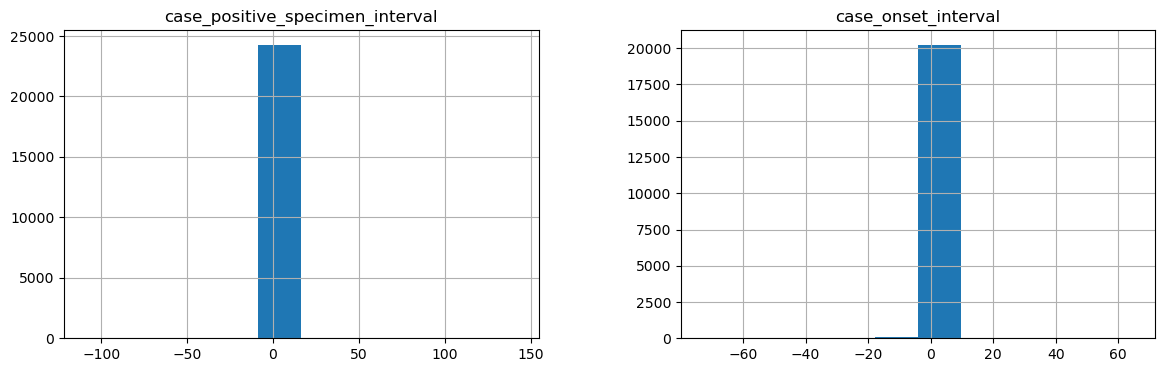

In [406]:
df[continuous_columns].hist(layout=(6, 4), figsize=(30,30), bins=10)
plt.savefig('continuous_histograms_1-1.pdf')

### - Plot histograms individual sheet for all the continuous features.

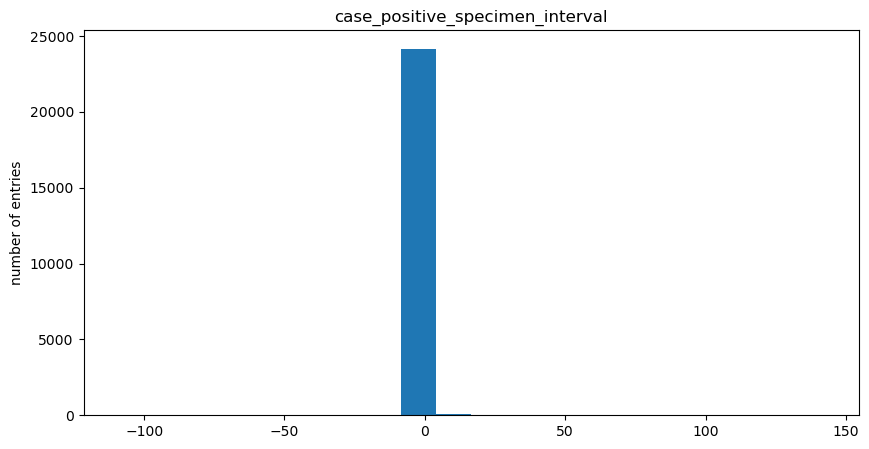

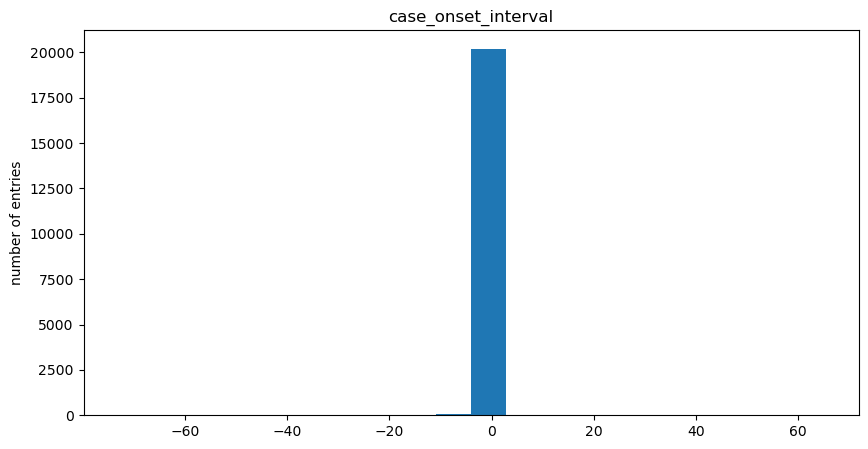

In [407]:
for col in continuous_columns:
        f = df[col].plot(kind='hist', figsize=(10,5), bins=20)
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()    

### - Plot box plots summary sheet for all the continuous features.

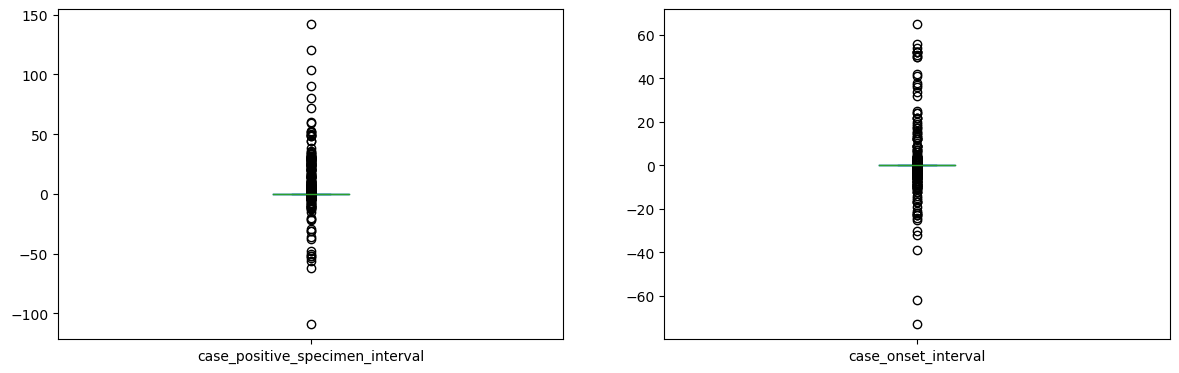

In [408]:
df[continuous_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
plt.savefig('continuous_boxplots_1-1.pdf')

### - Plot box plots individual sheet for all the continuous features.

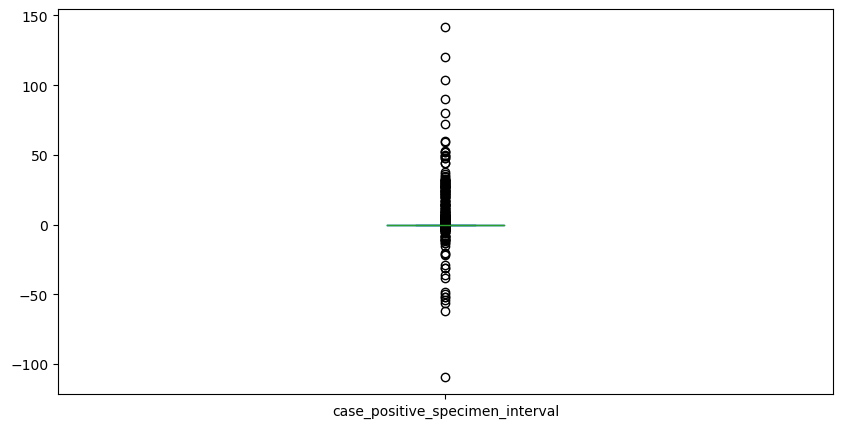

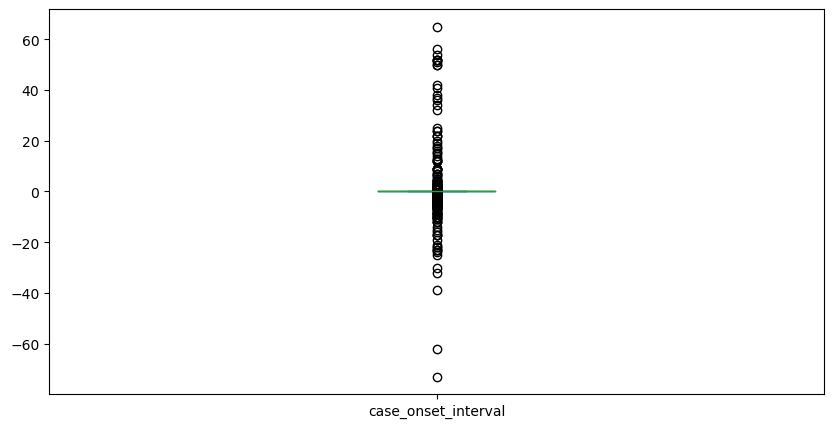

In [409]:
# Plot box plots for all the continuous features and save in a PDF file
with PdfPages('continuous_boxplots_1-1.pdf') as pp:
    for col in continuous_columns:
        f = df[col].plot(kind='box', figsize=(10,5))
        pp.savefig(f.get_figure())
        plt.show()   

### - Plot bar plots individual sheet for all the categorical features.

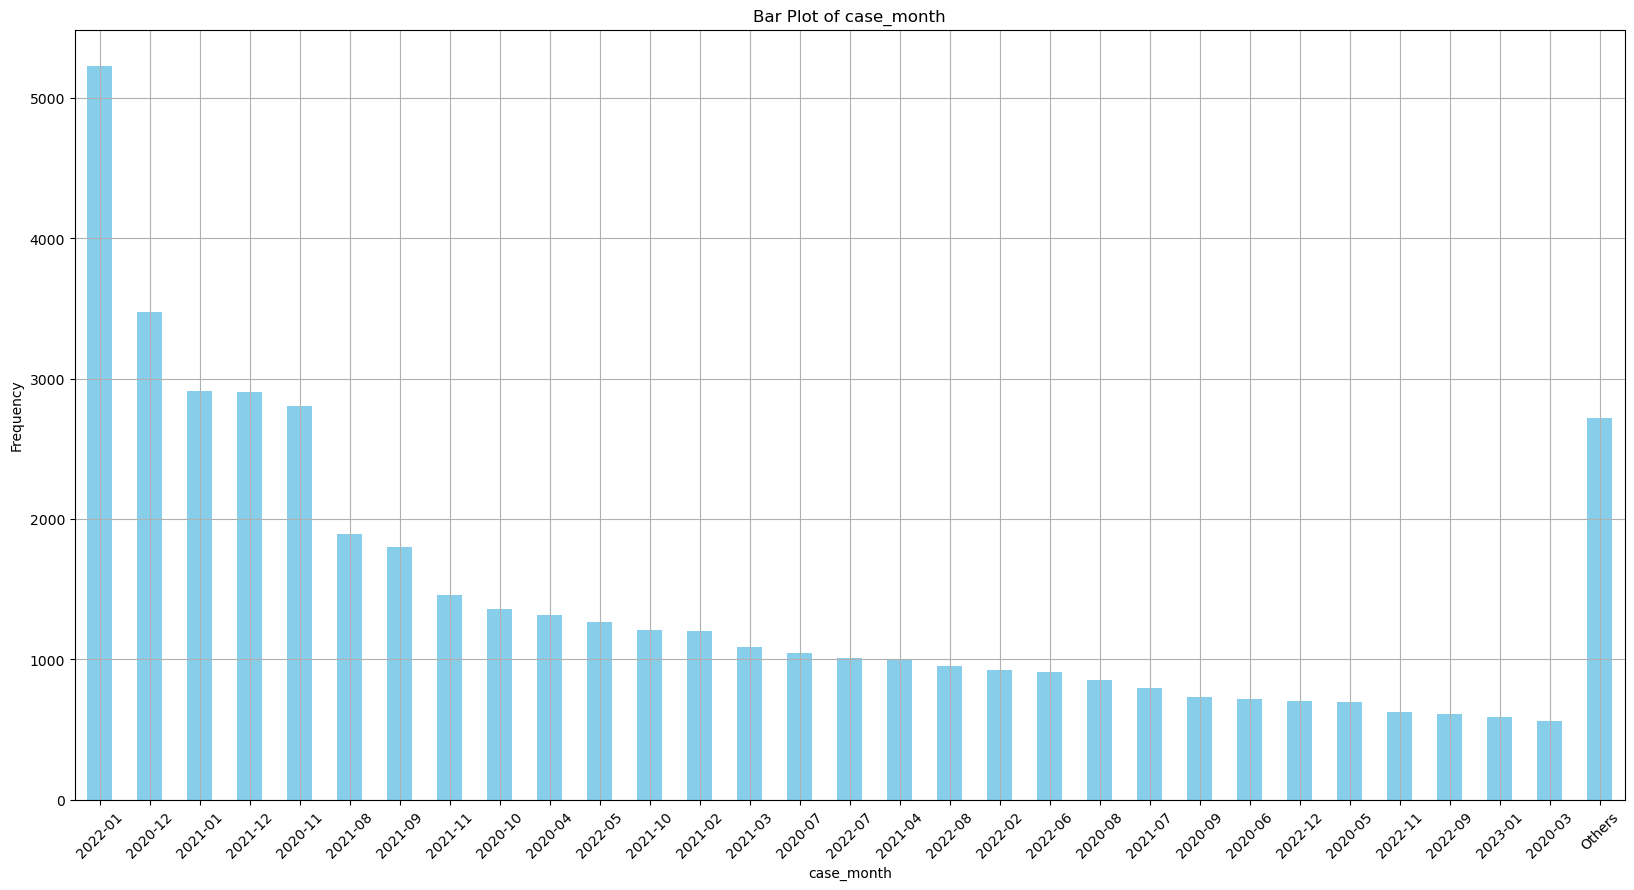

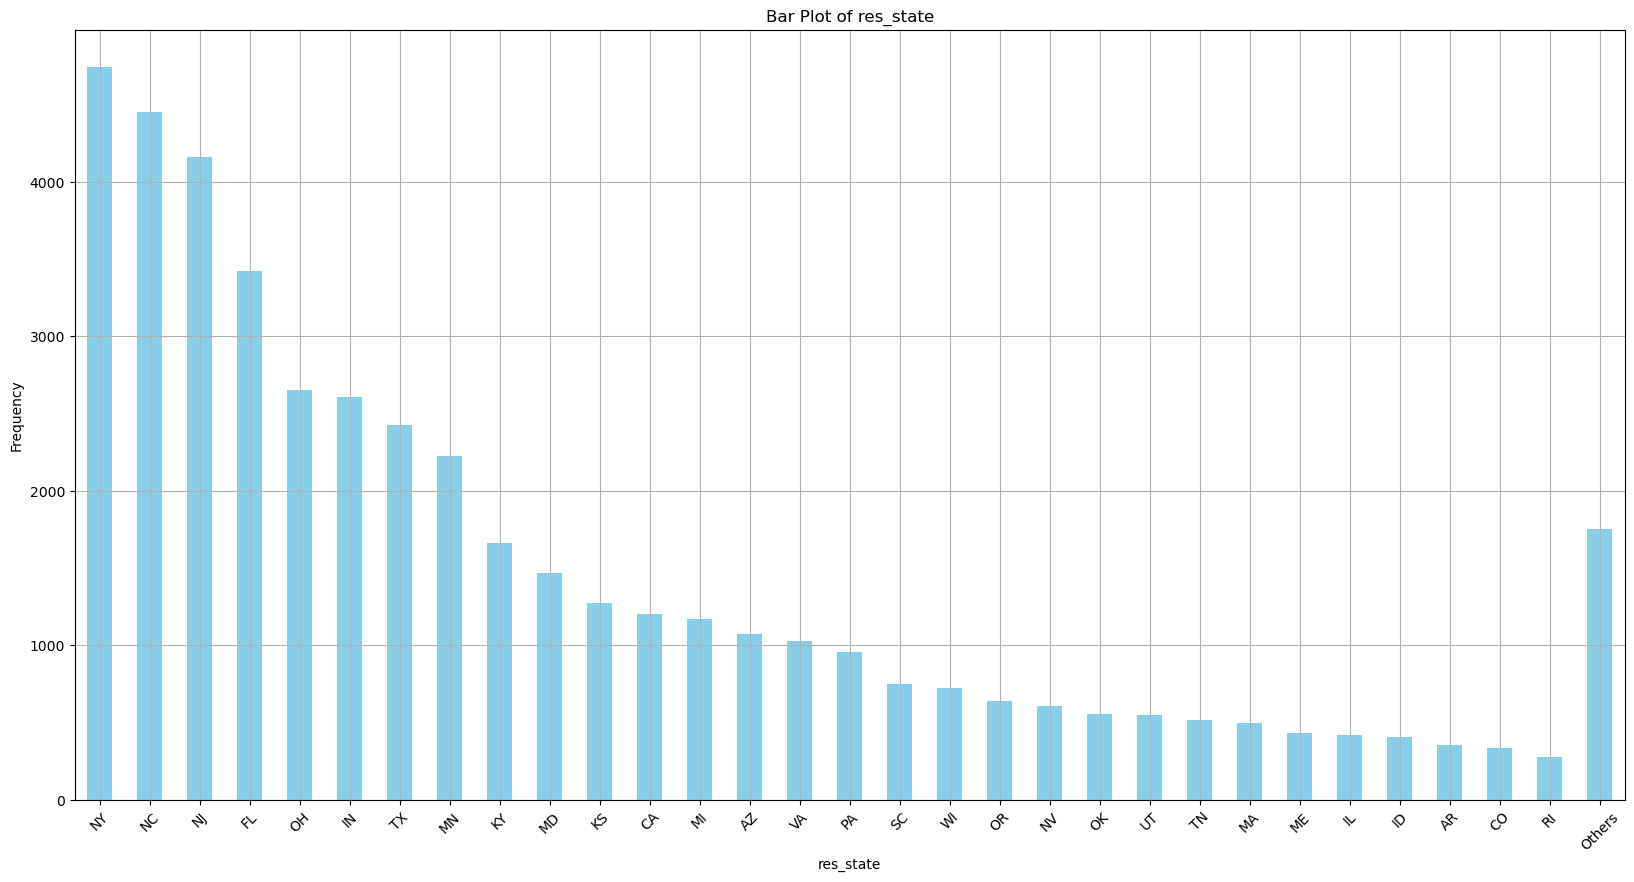

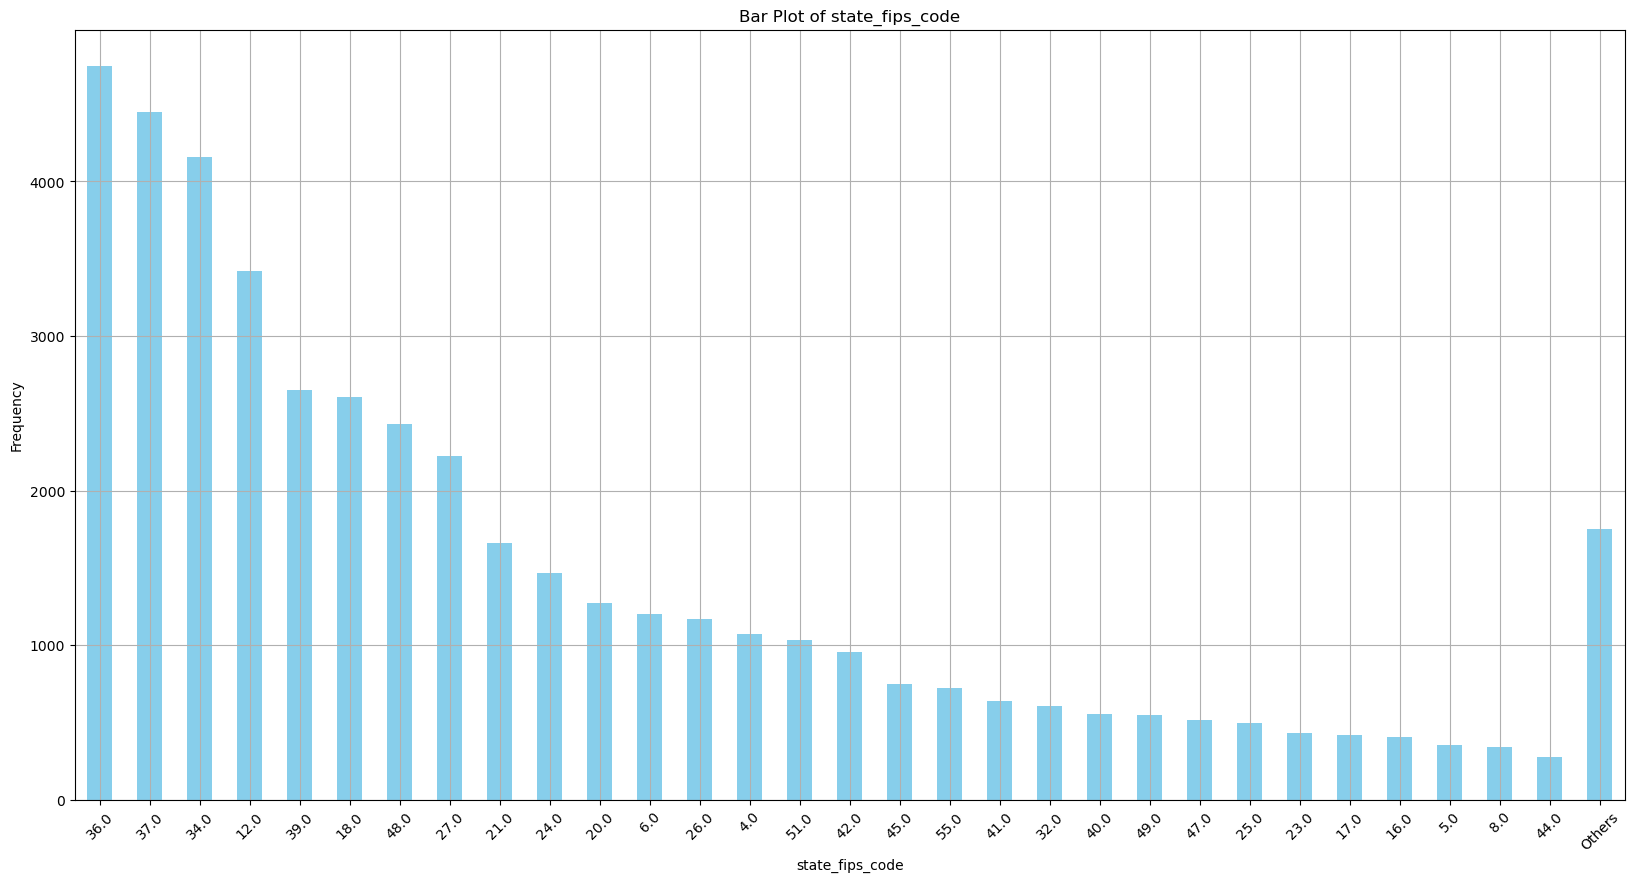

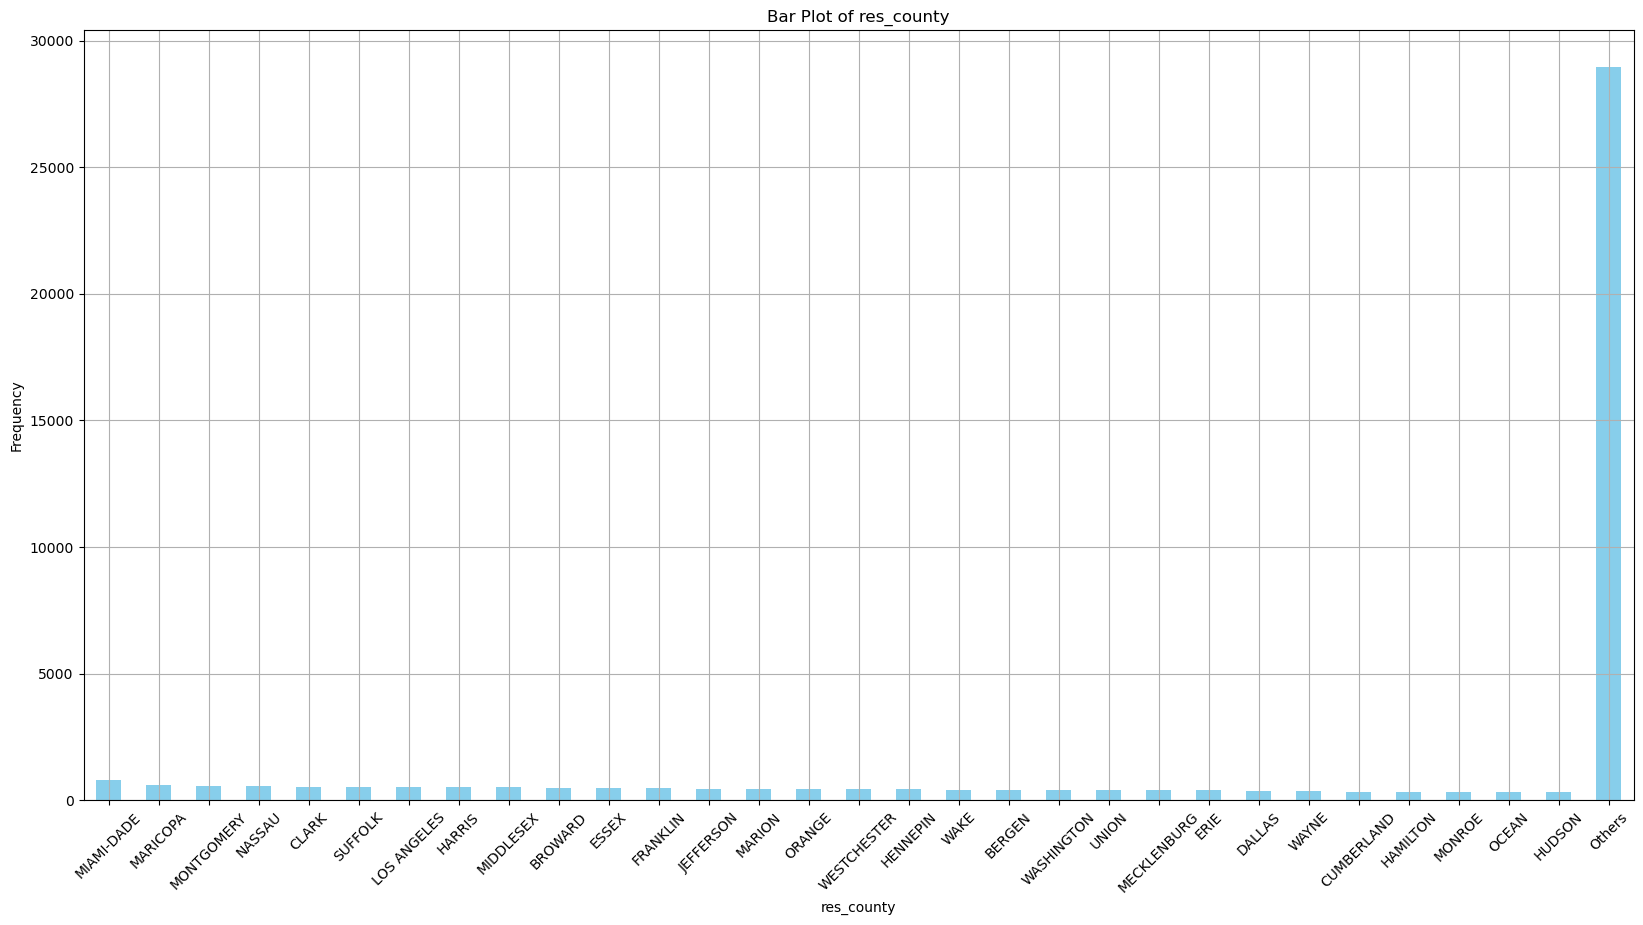

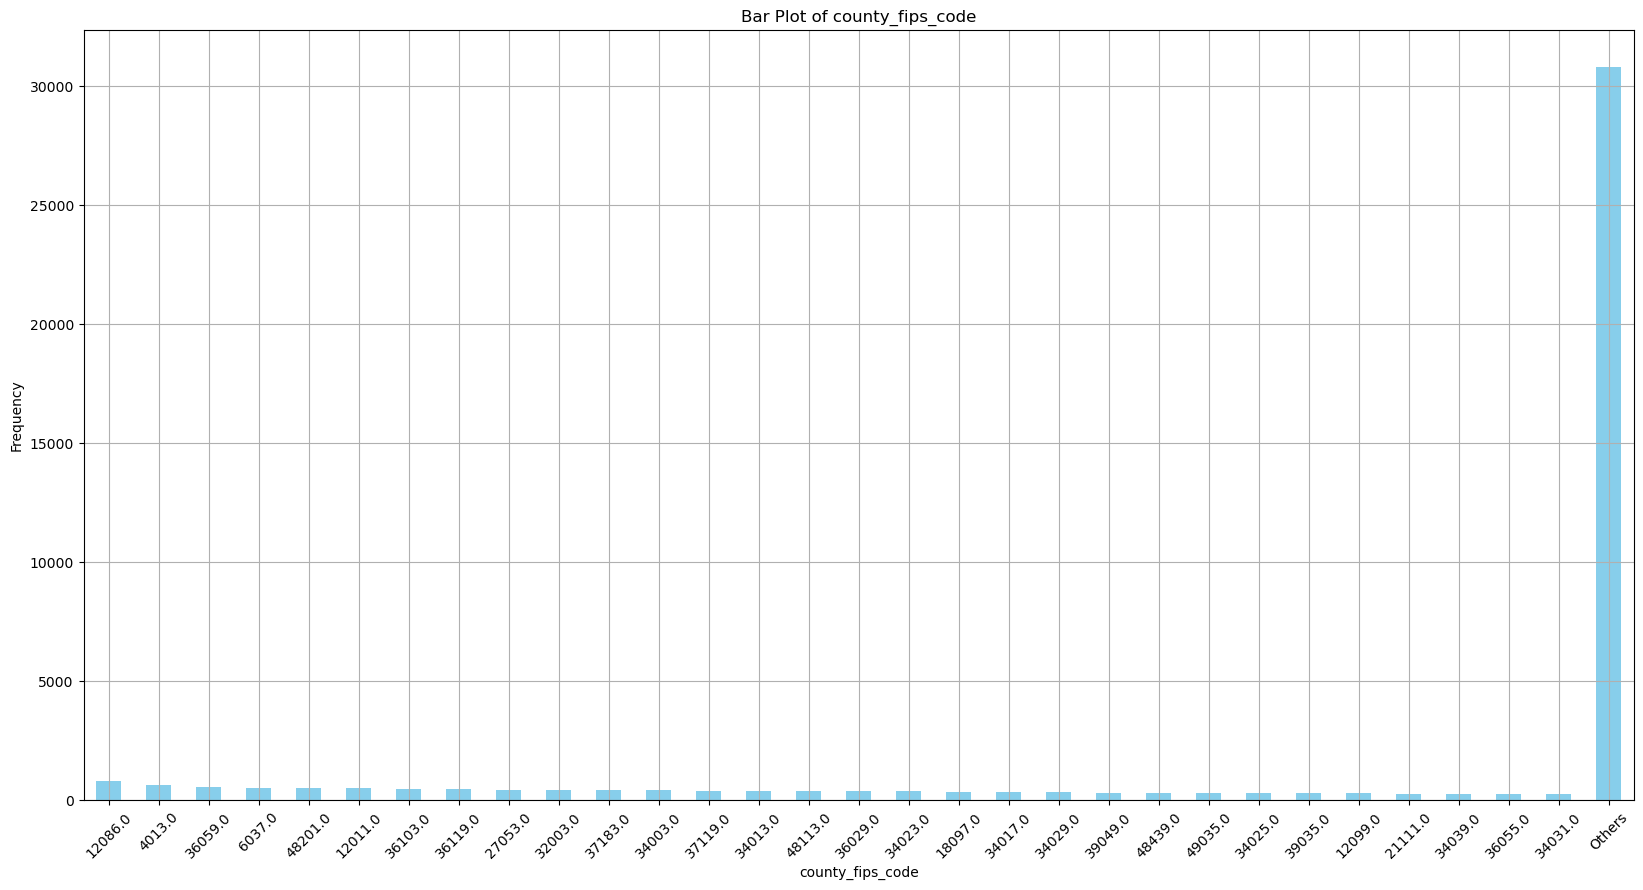

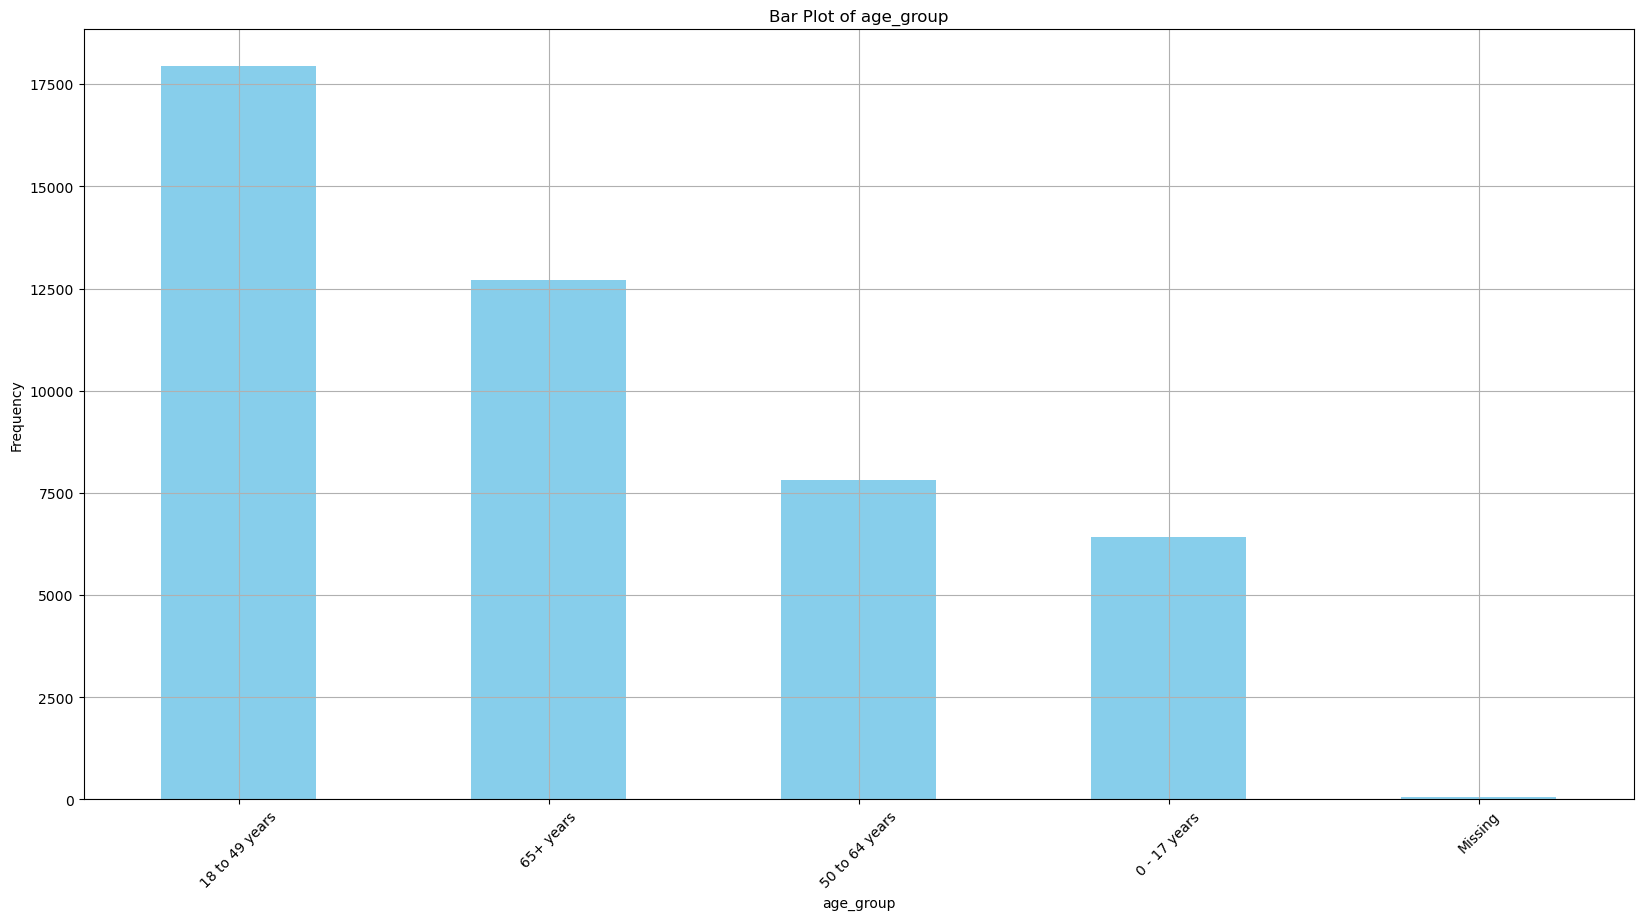

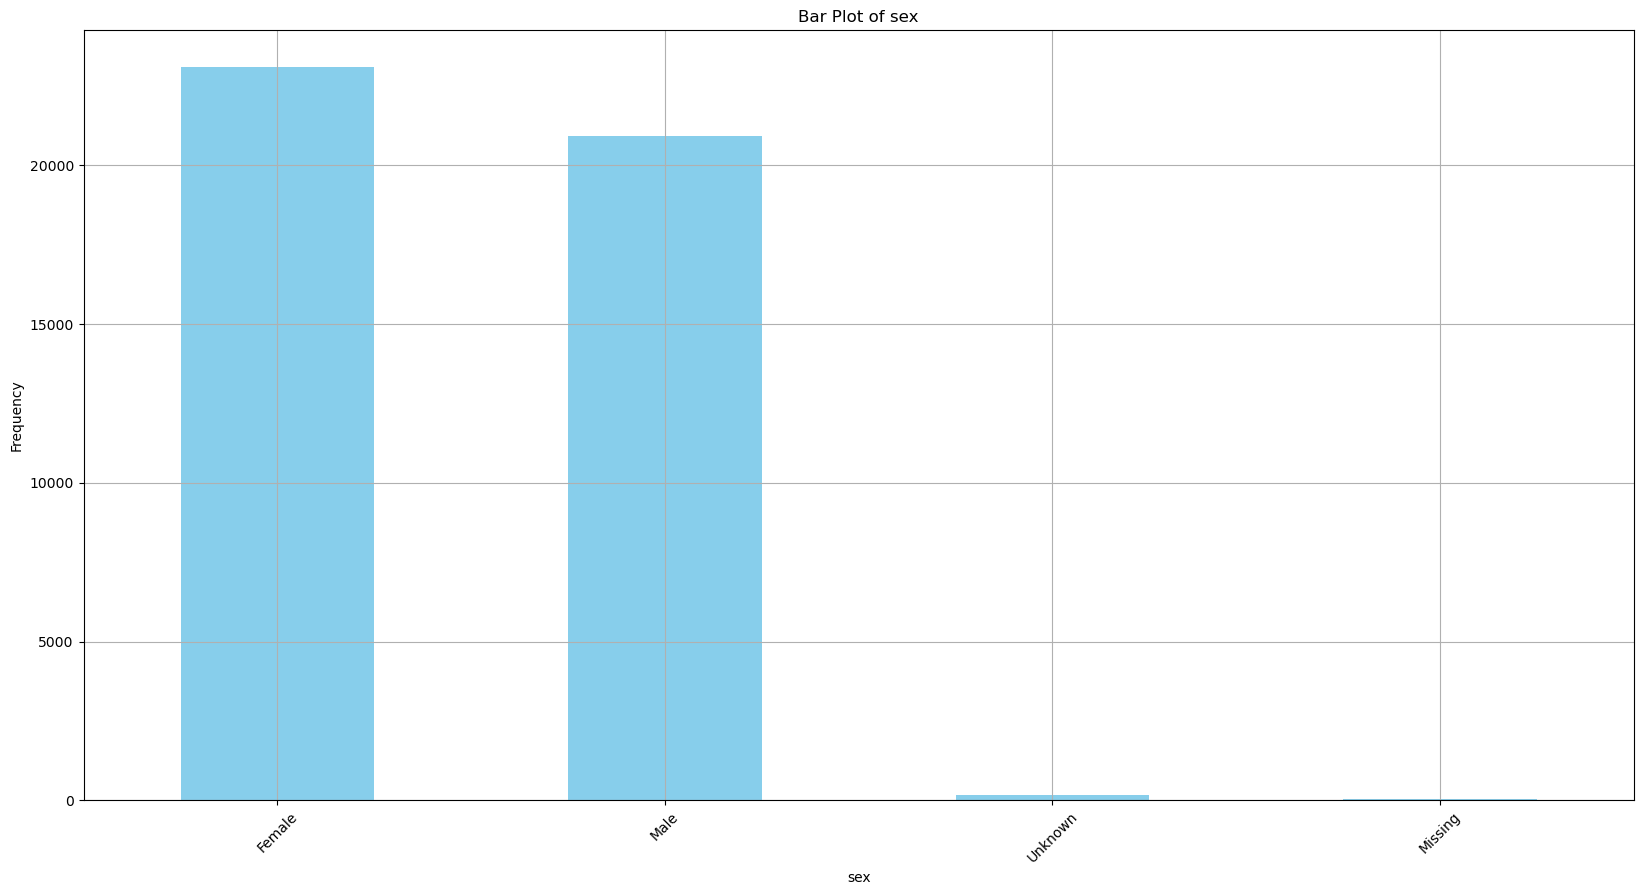

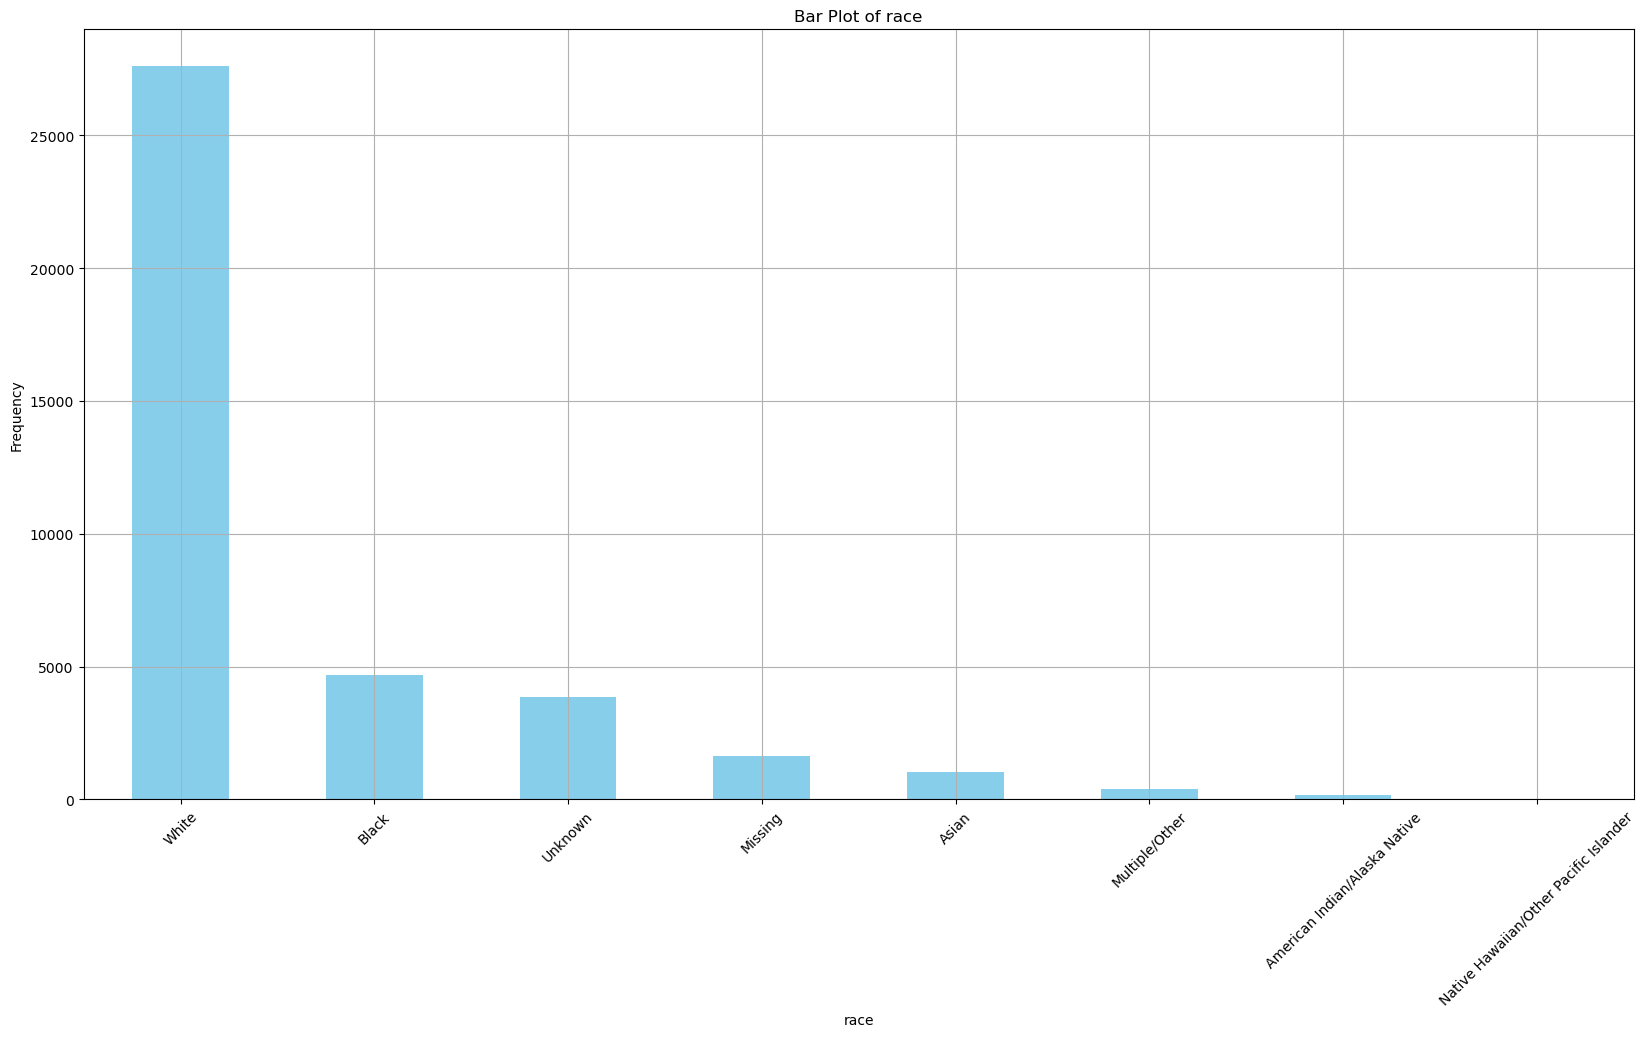

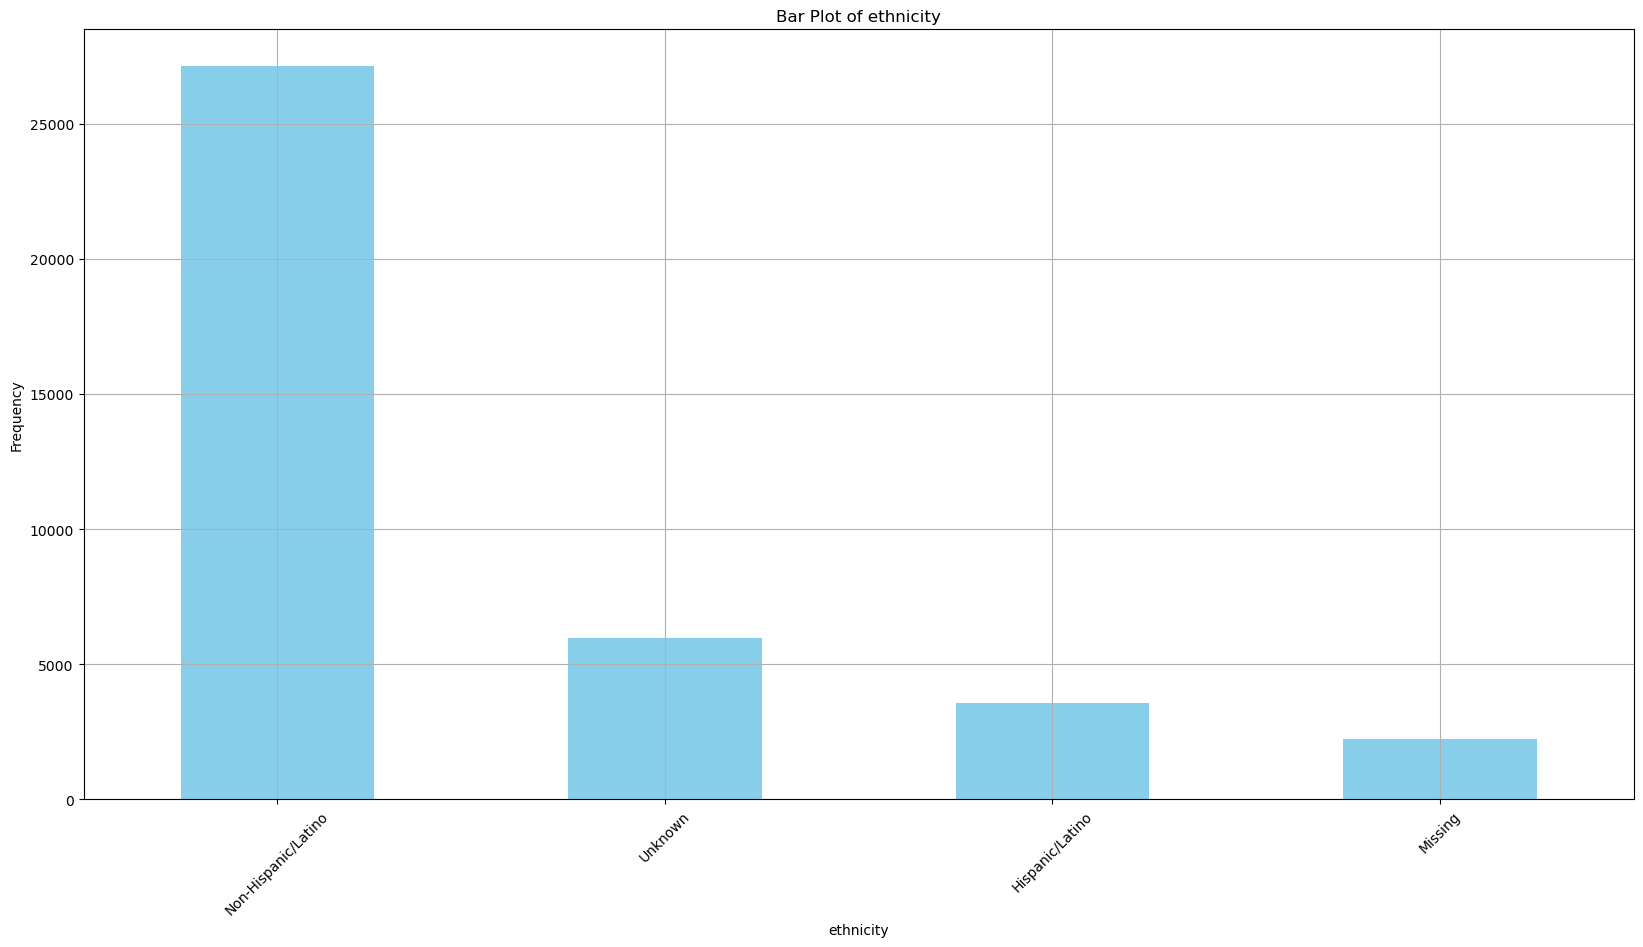

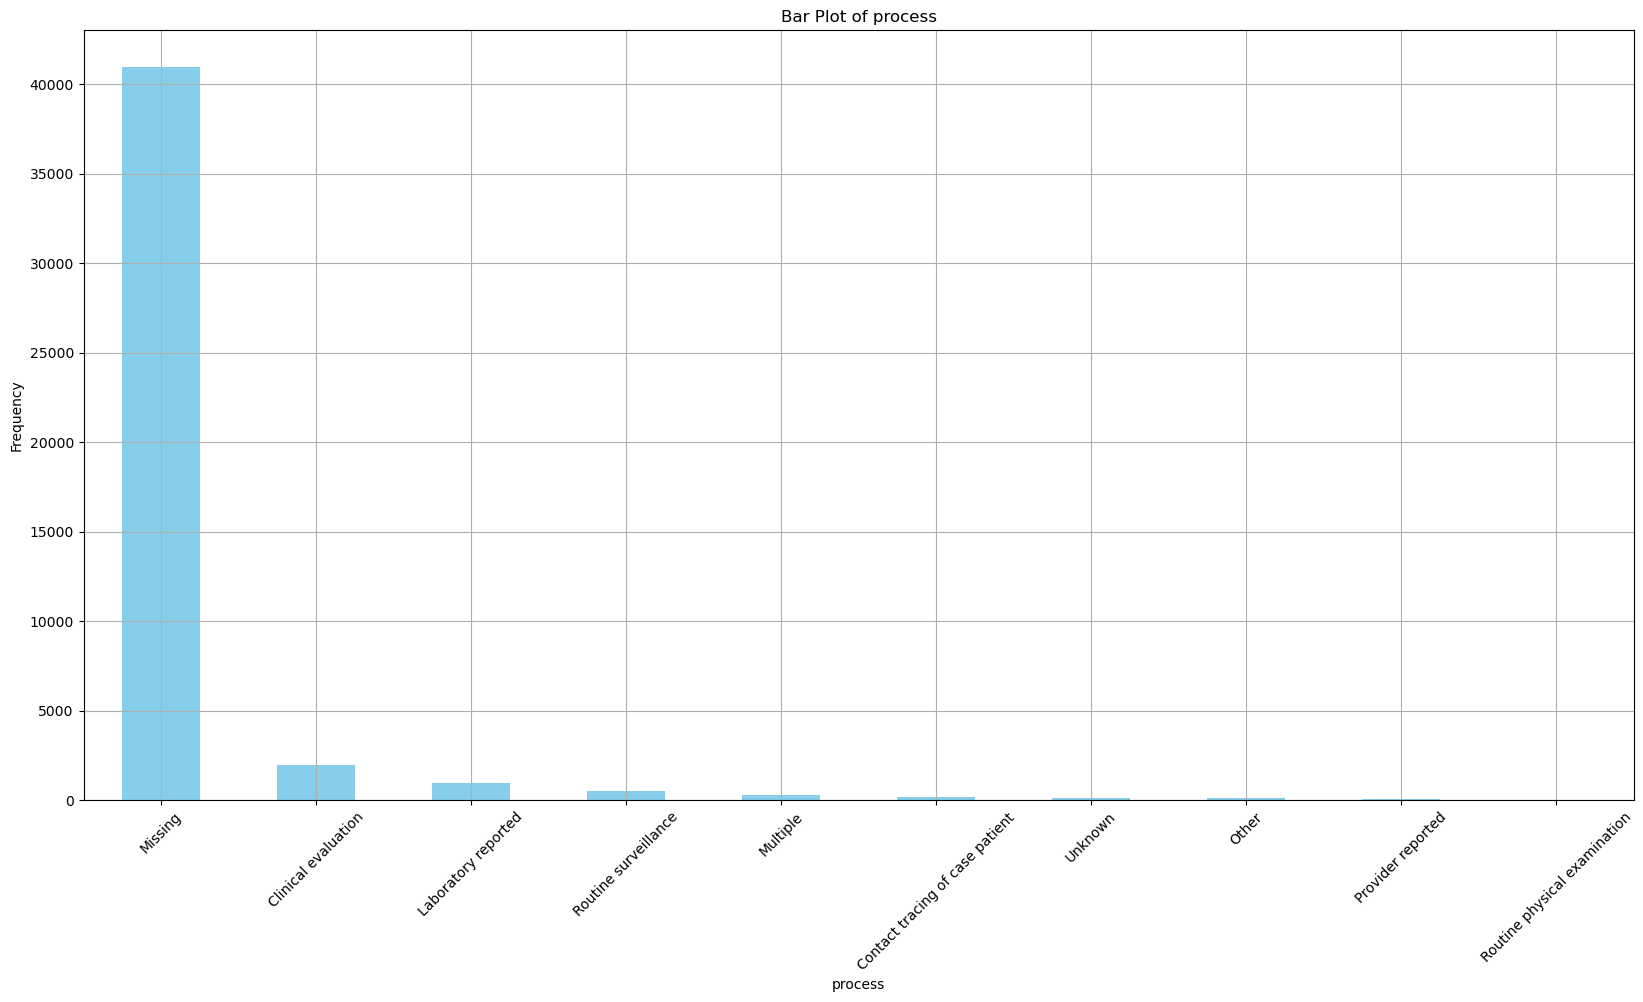

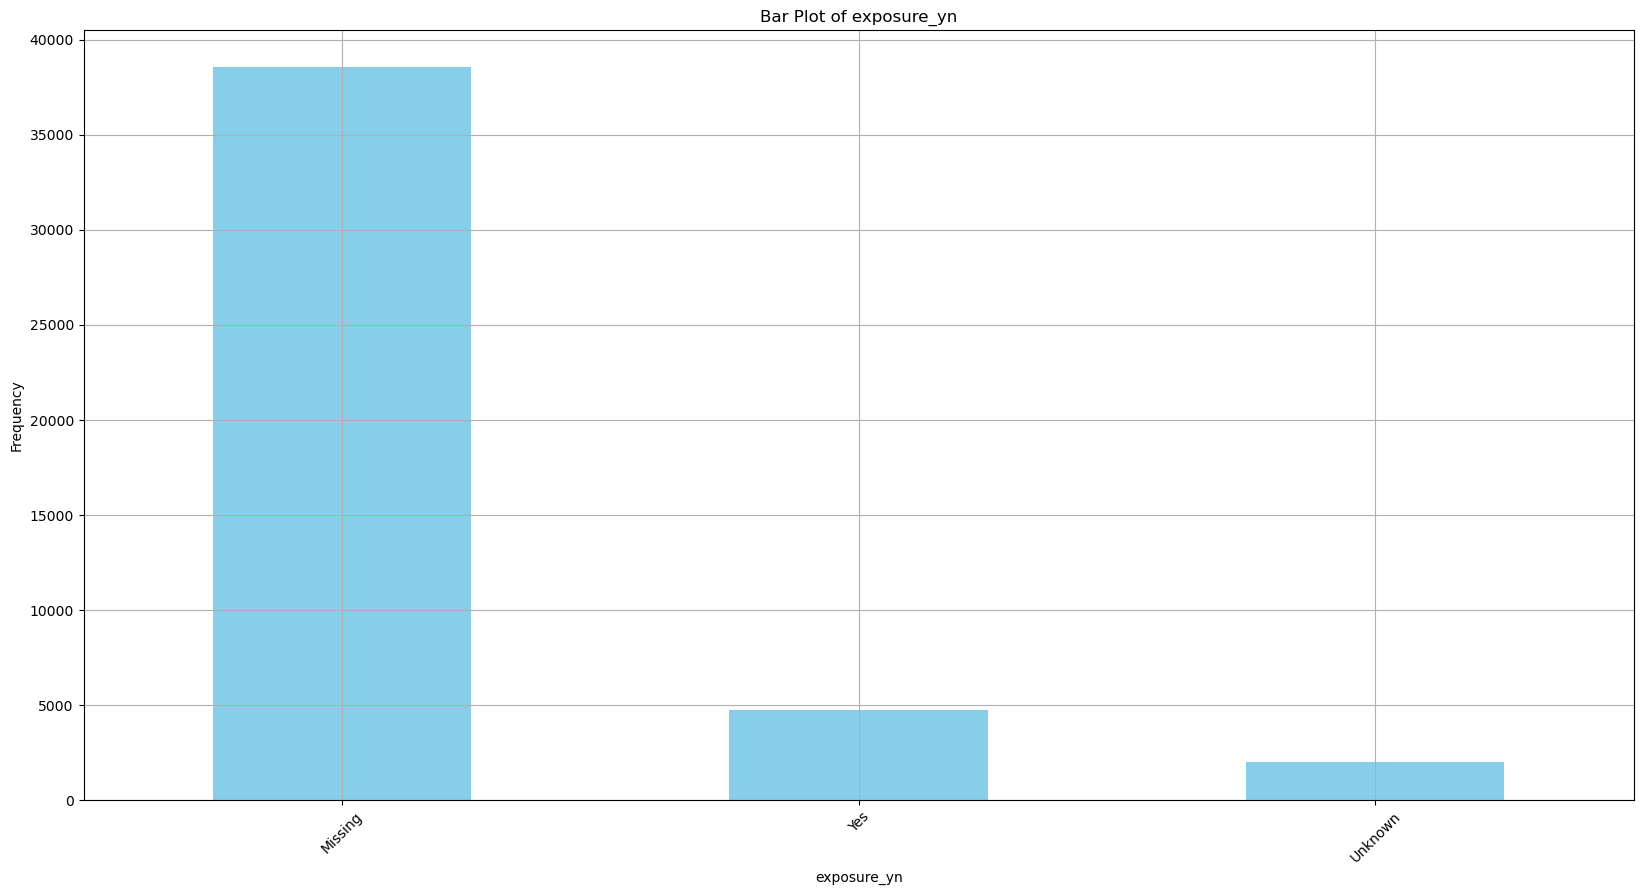

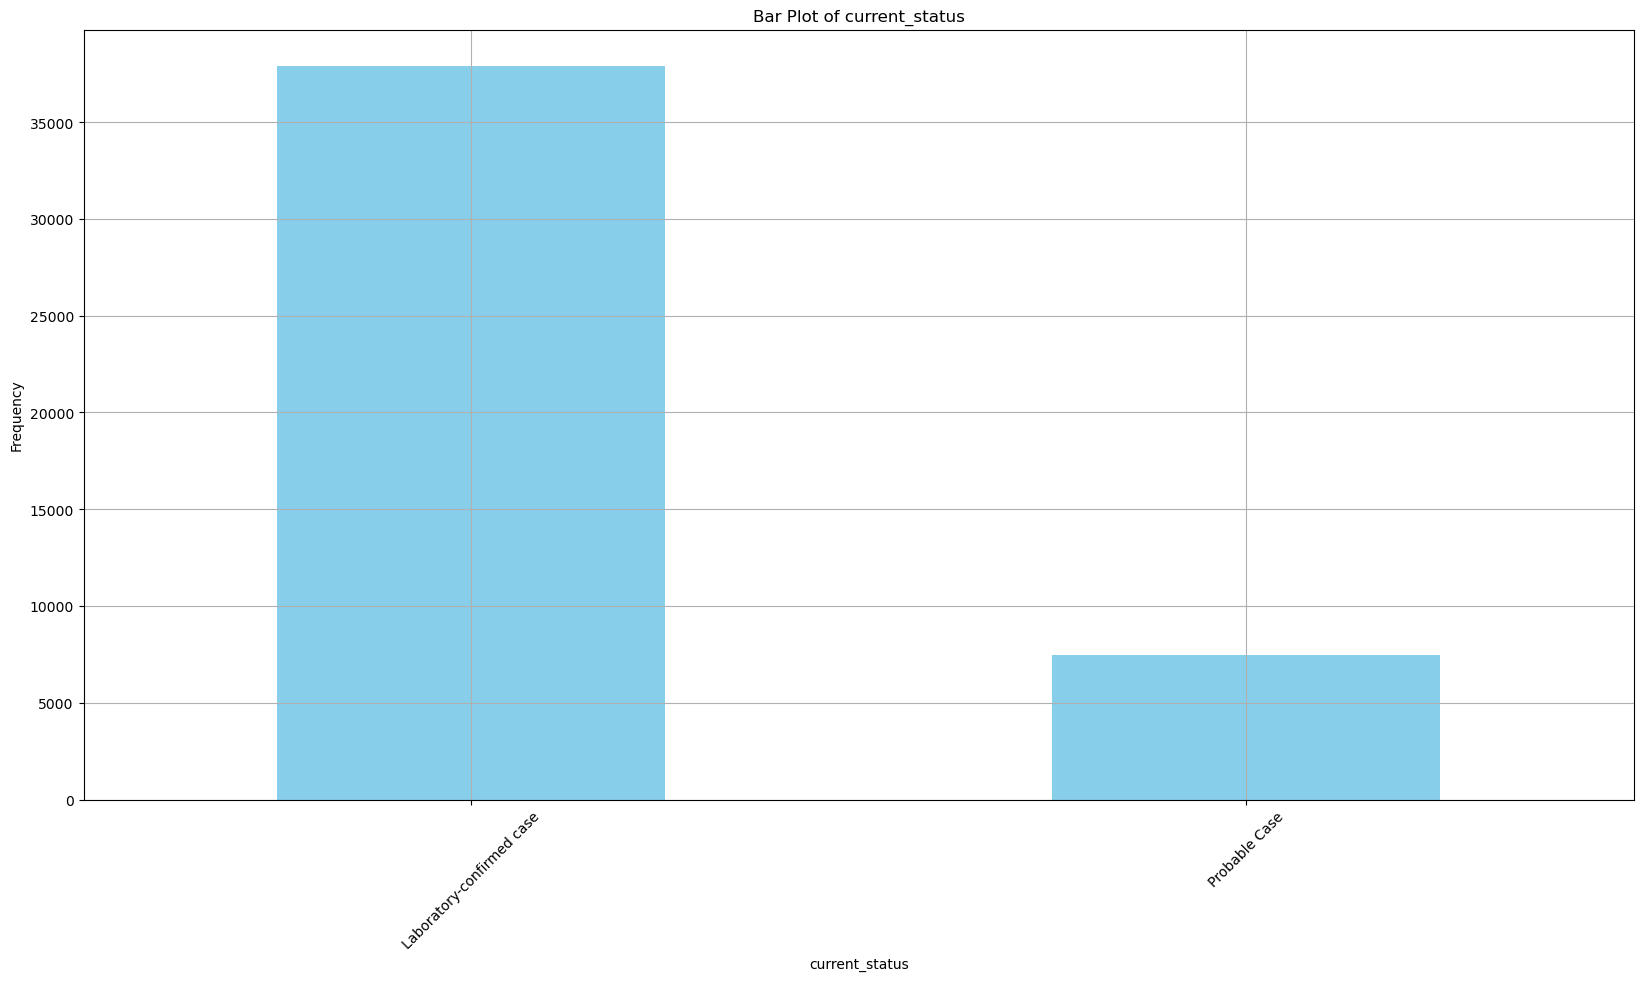

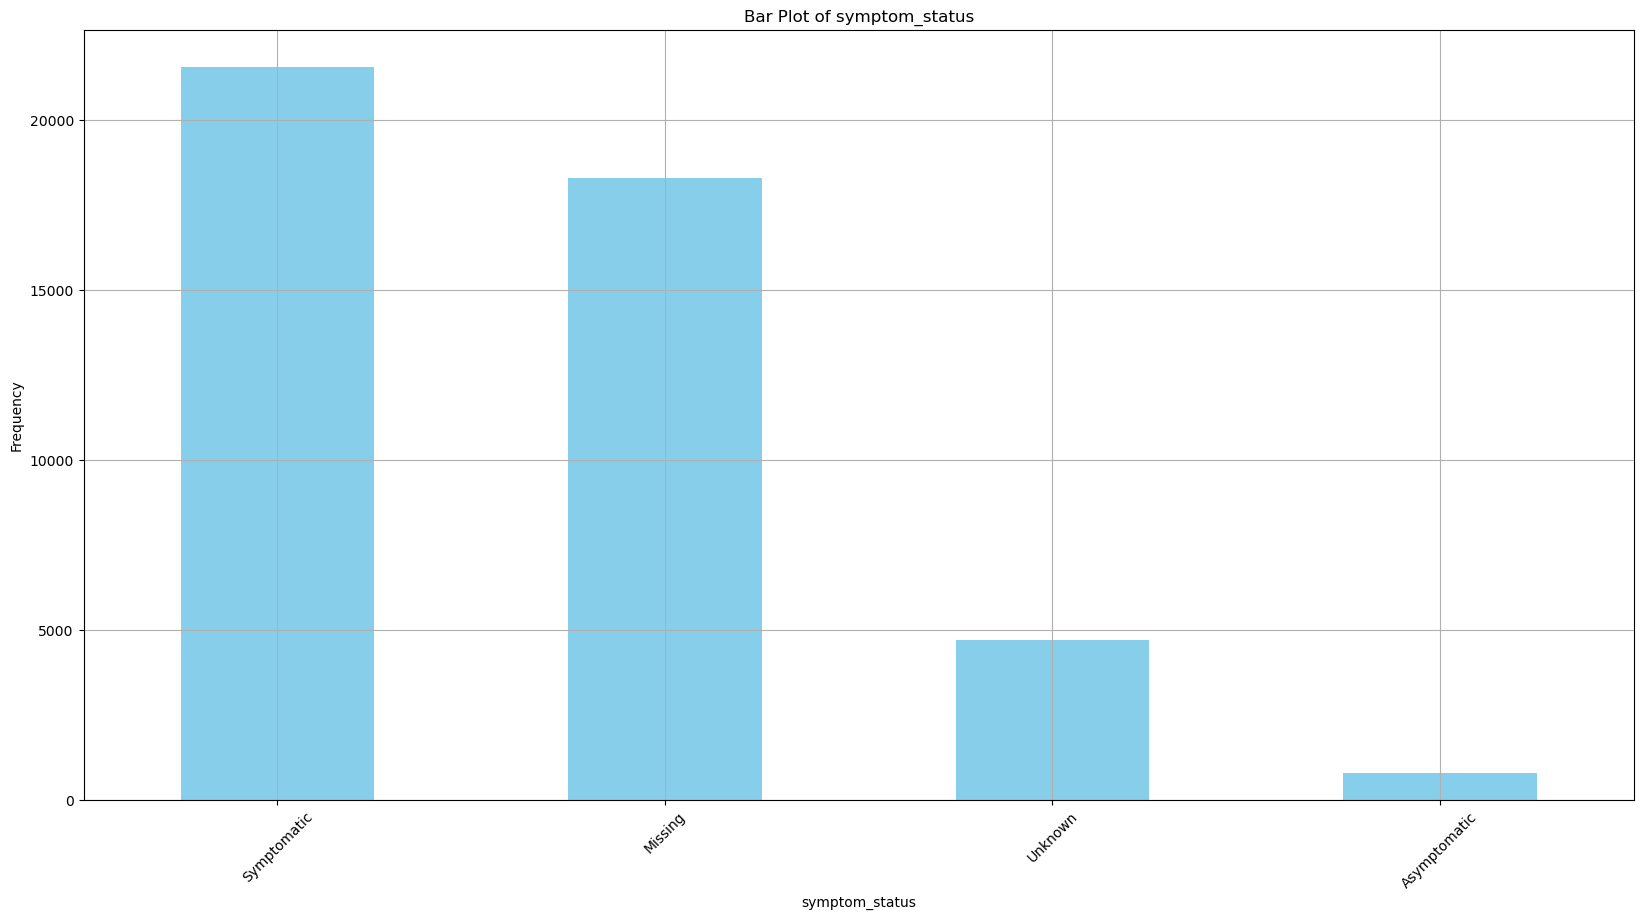

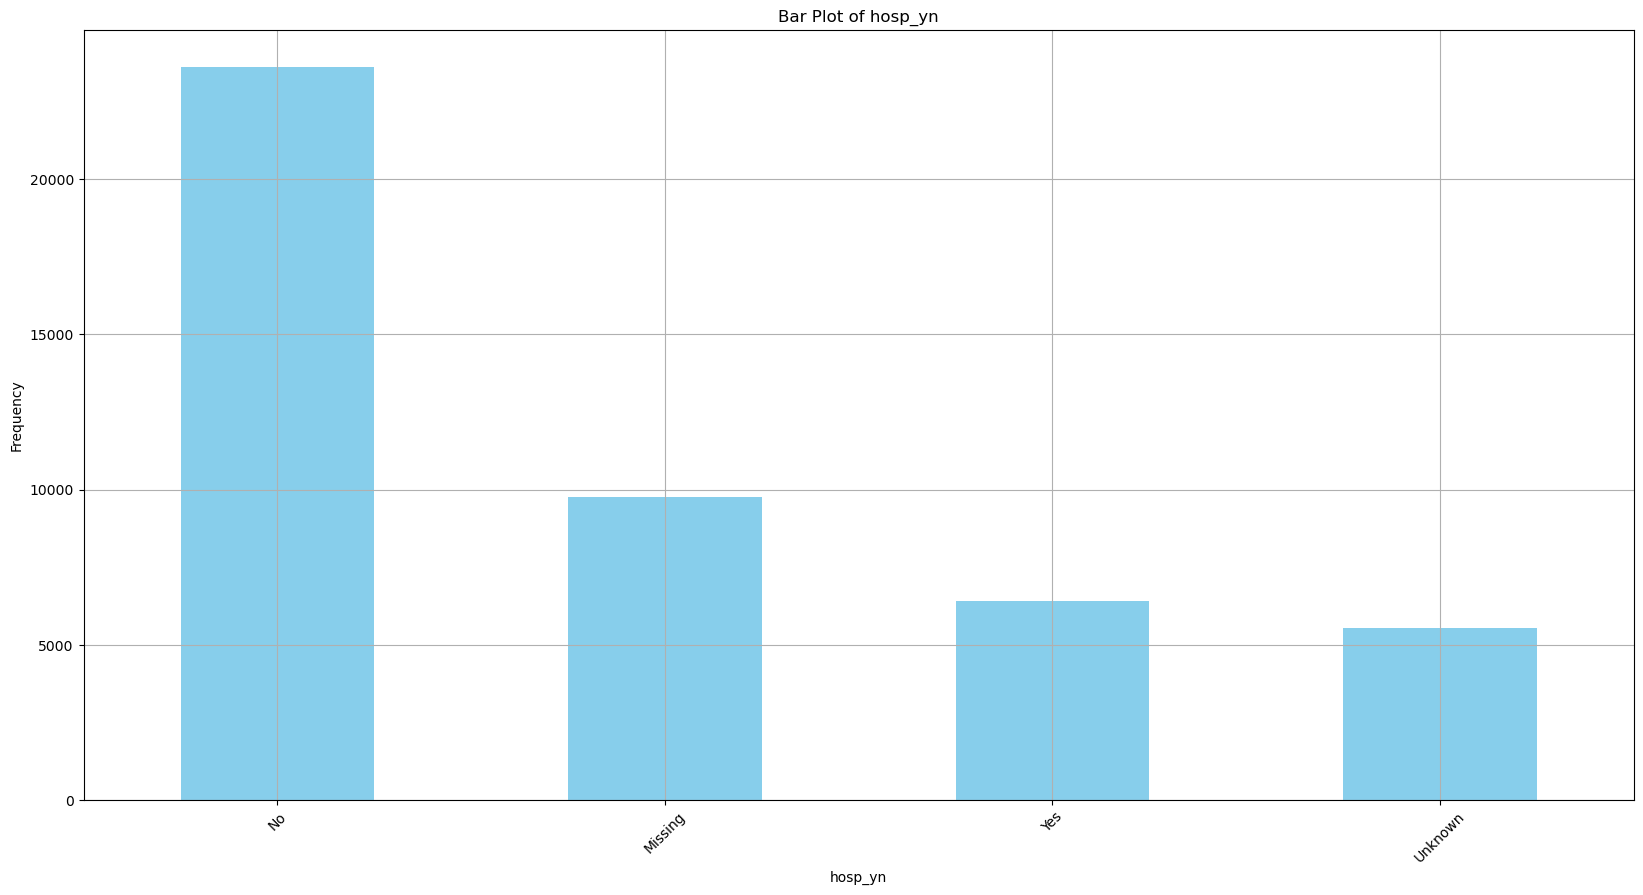

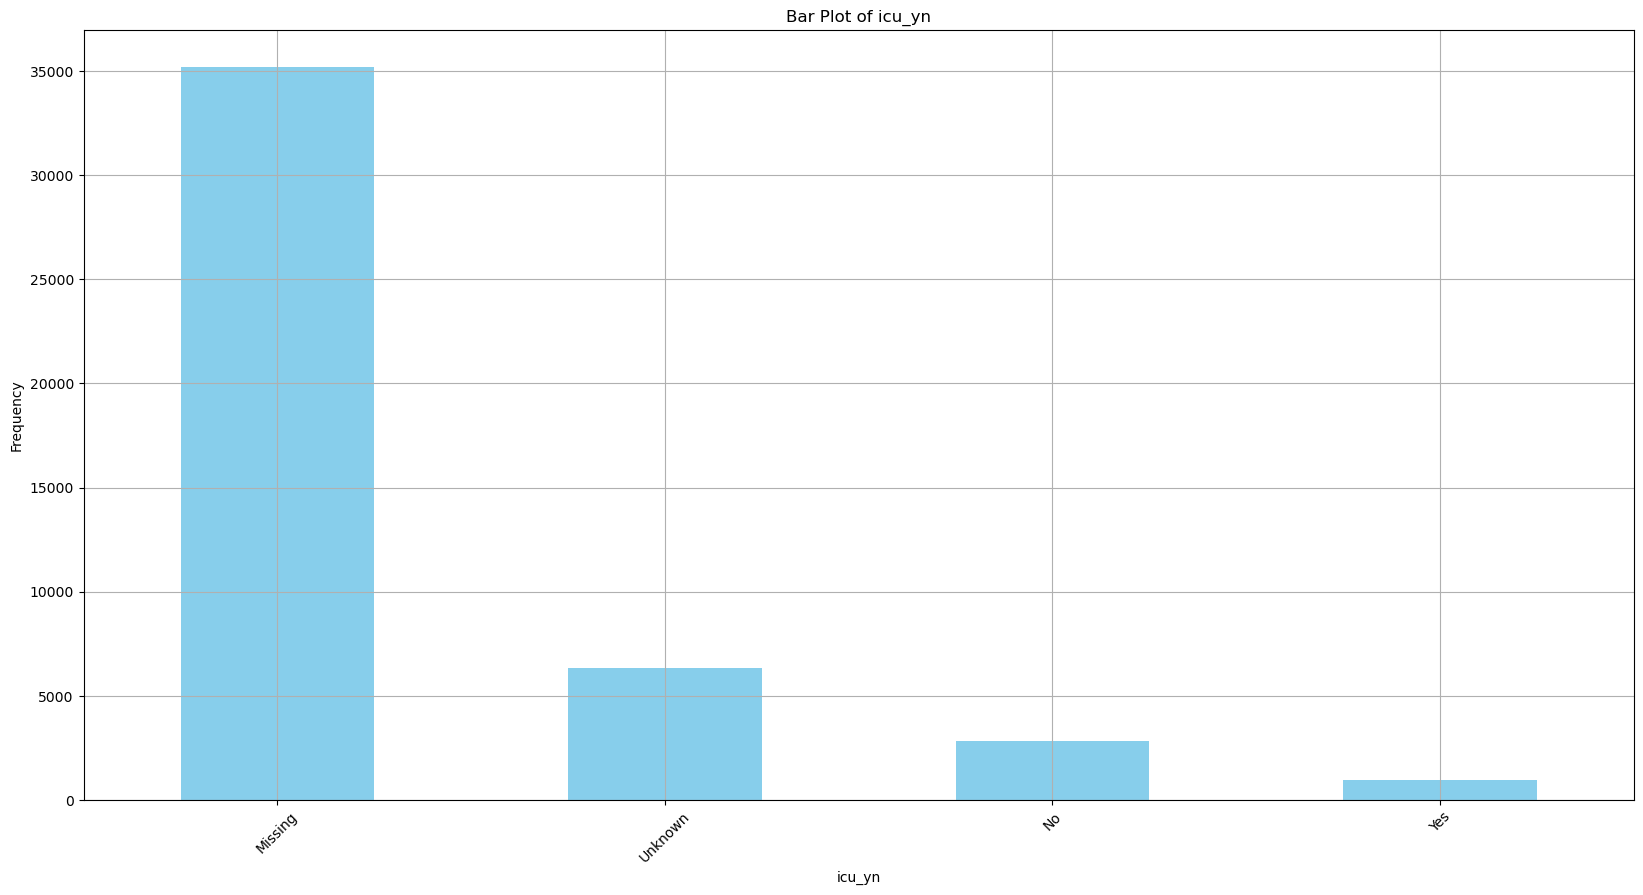

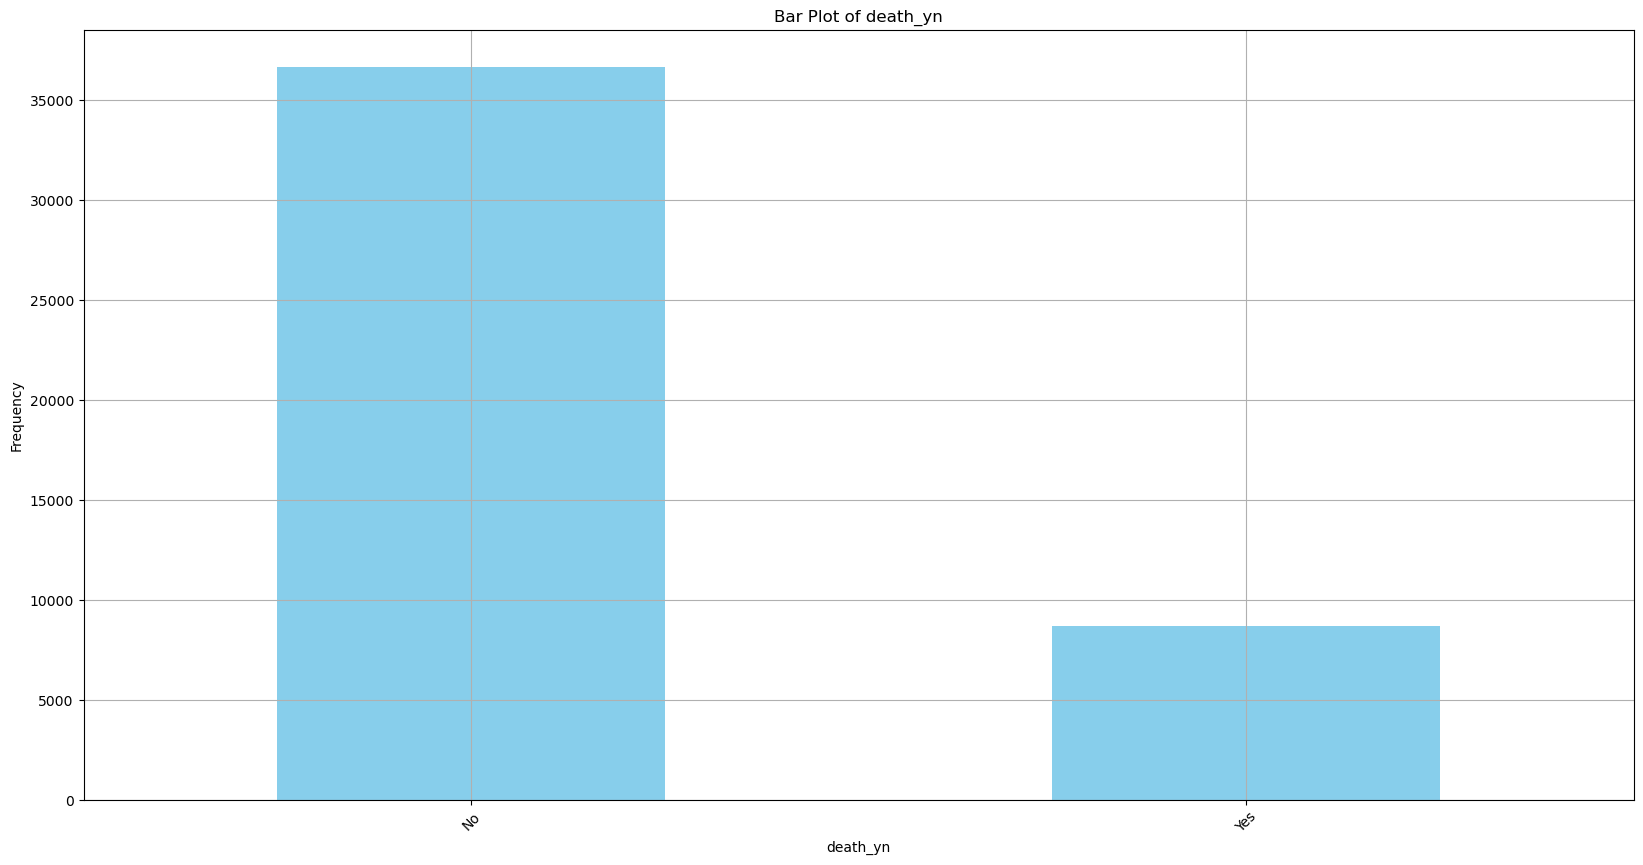

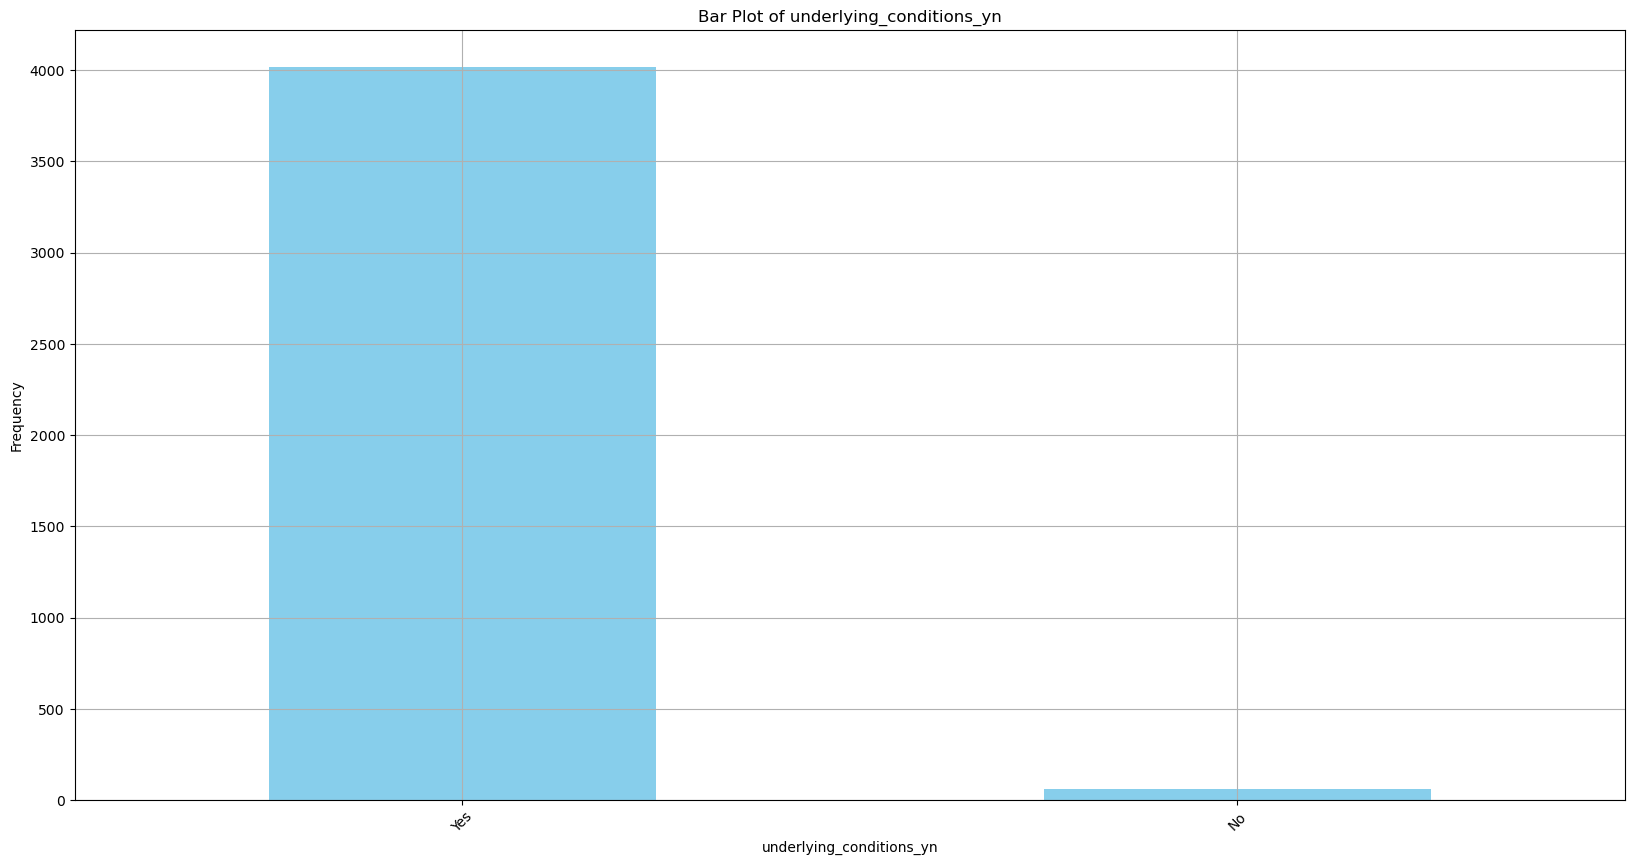

In [410]:
categorical_features = df.select_dtypes(include=['category'])  # Selecting columns with object dtype

# Plot bar plots for all the catagorical features and save them in a single PDF file
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    max_categories = 30
    for column in categorical_features.columns:

        plt.figure(figsize=(20, 10))

        # Count the frequency of each category
        category_counts = categorical_features[column].value_counts()

        # If the number of unique categories is greater than max_categories, group smaller categories into "Others"
        if len(category_counts) > max_categories:
            top_categories = category_counts[:max_categories]
            other_count = category_counts[max_categories:].sum()
            top_categories['Others'] = other_count
            f = top_categories.plot(kind='bar', color='skyblue')
        else:
            f = category_counts.plot(kind='bar', color='skyblue')

        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.grid(True)
        pp.savefig(f.get_figure())
        plt.show()

### Initial Findings 

##### Total Effected Crowd: 45339

#### Histogram - Continuous Data
- *case_positive_specimen_interval*: There are clearly outliers or abnormalities in the plot data in case_positive_specimen_interval, as the min is -109.0 and the max is 142.0.
- *case_onset_interval*: Outliers are found in the plot data as there exist a deviation from -73.0 as min to 65.0 as max

#### Box plot - Continuous Data
- *case_positive_specimen_interval*: Here the data summarizes the first quartile and the third quartile as zero making it having no body for the box plot.
- *case_onset_interval*: Here the data summarizes the first quartile and the third quartile as zero making it having no body for the box plot.

#### Bar plot - Categorical Data
- *case_month* : Total count of 45339 among with 40 unique data the more than 5000 happens on 2022-01, no outliers  
- *res_state* : Total count of 45338 among with 49 unique data where most commonly found cases in Ny, no outliers  
- *state_fips_code* : Total count of 45338.0 among with 49.0 unique data where fibs code of Ny which is 36 the highest, no outliers,
- *res_county* : Total count of 45338.0 among with 963 unique data where MIAMI-DADE the highest, no outliers
- *county_fips_code* : Total count of 45338.0 among with 1385.0 unique data where 12086.0 the highest, no outliers
- *age_group* : Highest found between age group 18 to 49 years, 17939 cases found
- *sex* : Cases reported among Female the highest, 23107 cases.
- *race* : Cases reported to mostly white with the total cases of 27609.
- *ethnicity* : Highest remorted among Non-Hispanic/Latino about 27135 cases.
- *process* : Minimal data on the process done to report the virus and there are a total of 40960 Missing data
- *exposure_yn* : Minimal data regrading exposre as well as there is a total of 38566 Missing data
- *current_status* : There are 37894 cases which are Laboratory-confirmed case after testing
- *symptom_status* : Amongs the effected crowd 21562 were Symptomatic 
- *hosp_yn* : Mojority of the effected people was not hospitalized , about 23619 were non hospitalized
- *icu_yn* : Total of 35193 Missing data regarding ICU status
- *death_yn* : About 36657 survived and recovered
- *underlying_conditions_yn* : Cases of underlining conditions are higher with about 4019 people having them

# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

- *state_fips_code*: The column plays very significant role in further analysis and leads to a question of should we drop this
- *county_fips_code*: The column plays very significant role in further analysis and leads to a question of should we drop this, and it has a mismatch with the column res_county with the count of unique values
- *race*: There exist a 25% missing data
- *ethnicity*: There exist about 32% missing data where it columns are marked as Unknown
- *process*: There exist about 90% of missing data where the columns are marked as Missing and Unknown <b>(both)</b>
- *exposure_yn*: There exist about <b>89% of missing data</b> where the columns are marked as Missing and Unknown <b>(both)</b>
- *symptom_status*: There exist about 50.69% of missing data where the columns are marked as Missing and Unknown <b>(both)</b>
- *hosp_yn*: There exist about 33.76% of missing data where the columns are marked as Missing and Unknown <b>(both)</b>
- *icu_yn*:  There exist about <b>91.60% of missing data</b> where the columns are marked as Missing and Unknown <b>(both)</b>
- *case_positive_specimen_interval*: This column being continuous datatype has a 46.26% of its data missing and there exist a <b> significant amount of outliers </b>
- *case_onset_interval*: This column being continuous datatype has a 55.14% of its data missing and there exist a <b>  significant amount of outliers</b>
- *underlying_conditions_yn* : This colum has total of about <b>91% of the data missing</b>, where nothing is marked
- <b>*logical integrity issues*</b> : When you compare columns there exist a series of logic integrity issues which is discussed below in detail

### - Propose solutions to deal with the problems identified. 

1. **Negative values in case_positive_specimen_interval and case_onset_interval**
- There exist negative values within both these columns and even though it creates a confusion on weather this is an irregular data or if it was because the recording was done after the cases.For timebeing we are not doing anything for the negative numbers

2. **Empty values for case_positive_specimen_interval and case_onset_interval**
- There exist empty section for these two columns and this creates significant effects on the data, thus I am adding the mean to cover the vacent sections for better data manipulation as the type being continuous.

3. **Columns such as process, exposure_yn, icu_yn, underlying_conditions_yn are nearly empty**
- Compared to a lot of other columns these colums has close to 90% of their data empty, which can be either marked as Unknown, Missing, - or kept null.There is no point using these columns as we are not given significant data to for analysis and dropping these columns makes more sense.

4. **Outliers in case_positive_specimen_interval and case_onset_interval**
- There clearly exist outliers within both case_positive_specimen_interval and case_onset_interval columns. They initailly look somewhat plausible but will need to be investigated further. If they don't make sense they will be removed.

5. **Columns such as state_fips_code and county_fips_code plays very less role**
- There are a clear mismatch between county_fips_code and res_county columns as both have diffent amount of unique values.And there is a question of the need of fibs_code columns, Needs further investigation.

6. **Both the terms Unknown and Missing in some of the columns**
- There are columns whose values are both Unknown or Missing, thinking on this both means the same. The columns are sex,race,process,exposure_yn,symptomstatus_yn,hosp_yn,icu_yn.Better option would be to replace all the 'Unknown' as 'Missing'

#### (Logic integrity issues)
1. **if case_positive_specimen_interval and case_onset_interval crosses more than the threshold weeks**
- The Covid virus usually starts its play within a span of weeks and its abnormal to see an offset of more than 10 weeks.A proper investigation would be needed for those rows.

2.  **If icu_yn is yes then hosp_yn should not be no**
- The person would be hospitalized to be in the icu, so those rows seems to have an abiguity, would be better to drop them. 

3. **Process who is under clinical_evaluation or lab reported cant have a current status of probable_case**
- If the process is clinical_evaluation then its a definite case and not a probable case, so those rows seems to have an abiguity, would be better to drop them.

4. **If symptom_status is Asymptomatic then icu_yn need not be yes, person has to atleast show some symptoms of covid to be in intensive care unit**
- You would not be moved to ICU until you have atleast a symptom, so those rows seems to have an abiguity,would be better to drop them.

5. **If symptom_status is Asymptomatic then icu_yn cannot be yes, person has to atleast show some symptoms of covid to be hospitalized**
- You would not be admitted to the hospital without any symptoms usually, there is a minimum criteria to require hospital care, so those rows seems to have an abiguity,would be better to drop them.

### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

1. **Negative values in case_positive_specimen_interval and case_onset_interval**
  -  Appears in 2 features. *case_positive_specimen_interval* and *case_onset_interval*. Even though negitive numbers may not significantly define wrong data as there is not enough information about what it means by earliest days. 
  
*Argument to remove rows containing negative numbers in case_positive_specimen_interval*
  - If the earlier date represents date of exposure or tested positive, then it does not make sense to have negative values as per the description of case_positive_specimen_interval
  
*Argument to keep negative numbers for case_onset_interval*
 - If the earlier date represents date of exposure or tested positive, a negative number can signify that the person started showing symptoms before he was tested or recorded.

In [411]:
print("-ve numbers in Rows \t\tcount")
print("case_positive_specimen_interval\t\t", df[df['case_positive_specimen_interval'] < 0 ].shape[0])
print("case_onset_interval\t", df[df['case_onset_interval'] < 0].shape[0])

-ve numbers in Rows 		count
case_positive_specimen_interval		 136
case_onset_interval	 700


*Finalized Decision*

- case_positive_specimen_interval: Has totally 136 rows whose rows have its case_positive_specimen_interval value negative, this seems to be very less rows compared to the dataset and dropping these rows seems to be the adequate solution.

 - case_onset_interval: Has significantly a higher row count and also, here for arguments sake we can say that the symptoms came before the examination making a negative value. But in this case we are replacing the negatives as 0, making it that symptoms were recorded before earlier days, being neglected. Moreover its better if we are considering the positve offsets only.

In [412]:
print("Total number of neagtive rows dropped in case_positive_specimen_interval: ", test_2.shape[0])
df = df.drop(test_2.index)

Total number of neagtive rows dropped in case_positive_specimen_interval:  136


In [413]:
print("Total number of negative rows replace in case_onset_interval to 0: ", test_3.shape[0])
df.loc[df['case_onset_interval'] < 0, 'case_onset_interval'] = 0

Total number of negative rows replace in case_onset_interval to 0:  700


2. **Empty values for case_positive_specimen_interval and case_onset_interval**
- There exists a significant amount of the data missing within these columns, and by going through the CDC documentation, these rows provides a significant contribution for continuous data analysis.
 - To aid in the decision the coefficient of variation will be checked. If < 1 imputation with the median will be performed. If > 1 the data will be evaluated to see if imputation with the mean is practical.
 -  For cases where imputation with the mean/median is not possible due to high standard deviation, it would be possible to perform regression analysis to predict what the value would have been based on a group of the nearest neighbours. This however is deemed beyond the scope of this assignment.

2.1 case_positive_specimen_interval

In [414]:
print("Rows whose case_positive_specimen_interval column is vacant")
print("case_positive_specimen_interval\t", df[df['case_positive_specimen_interval'].isnull()].shape[0])
print()
coeff_var = df['case_positive_specimen_interval'].std()/df['case_positive_specimen_interval'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

Rows whose case_positive_specimen_interval column is vacant
case_positive_specimen_interval	 20977

Coefficient of variation is:  9.64


   -  case_positive_specimen_interval: We can replace the empty spaces with the interpolate mean compared to mean as the column is a time dependent variable and the standard deviation is > 1

In [420]:
# Interpolate missing values using linear interpolation
df['case_positive_interpolation'] = df['case_positive_specimen_interval'].interpolate(method='linear')

# Calculate mean of interpolated values
# Rounding the weeks for more accuracy
positive_interpolated_mean = round(df['case_positive_interpolation'].mean(),1)
print("The interplated mean value that will be used is: ", positive_interpolated_mean)
print("Rows effected in case_positive_specimen_interval:", df[df['case_positive_specimen_interval'].isnull()].shape[0])
df['case_positive_specimen_interval'].fillna(positive_interpolated_mean, inplace=True)

The interplated mean value that will be used is:  0.3
Rows effected in case_positive_specimen_interval: 0


2.2 case_onset_interval

In [421]:
print("Rows whose case_onset_interval column is vacant")
print("case_onset_interval\t", df[df['case_onset_interval'].isnull()].shape[0])
print()
coeff_var = df['case_onset_interval'].std()/df['case_onset_interval'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

Rows whose case_onset_interval column is vacant
case_onset_interval	 25000

Coefficient of variation is:  25.91


  -  case_onset_interval: We can replace the empty spaces with the interpolate mean compared to mean as the column is a time dependent variable and the standard deviation is > 1

In [426]:
# Interpolate missing values using linear interpolation
df['case_onset_interpolation'] = df['case_onset_interval'].interpolate(method='linear')

# Calculate mean of interpolated values
# Rounding the weeks for more accuracy
onset_interpolated_mean = round(df['case_onset_interpolation'].mean(),2)
print("The interplated mean value that will be used is: ", onset_interpolated_mean)
print("Rows effected in case_onset_interval:", df[df['case_onset_interval'].isnull()].shape[0])
df['case_onset_interval'].fillna(onset_interpolated_mean, inplace=True)

The interplated mean value that will be used is:  0.02
Rows effected in case_onset_interval: 0


3. **Columns such as process, exposure_yn, icu_yn, underlying_conditions_yn are nearly empty**
- *process*: The process of determining the case is an important column and should not be dropped as it lets you know if there are drawbacks within any specific processes.
- *exposure_yn*: The data in this column has very less significance as there is only either Yes, or the data is Missing or Unknown. We are not provided whether the exposure was No in any cases.It makes sense to drop this column at the later stages.
- *icu_yn*: This column tells you if a patient had to be take to the ICU and its relevent to take into account the factors forming around it. So this column should not be dropped.
- *underlying_conditions_yn*: This column tells you if the person had any other issues apart from covid, and with this we can determine if other conditions contribute to accelerating or decelerating the virus.

*The series of the above colums are not dropped for timebeing as they play a role later for the test cases as well*

4. **Outliers in case_positive_specimen_interval and case_onset_interval**
- There exist cases where these columns crosses more than 10 weeks which significantly creates a new record to the current offset cases, thus concluding them as outliers.
- From the earlier days, the covid starts to take effect within a span of a few weeks and 10 weeks is significantly more than 2 months.
- In this case, outliers may significantly affect the mean of a dataset, skewing it towards extreme values
- Possible set of options include, dropping them or replacing them with mean or median
- Rather than dropping the rows, better approach would be to replace the columns with either mean or median
 
**Solutions are addressed in the Logic Integrity Section**

5. **Columns such as state_fips_code and county_fips_code plays very less role**
- These columns contain the fibs code of their respective states and countys
- For county_fips_code there exist more unique columns than its res_county, so there clearly is a mismatch
- If the case is reflecting for more than few countys, we can drop the county_fibs_code columns
- For the state_fibs, seems to be more acqurate but still need to investigate

#### For county_fips_code

In [428]:
# Get unique values of res_county
unique_res_counties = df['res_county'].unique()

# Iterate over each unique res_county
for res_county in unique_res_counties:
    # Filter the DataFrame for the current res_county
    df_res_county = df[df['res_county'] == res_county]
    
    # Get unique county_fibs_codes for the current res_county
    unique_county_fibs_codes = df_res_county['county_fips_code'].unique()
    
    # Check if there is only one unique county_fibs_code
    if len(unique_county_fibs_codes) == 1:
        print(f"For res_county '{res_county}': There is only one unique county_fibs_code:", unique_county_fibs_codes[0])
    else:
        print(f"For res_county '{res_county}': There are multiple unique county_fibs_codes:", unique_county_fibs_codes)

For res_county 'TARRANT': There is only one unique county_fibs_code: 48439.0
For res_county 'LOS ANGELES': There is only one unique county_fibs_code: 6037.0
For res_county 'nan': There are multiple unique county_fibs_codes: [], Categories (1385, float64): [1003.0, 1009.0, 1015.0, 1021.0, ..., 56025.0, 56037.0, 56039.0, 56041.0]
For res_county 'LANCASTER': There are multiple unique county_fibs_codes: [42071.0, 45057.0]
Categories (1385, float64): [1003.0, 1009.0, 1015.0, 1021.0, ..., 56025.0, 56037.0, 56039.0, 56041.0]
For res_county 'OAKLAND': There is only one unique county_fibs_code: 26125.0
For res_county 'CLARK': There are multiple unique county_fibs_codes: [32003.0, 39023.0, 53011.0, 18019.0, 55019.0, 21049.0, 5019.0]
Categories (1385, float64): [1003.0, 1009.0, 1015.0, 1021.0, ..., 56025.0, 56037.0, 56039.0, 56041.0]
For res_county 'VIRGINIA BEACH CITY': There is only one unique county_fibs_code: 51810.0
For res_county 'QUEENS': There is only one unique county_fibs_code: 36081.0


For res_county 'WOOD': There are multiple unique county_fibs_codes: [39173.0, 55141.0]
Categories (1385, float64): [1003.0, 1009.0, 1015.0, 1021.0, ..., 56025.0, 56037.0, 56039.0, 56041.0]
For res_county 'CITRUS': There is only one unique county_fibs_code: 12017.0
For res_county 'KERN': There is only one unique county_fibs_code: 6029.0
For res_county 'KNOX': There are multiple unique county_fibs_codes: [47093.0, 17095.0, 39083.0, 18083.0, 21121.0, 23013.0]
Categories (1385, float64): [1003.0, 1009.0, 1015.0, 1021.0, ..., 56025.0, 56037.0, 56039.0, 56041.0]
For res_county 'MILWAUKEE': There is only one unique county_fibs_code: 55079.0
For res_county 'FAIRFIELD': There are multiple unique county_fibs_codes: [9001.0, 39045.0, 45039.0]
Categories (1385, float64): [1003.0, 1009.0, 1015.0, 1021.0, ..., 56025.0, 56037.0, 56039.0, 56041.0]
For res_county 'FORT BEND': There is only one unique county_fibs_code: 48157.0
For res_county 'OSCEOLA': There are multiple unique county_fibs_codes: [12097

For res_county 'ATLANTIC': There is only one unique county_fibs_code: 34001.0
For res_county 'LINCOLN': There are multiple unique county_fibs_codes: [55069.0, 29113.0, 37109.0, 40081.0, 41041.0, 23015.0, 21137.0, 47103.0]
Categories (1385, float64): [1003.0, 1009.0, 1015.0, 1021.0, ..., 56025.0, 56037.0, 56039.0, 56041.0]
For res_county 'MONTROSE': There is only one unique county_fibs_code: 8085.0
For res_county 'HAMBLEN': There is only one unique county_fibs_code: 47063.0
For res_county 'TULSA': There is only one unique county_fibs_code: 40143.0
For res_county 'HARNETT': There is only one unique county_fibs_code: 37085.0
For res_county 'MCHENRY': There is only one unique county_fibs_code: 17111.0
For res_county 'MARINETTE': There is only one unique county_fibs_code: 55075.0
For res_county 'APACHE': There is only one unique county_fibs_code: 4001.0
For res_county 'CECIL': There is only one unique county_fibs_code: 24015.0
For res_county 'ALLEGANY': There are multiple unique county_fibs

For res_county 'BARRY': There is only one unique county_fibs_code: 26015.0
For res_county 'WYANDOTTE': There is only one unique county_fibs_code: 20209.0
For res_county 'LETCHER': There is only one unique county_fibs_code: 21133.0
For res_county 'BECKER': There is only one unique county_fibs_code: 27005.0
For res_county 'IRON': There is only one unique county_fibs_code: 49021.0
For res_county 'SAMPSON': There is only one unique county_fibs_code: 37163.0
For res_county 'HOWARD': There are multiple unique county_fibs_codes: [18067.0, 24027.0, 48227.0]
Categories (1385, float64): [1003.0, 1009.0, 1015.0, 1021.0, ..., 56025.0, 56037.0, 56039.0, 56041.0]
For res_county 'GARVIN': There is only one unique county_fibs_code: 40049.0
For res_county 'SCHENECTADY': There is only one unique county_fibs_code: 36093.0
For res_county 'VENANGO': There is only one unique county_fibs_code: 42121.0
For res_county 'RENSSELAER': There is only one unique county_fibs_code: 36083.0
For res_county 'GREEN': Ther

For res_county 'COLBERT': There is only one unique county_fibs_code: 1033.0
For res_county 'HUBBARD': There is only one unique county_fibs_code: 27057.0
For res_county 'TRANSYLVANIA': There is only one unique county_fibs_code: 37175.0
For res_county 'MUHLENBERG': There is only one unique county_fibs_code: 21177.0
For res_county 'BELL': There are multiple unique county_fibs_codes: [48027.0, 21013.0]
Categories (1385, float64): [1003.0, 1009.0, 1015.0, 1021.0, ..., 56025.0, 56037.0, 56039.0, 56041.0]
For res_county 'OHIO': There is only one unique county_fibs_code: 21183.0
For res_county 'LEWIS AND CLARK': There is only one unique county_fibs_code: 30049.0
For res_county 'DILLON': There is only one unique county_fibs_code: 45033.0
For res_county 'BRAZOS': There is only one unique county_fibs_code: 48041.0
For res_county 'STARR': There is only one unique county_fibs_code: 48427.0
For res_county 'BECKHAM': There is only one unique county_fibs_code: 40009.0
For res_county 'GADSDEN': There i

 - One county is associated with multiple county_fips_codes, it suggests that there may be inconsistencies or errors in the data. Dropping the 'county_fips_code' column in this scenario can be justified as there exist ambiguity in the columns

In [429]:
# Drop the 'county_fips_code' column from the DataFrame
df = df.drop(columns=['county_fips_code'])

#### For state_fips_code

In [430]:
# Get unique values of res_county
unique_res_counties = df['res_state'].unique()

# Iterate over each unique res_county
for res_county in unique_res_counties:
    # Filter the DataFrame for the current res_county
    df_res_county = df[df['res_state'] == res_county]
    
    # Get unique county_fibs_codes for the current res_county
    unique_county_fibs_codes = df_res_county['state_fips_code'].unique()
    
    # Check if there is only one unique county_fibs_code
    if len(unique_county_fibs_codes) == 1:
        print(f"For res_county '{res_county}': There is only one unique state_fibs_code:", unique_county_fibs_codes[0])
    else:
        print(f"For res_county '{res_county}': There are multiple unique state_fibs_codes:", unique_county_fibs_codes)

For res_county 'TX': There is only one unique state_fibs_code: 48.0
For res_county 'CA': There is only one unique state_fibs_code: 6.0
For res_county 'FL': There is only one unique state_fibs_code: 12.0
For res_county 'PA': There is only one unique state_fibs_code: 42.0
For res_county 'MI': There is only one unique state_fibs_code: 26.0
For res_county 'NV': There is only one unique state_fibs_code: 32.0
For res_county 'VA': There is only one unique state_fibs_code: 51.0
For res_county 'NY': There is only one unique state_fibs_code: 36.0
For res_county 'KY': There is only one unique state_fibs_code: 21.0
For res_county 'NM': There is only one unique state_fibs_code: 35.0
For res_county 'AZ': There is only one unique state_fibs_code: 4.0
For res_county 'NJ': There is only one unique state_fibs_code: 34.0
For res_county 'MA': There is only one unique state_fibs_code: 25.0
For res_county 'AL': There is only one unique state_fibs_code: 1.0
For res_county 'IL': There is only one unique state

- state_fibs_code are unique with the column res_state so the column contains no Ambiguity, so not planning to drop it.

6. **Both the terms Unknown and Missing in some of the columns**
- There are columns whose values are both Unknown or Missing, thinking on this both means the same. The columns are process,exposure_yn,symptomstatus_yn,hosp_yn,icu_yn.
- To reduce confusion we are replacing all 'Unknown' as 'Missing' in those columns

In [431]:
columns_to_replace = ['sex', 'race', 'process', 'exposure_yn', 'symptom_status', 'hosp_yn', 'icu_yn']

# Replace 'Unknown' with 'Missing' in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace('Unknown', 'Missing')

#### Logic integrity issues

Already adressed test cases
- Test 2,3 has been already addressed above which is addressing null values

Drop rest of the rows failing logical test from part 1
 -  Tests 4,5,6,7,10,11,12 had failures and will now be handled

1. **If case_positive_specimen_interval and case_onset_interval crosses more than the 10 weeks**(Test 4 and 5)

1.1 case_positive_specimen_interval

In [432]:
print("Special values who are > 10 \tcount")
print("case_positive_specimen_interval", df[df['case_positive_specimen_interval'] > 10].shape[0])
print()
median = df['case_positive_specimen_interval'].median()
print("The interplated mean value that will be used is: ", positive_interpolated_mean)
print("The median value that will be used is: ", median)
coeff_var = df['case_positive_specimen_interval'].std()/positive_interpolated_mean
print("Coefficient of variation for case_positive_specimen_interval is: ", round(coeff_var,2))

Special values who are > 10 	count
case_positive_specimen_interval 89

The interplated mean value that will be used is:  0.3
The median value that will be used is:  0.26452433628318583
Coefficient of variation for case_positive_specimen_interval is:  5.94


-  case_positive_specimen_interval: We can replace the ambiguous ones with the interpolate mean compared to mean as the column is a time dependent variable and the standard deviation is > 1

In [433]:
# Interpolate Special values using linear interpolation
print(f"{(df['case_positive_specimen_interval'] > 10).sum()} rows changed")
df.loc[df['case_positive_specimen_interval'] > 10, 'case_positive_specimen_interval'] = positive_interpolated_mean

89 rows changed


1.2 case_onset_interval

In [434]:
print("Special value \t  count")
print("case_onset_interval", df[df['case_onset_interval'] > 10].shape[0])
print()
median = df['case_onset_interval'].median()
print("The median value that will be used is: ", median)
print("The interplated mean value that will be used is: ", onset_interpolated_mean)
coeff_var = df['case_onset_interval'].std()/df['case_onset_interval'].mean()
print("Coefficient of variation for case_onset_interval is: ", round(coeff_var,2))

Special value 	  count
case_onset_interval 25

The median value that will be used is:  0.0
The interplated mean value that will be used is:  0.02
Coefficient of variation for case_onset_interval is:  38.78


-  case_onset_interval: We can replace the ambiguous ones with the interpolate mean compared to mean as the column is a time dependent variable and the standard deviation is > 1

In [437]:
# Interpolate Special values using linear interpolation
print(f"{(df['case_onset_interval'] > 10).sum()} rows changed")
df.loc[df['case_onset_interval'] > 10, 'case_onset_interval'] = onset_interpolated_mean

0 rows changed


In [ ]:
# Dropping the already used interpolation columns
df.drop(columns=['case_positive_interpolation', 'case_onset_interpolation'], inplace=True)

2. **Dropping Test 6,7,10 and 11 and checking other test cases as they had a higher count**

In [439]:
test_6 = df[['hosp_yn','icu_yn']][(df['hosp_yn']=='No') & (df['icu_yn']=='Yes')]
print("Total number of rows dropped: ", test_6.shape[0])
df = df.drop(test_6.index)

Total number of rows dropped:  6


In [440]:
test_7 = df[['process','current_status']][((df['process']=='Clinical evaluation') | (df['process']=='Laboratory reported')) & (df['current_status']=='Probable Case')]
print("Total number of rows dropped: ", test_7.shape[0])
df = df.drop(test_7.index)

Total number of rows dropped:  568


In [441]:
test_10 = df[[ 'icu_yn','symptom_status']][(df['symptom_status'] == 'Asymptomatic') & (df['icu_yn'] == 'Yes')]
print("Total number of rows dropped: ", test_10.shape[0])
df = df.drop(test_10.index)

Total number of rows dropped:  7


In [442]:
test_11 = df[[ 'hosp_yn','symptom_status']][(df['symptom_status'] == 'Asymptomatic') & (df['hosp_yn'] == 'Yes')]
test_11
df = df.drop(test_11.index)

We will now retest the remaining failures again as it is likely that many of the inconsistencies have been taken care of by removing the above series of rows above. Cells with errors are likely to be grouped together.

In [443]:
from datetime import datetime

test_1 =  df['case_month'].apply(lambda x: datetime.strptime(x, '%Y-%m').year < 2020)
if not test_1.any():
    print("There are no date less than 2020")
else:
    print("There are dates less than 2020")

There are no date less than 2020


In [444]:
test_2 = df[['case_positive_specimen_interval']][df['case_positive_specimen_interval']<0]
print("Number of columns whose numbers are less than zero:",test_2.shape[0],'/',len(df['case_positive_specimen_interval']))
test_2

Number of columns whose numbers are less than zero: 0 / 44575


,case_positive_specimen_interval


In [445]:
test_3 = df[['case_onset_interval']][df['case_onset_interval']<0]
print("Number of columns whose numbers are less than zero:",test_3.shape[0],'/',len(df['case_onset_interval']))
test_3

Number of columns whose numbers are less than zero: 0 / 44575


,case_onset_interval


In [446]:
test_4 = df[['case_positive_specimen_interval']][df['case_positive_specimen_interval']>10]
print("Number of columns whose numbers are more than ten: ",test_4.shape[0],'/',len(df['case_positive_specimen_interval']))
test_4

Number of columns whose numbers are more than ten:  0 / 44575


,case_positive_specimen_interval


In [447]:
test_5 = df[['case_onset_interval']][((df['case_onset_interval']>=10) | (df['case_onset_interval']<=-10))]
print("Number of columns whose numbers are more than ten: ",test_5.shape[0],'/',len(df['case_onset_interval']))
test_5

Number of columns whose numbers are more than ten:  0 / 44575


,case_onset_interval


In [448]:
test_6 = df[['icu_yn','hosp_yn']][(df['hosp_yn']=='No') & (df['icu_yn']=='Yes')]
test_6

,icu_yn,hosp_yn


In [449]:
test_7 = df[['process','current_status']][((df['process']=='Clinical evaluation') | (df['process']=='Laboratory reported')) & (df['current_status']=='Probable Case')]
test_7

,process,current_status


In [450]:
test_8 = df[['exposure_yn']][(df['exposure_yn'].str.lower() == 'no')]
test_8

,exposure_yn


In [451]:
test_9 = df[['exposure_yn', 'current_status']][(df['exposure_yn'] == 'Yes') & ((df['current_status'] != 'Laboratory-confirmed case') & (df['current_status'] != 'Probable Case'))]
test_9

,exposure_yn,current_status


In [452]:
test_10 = df[[ 'icu_yn','symptom_status']][(df['symptom_status'] == 'Asymptomatic') & (df['icu_yn'] == 'Yes')]
test_10

,icu_yn,symptom_status


In [453]:
test_11 = df[[ 'hosp_yn','symptom_status']][(df['symptom_status'] == 'Asymptomatic') & (df['hosp_yn'] == 'Yes')]
test_11

,hosp_yn,symptom_status


#### All inconsistencies have now been dropped.
#### Note that many of the retests passed.

### Revisiting Continuous Columns plots

case_positive_specimen_interval       Axes(0.125,0.77;0.168478x0.11)
case_onset_interval                Axes(0.327174,0.77;0.168478x0.11)
dtype: object

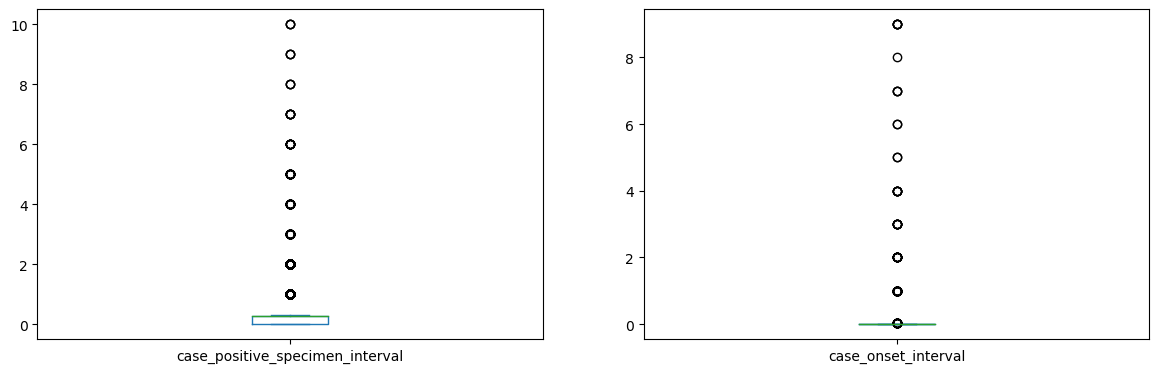

In [454]:
df[continuous_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)

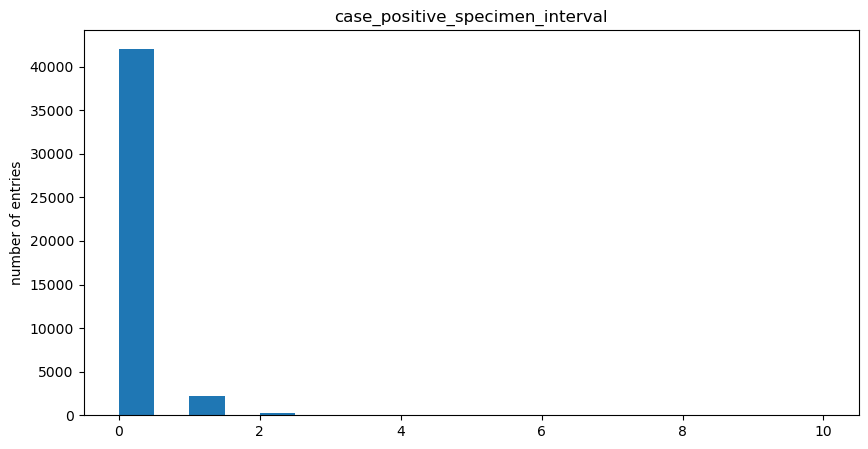

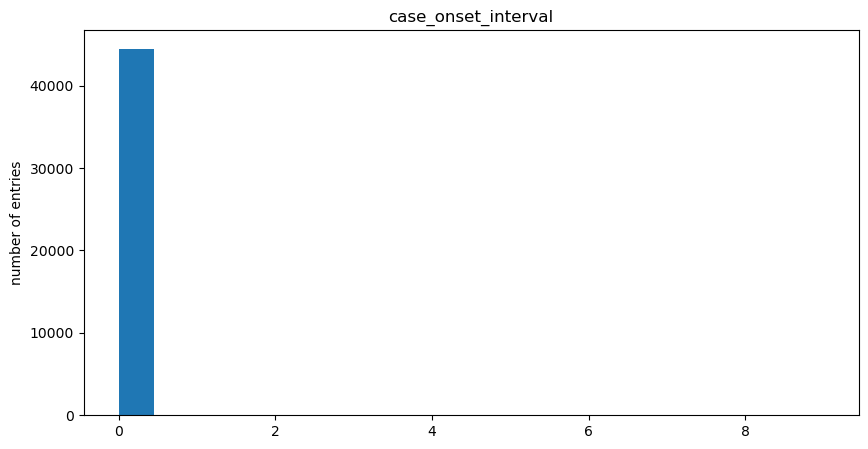

In [455]:
for col in continuous_columns:
        f = df[col].plot(kind='hist', figsize=(10,5), bins=20)
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()    

### Revisiting Categorical Columns plots

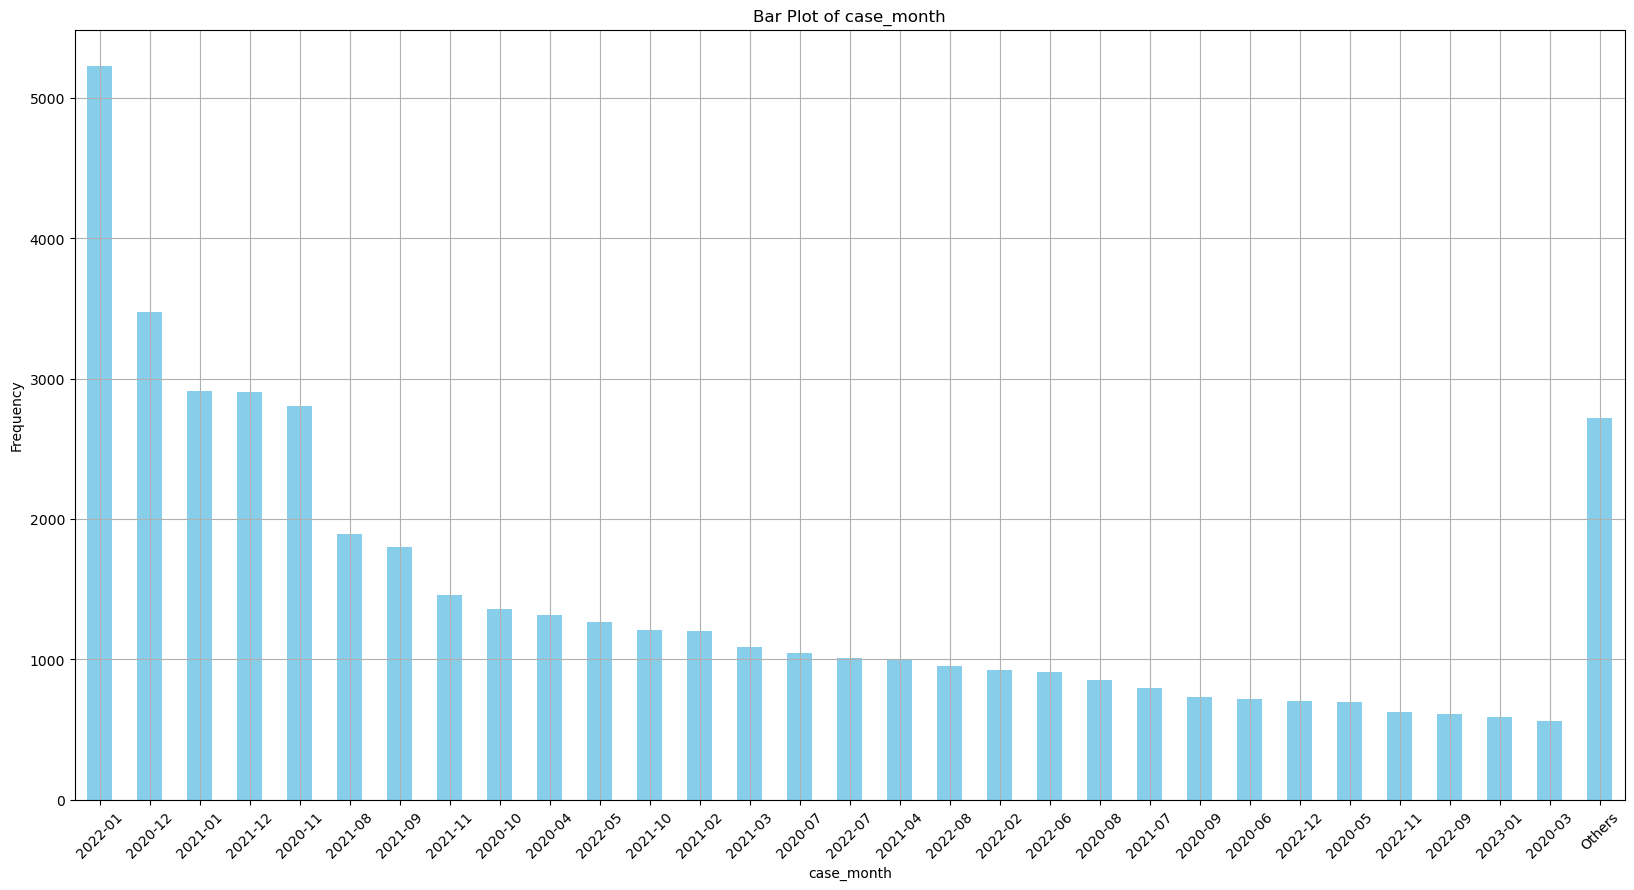

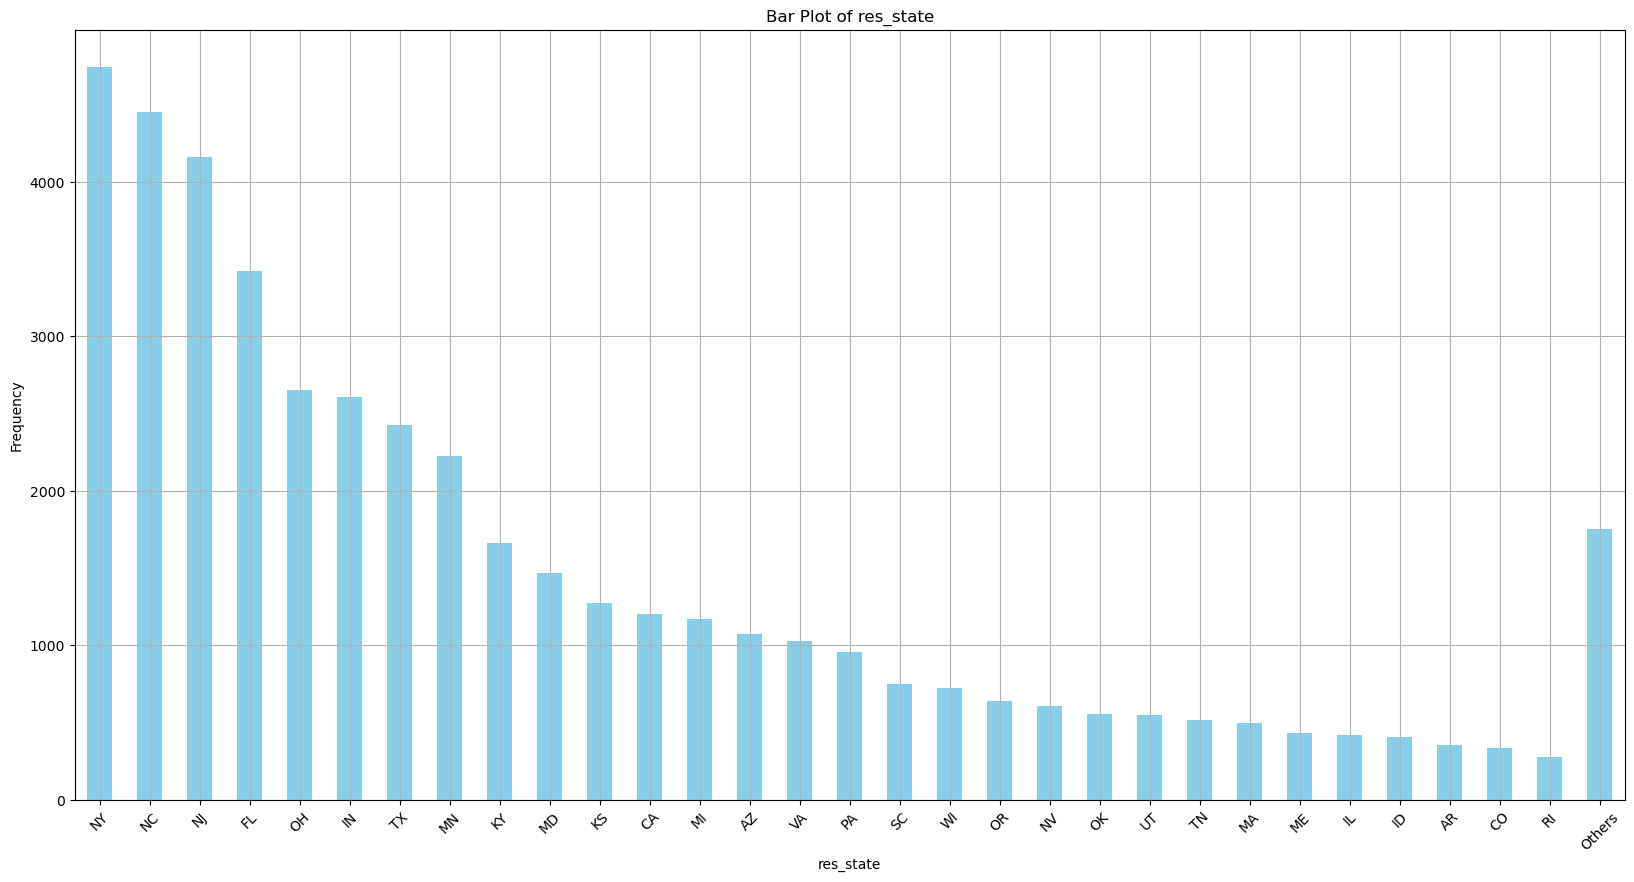

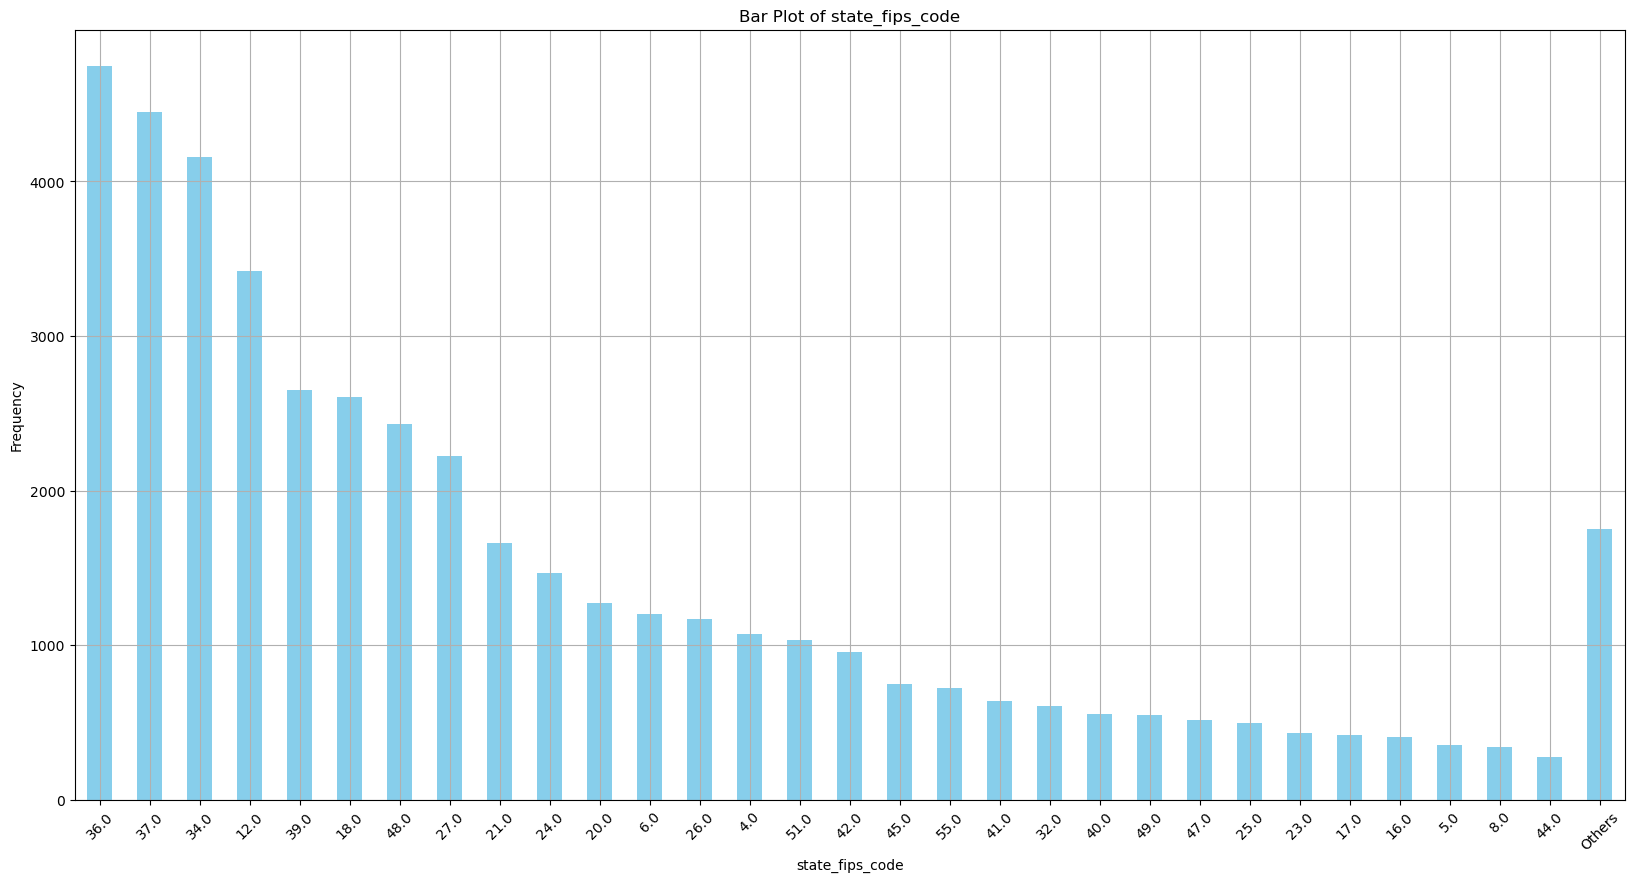

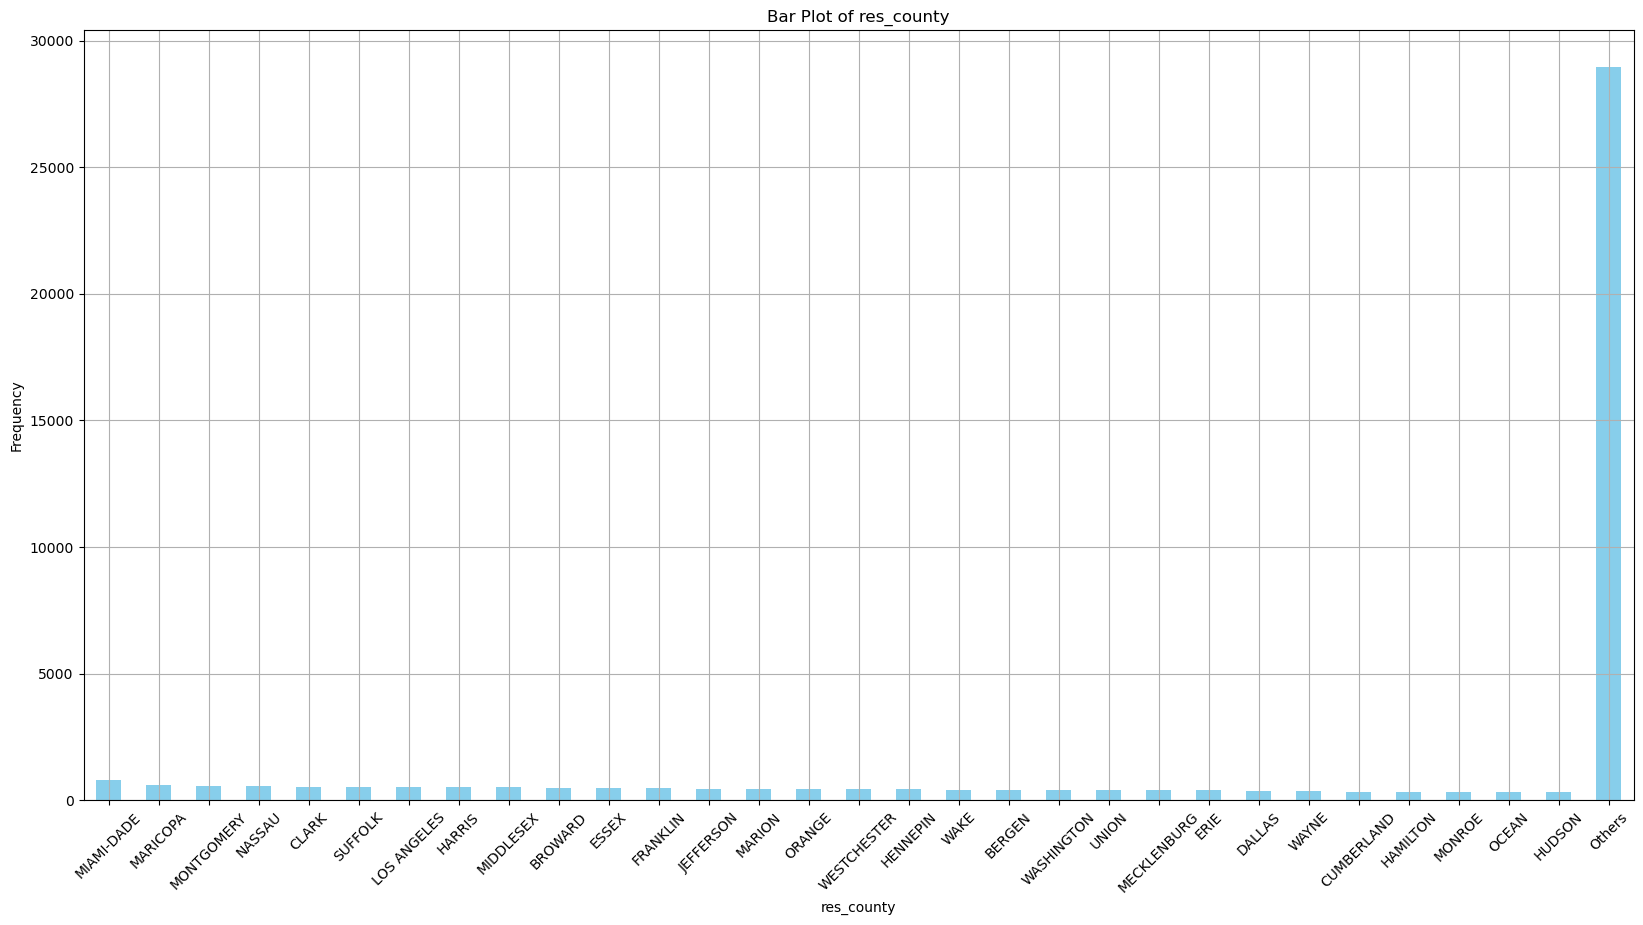

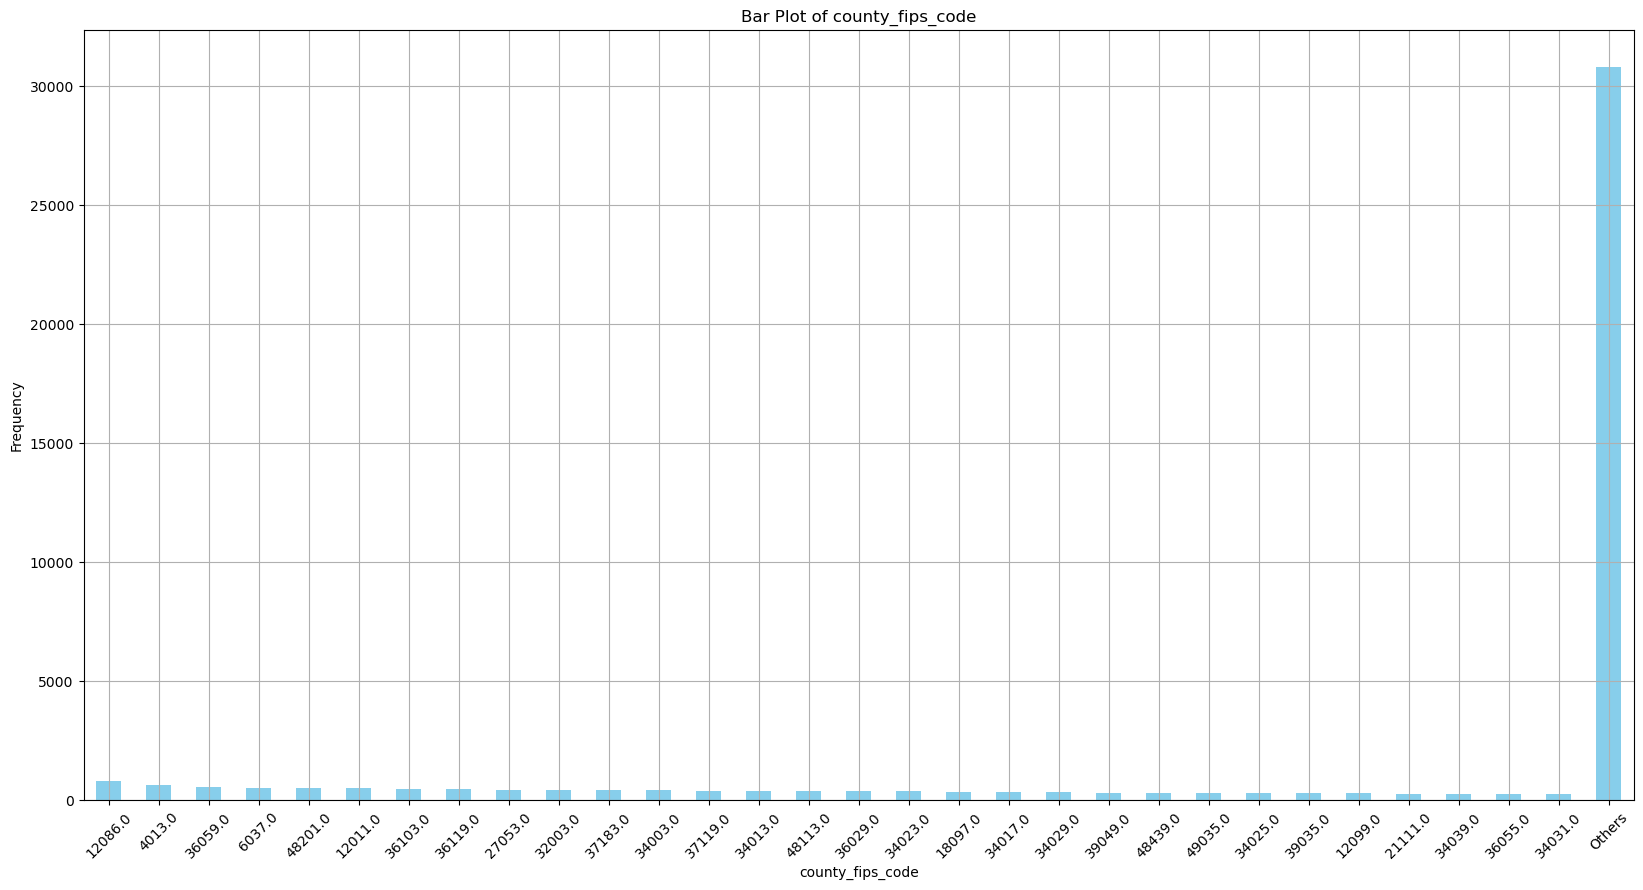

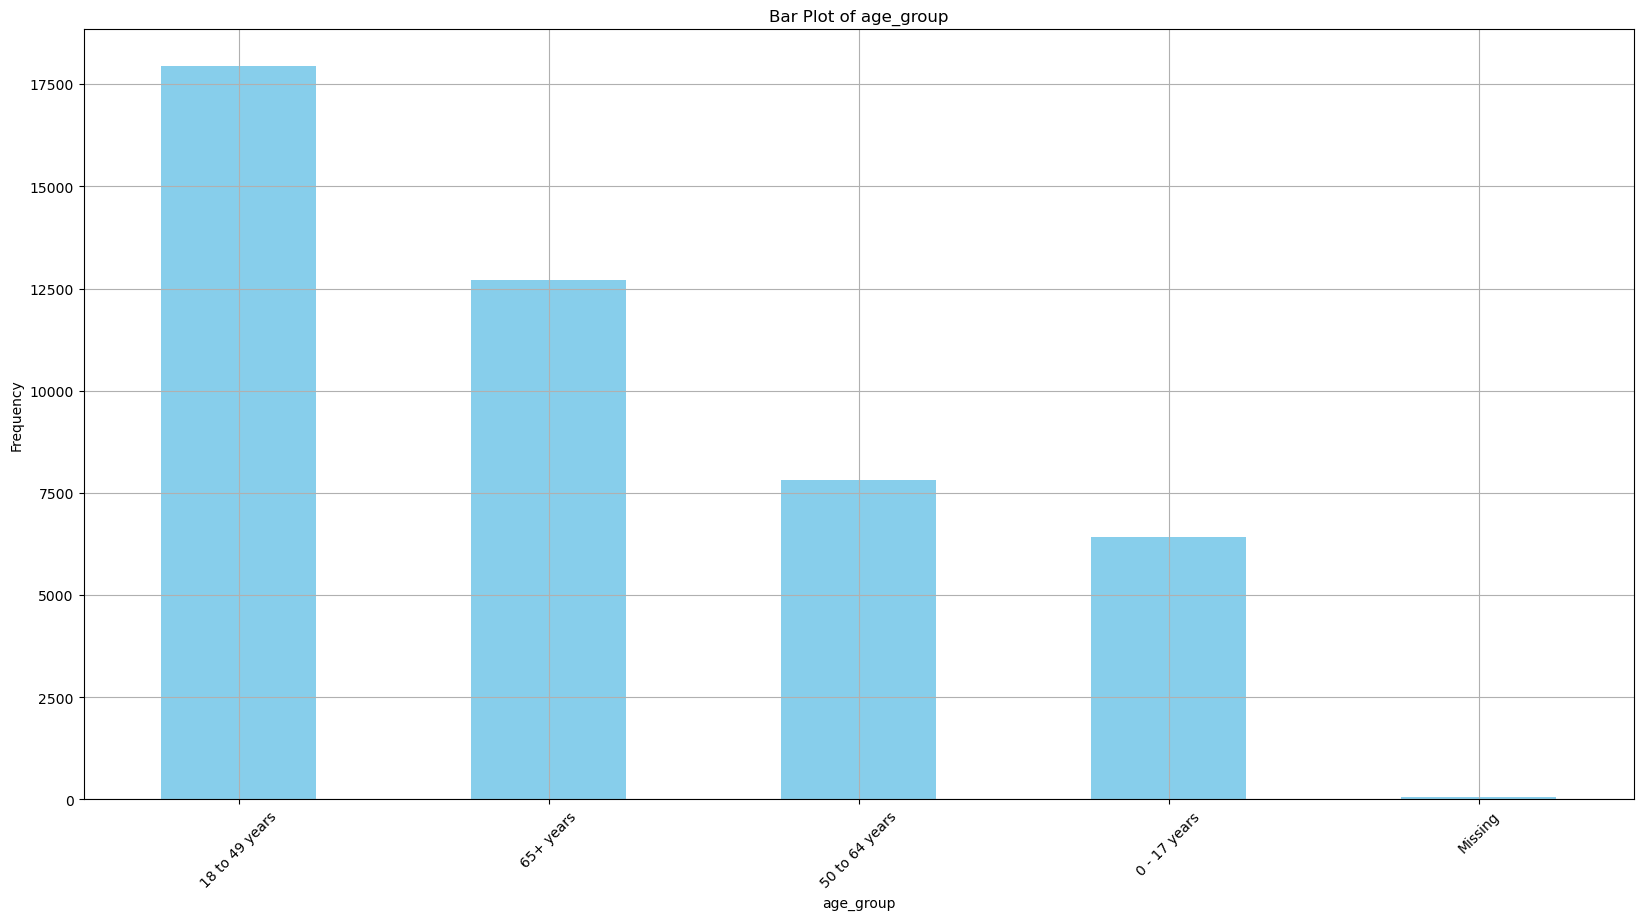

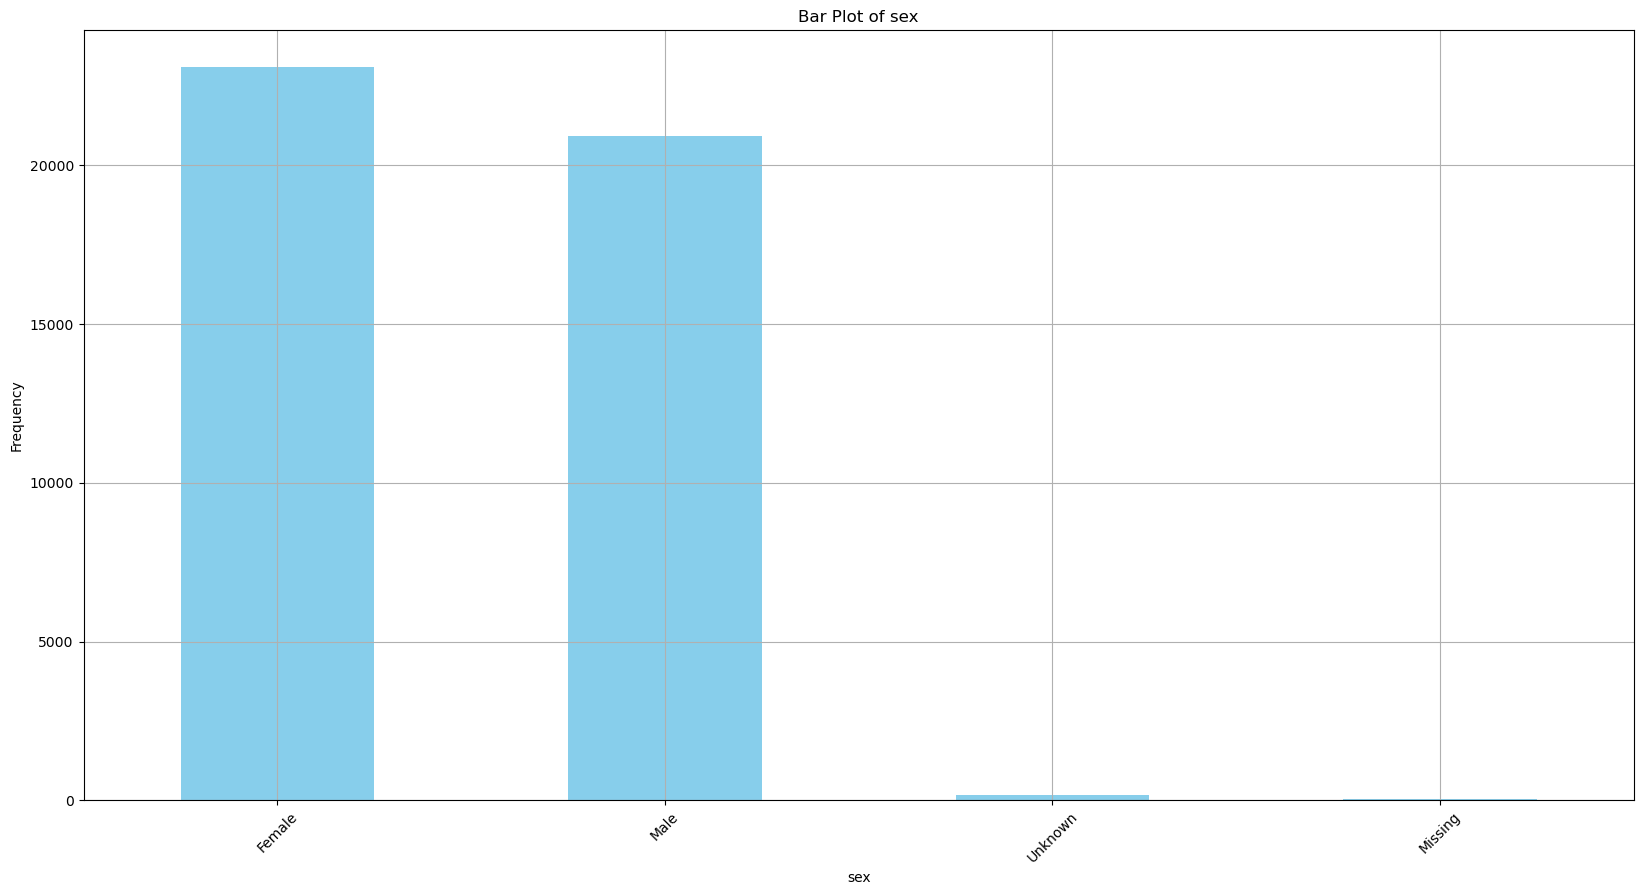

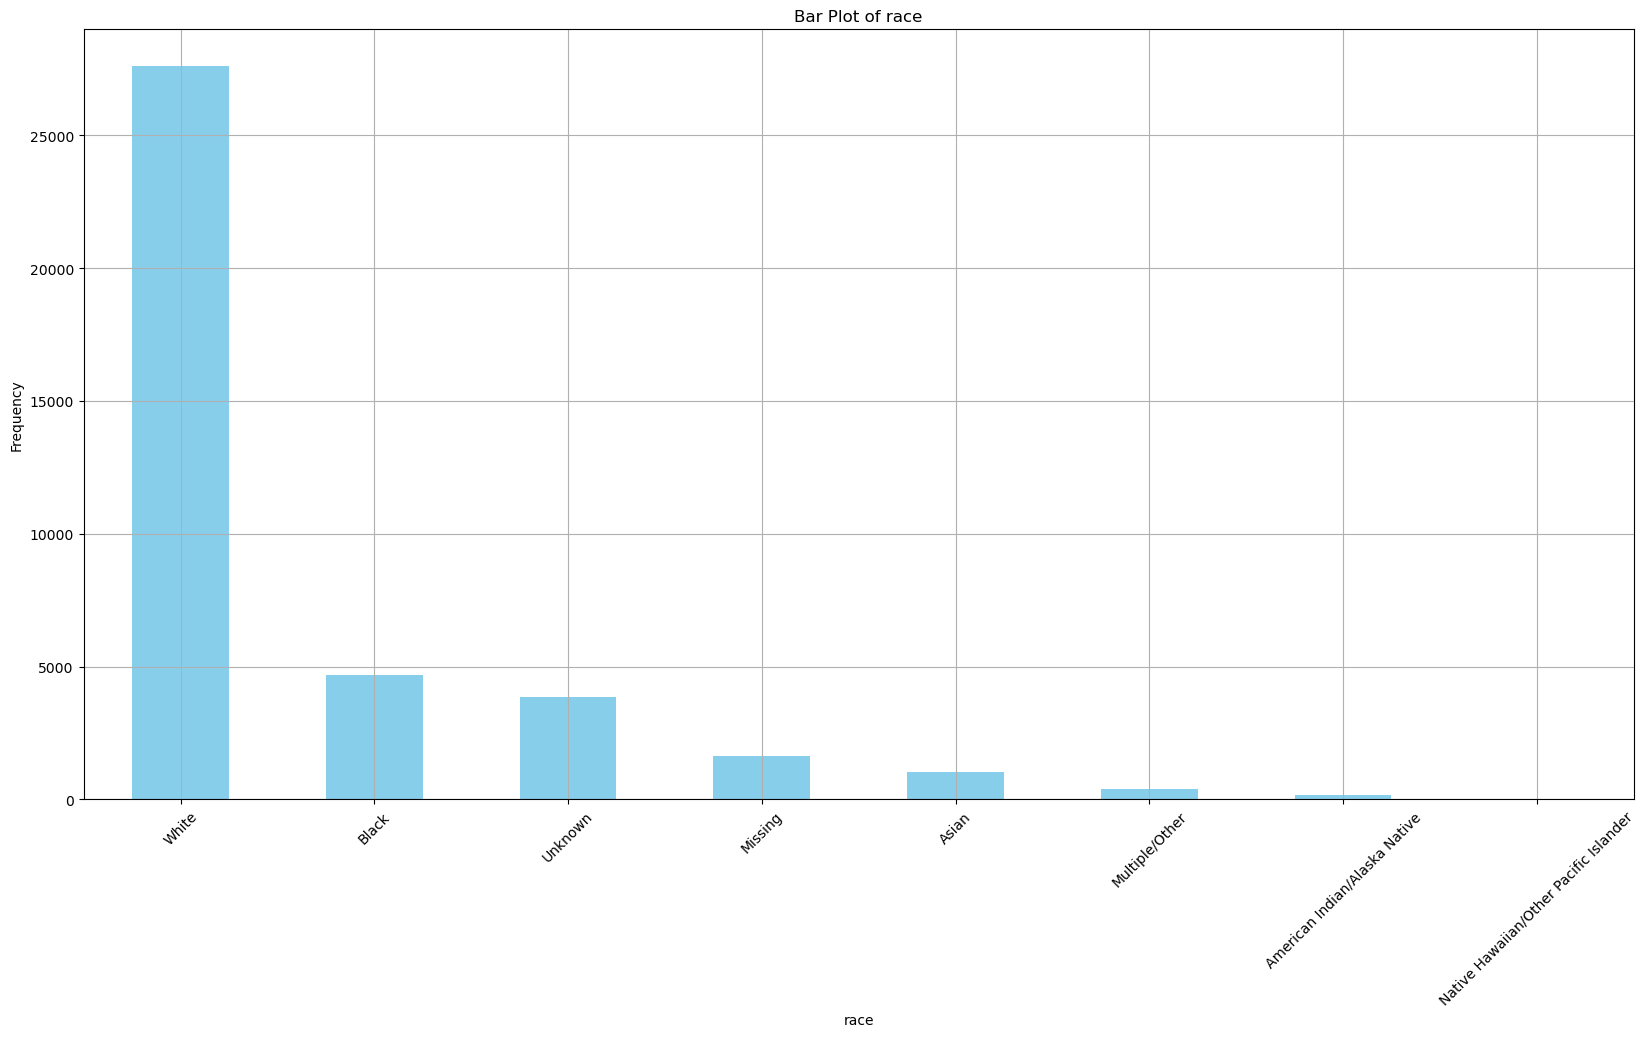

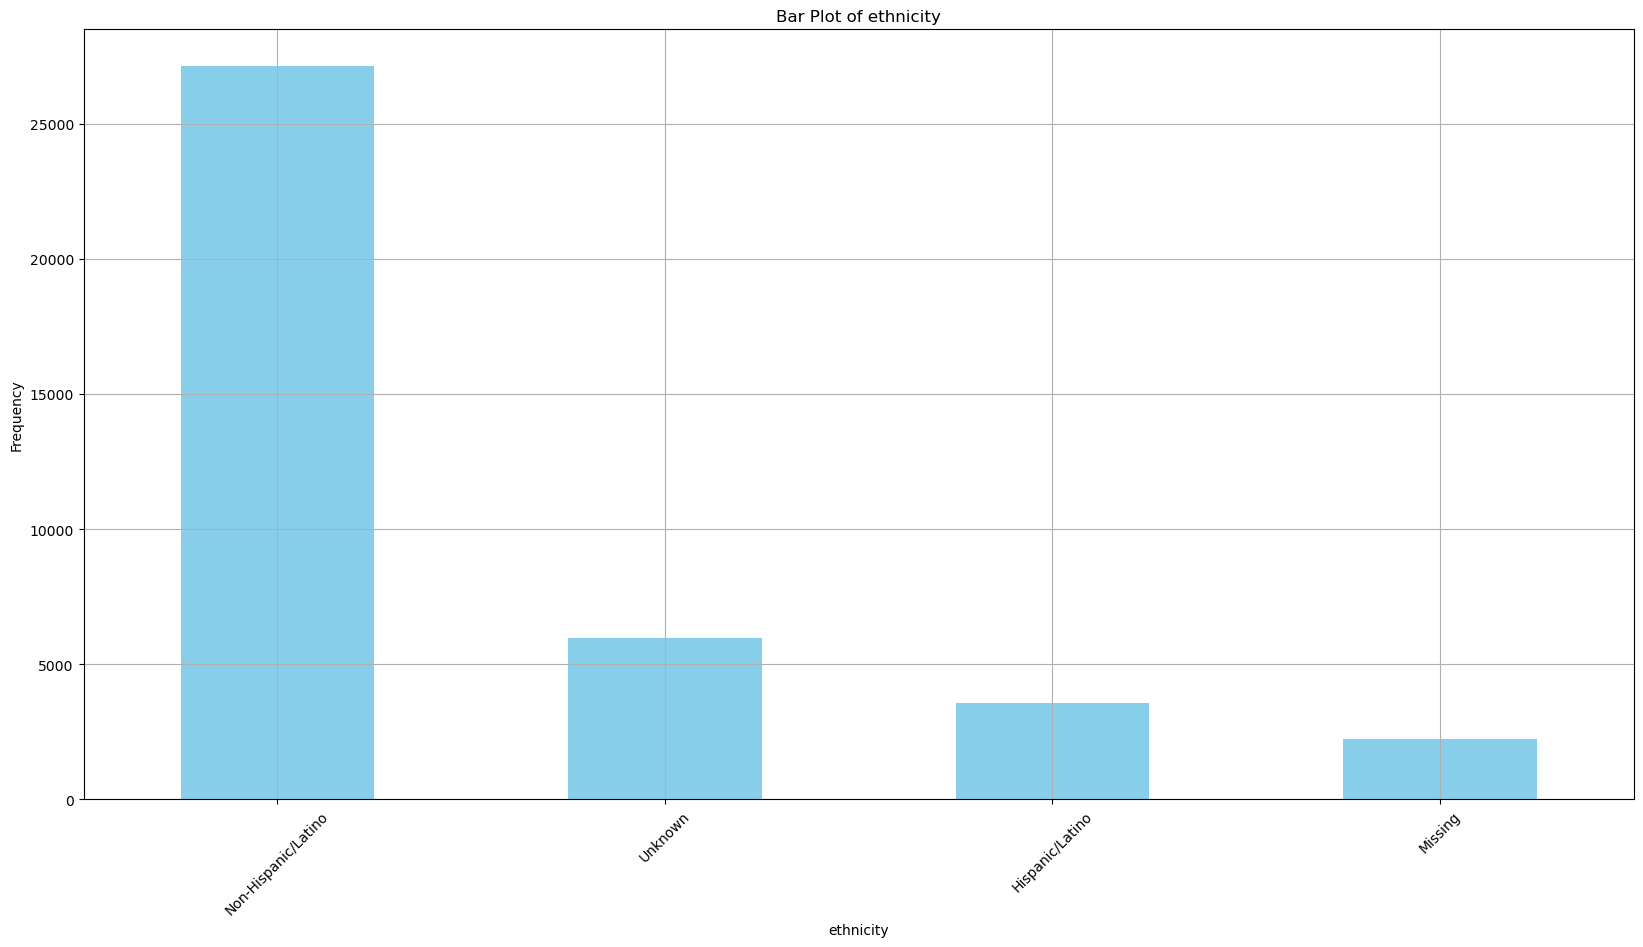

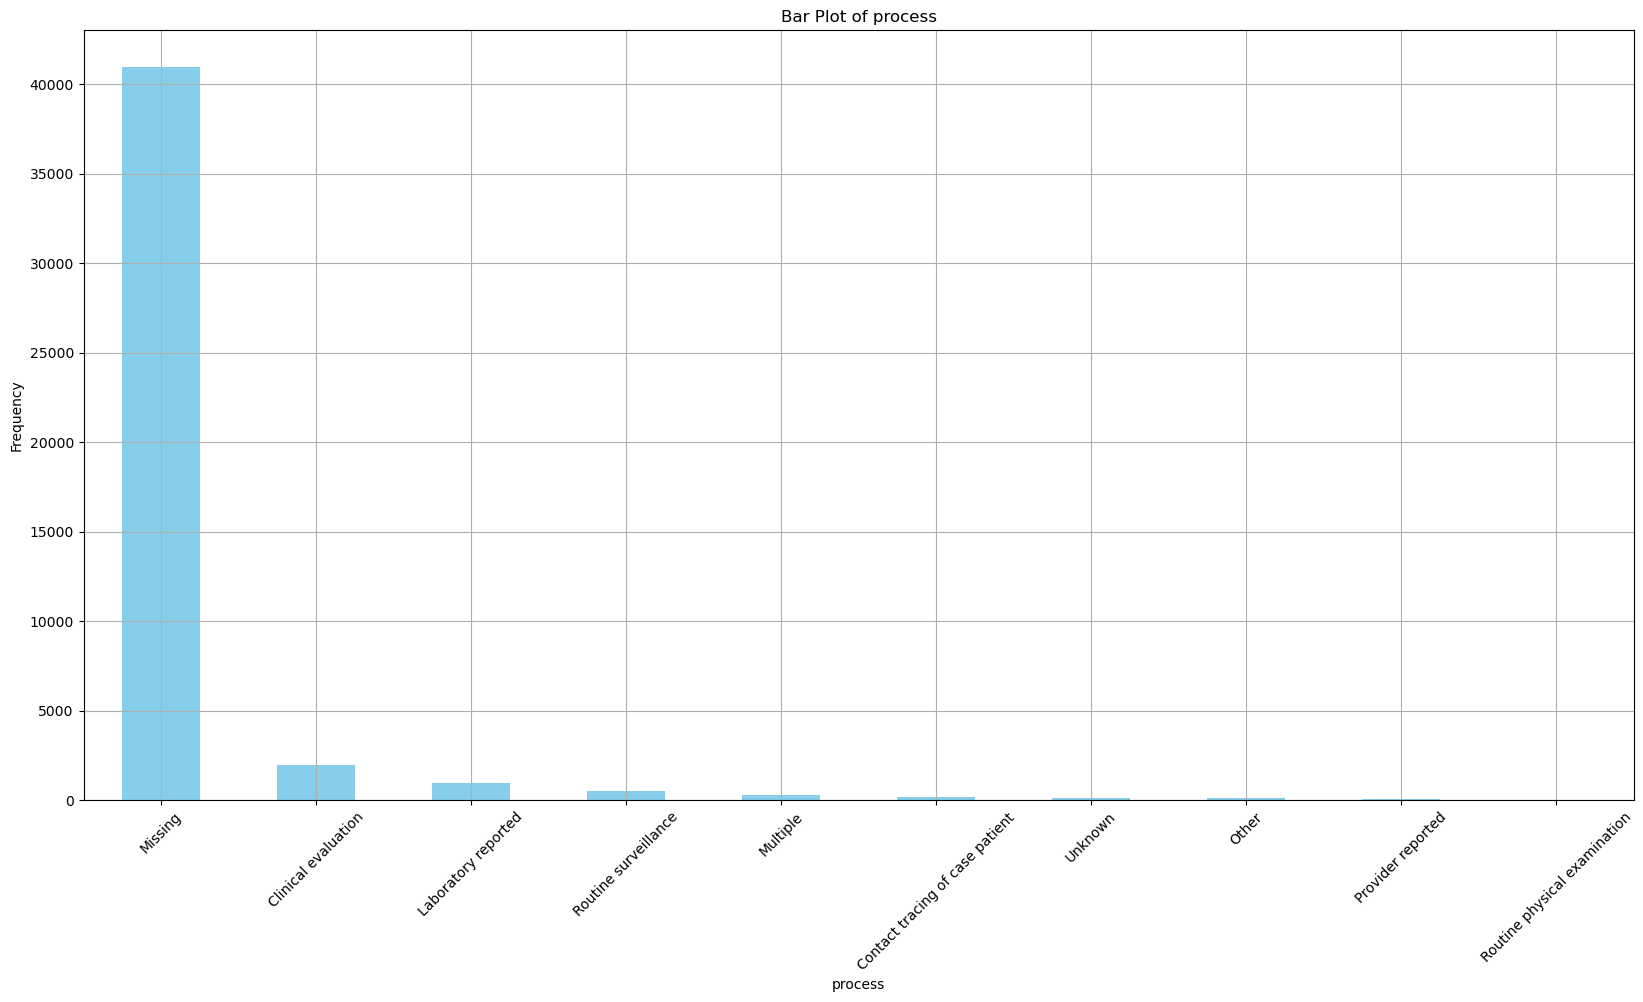

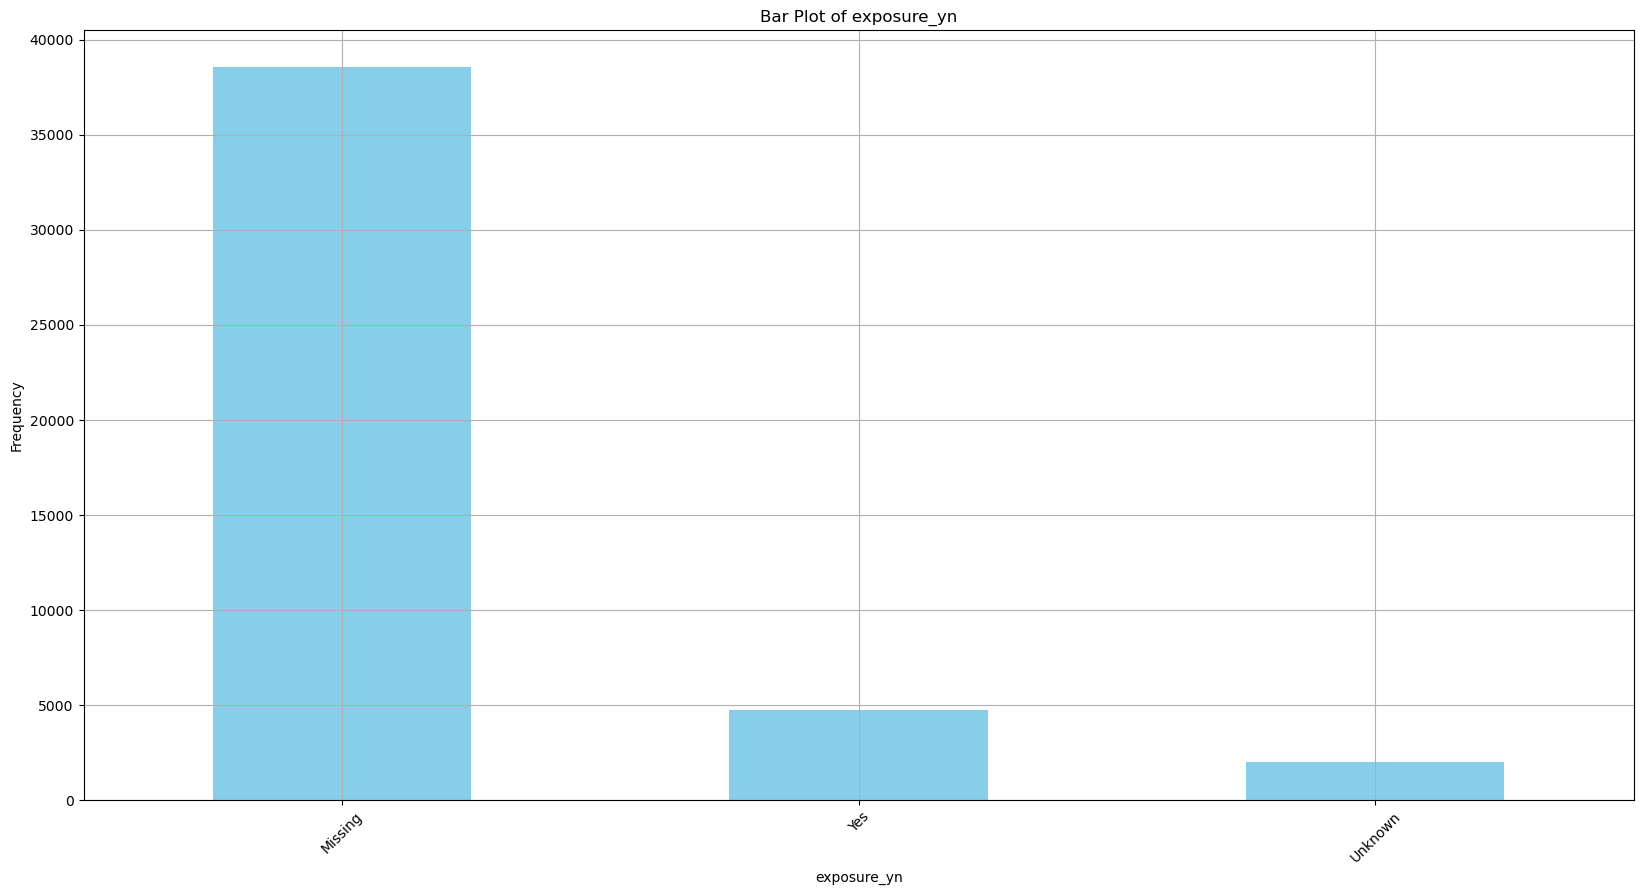

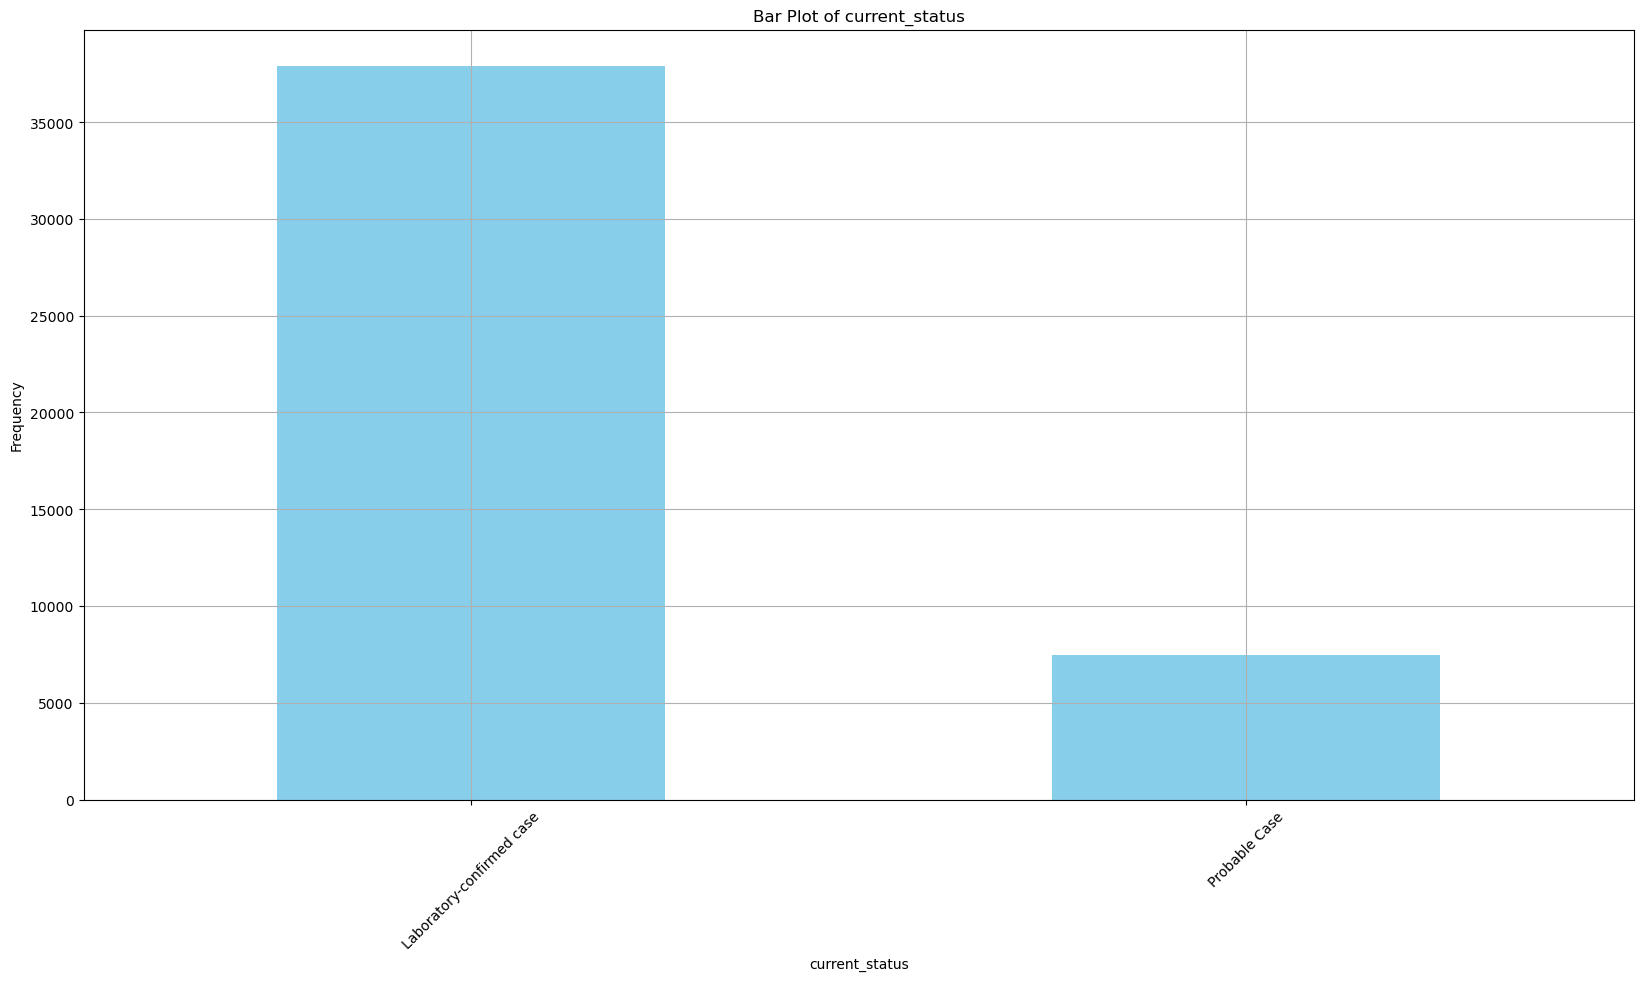

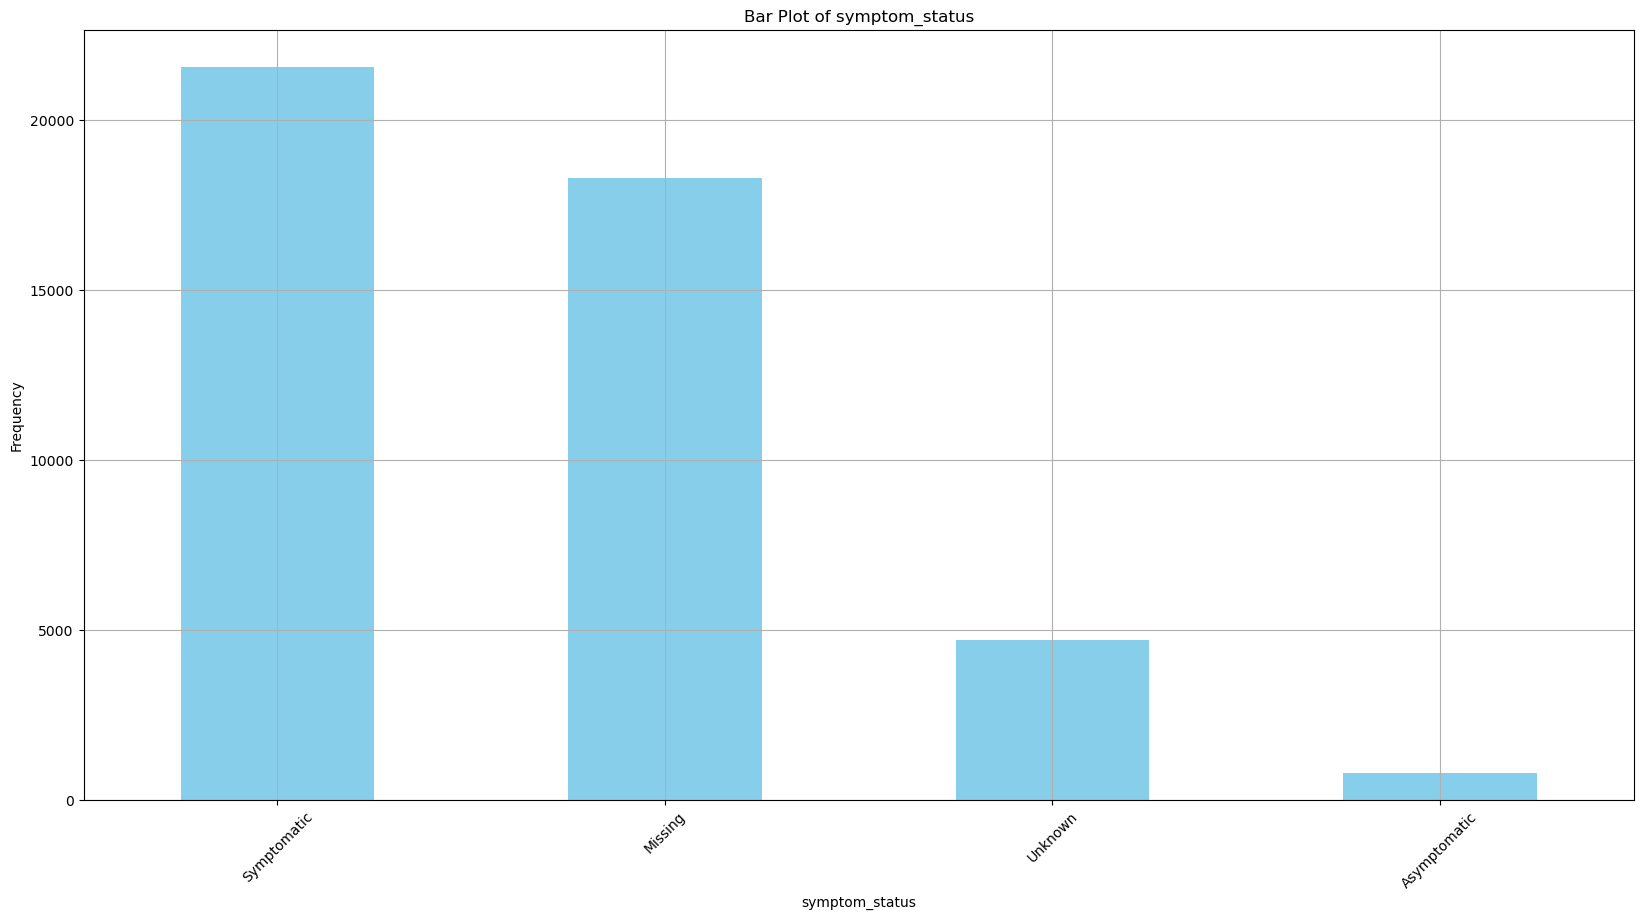

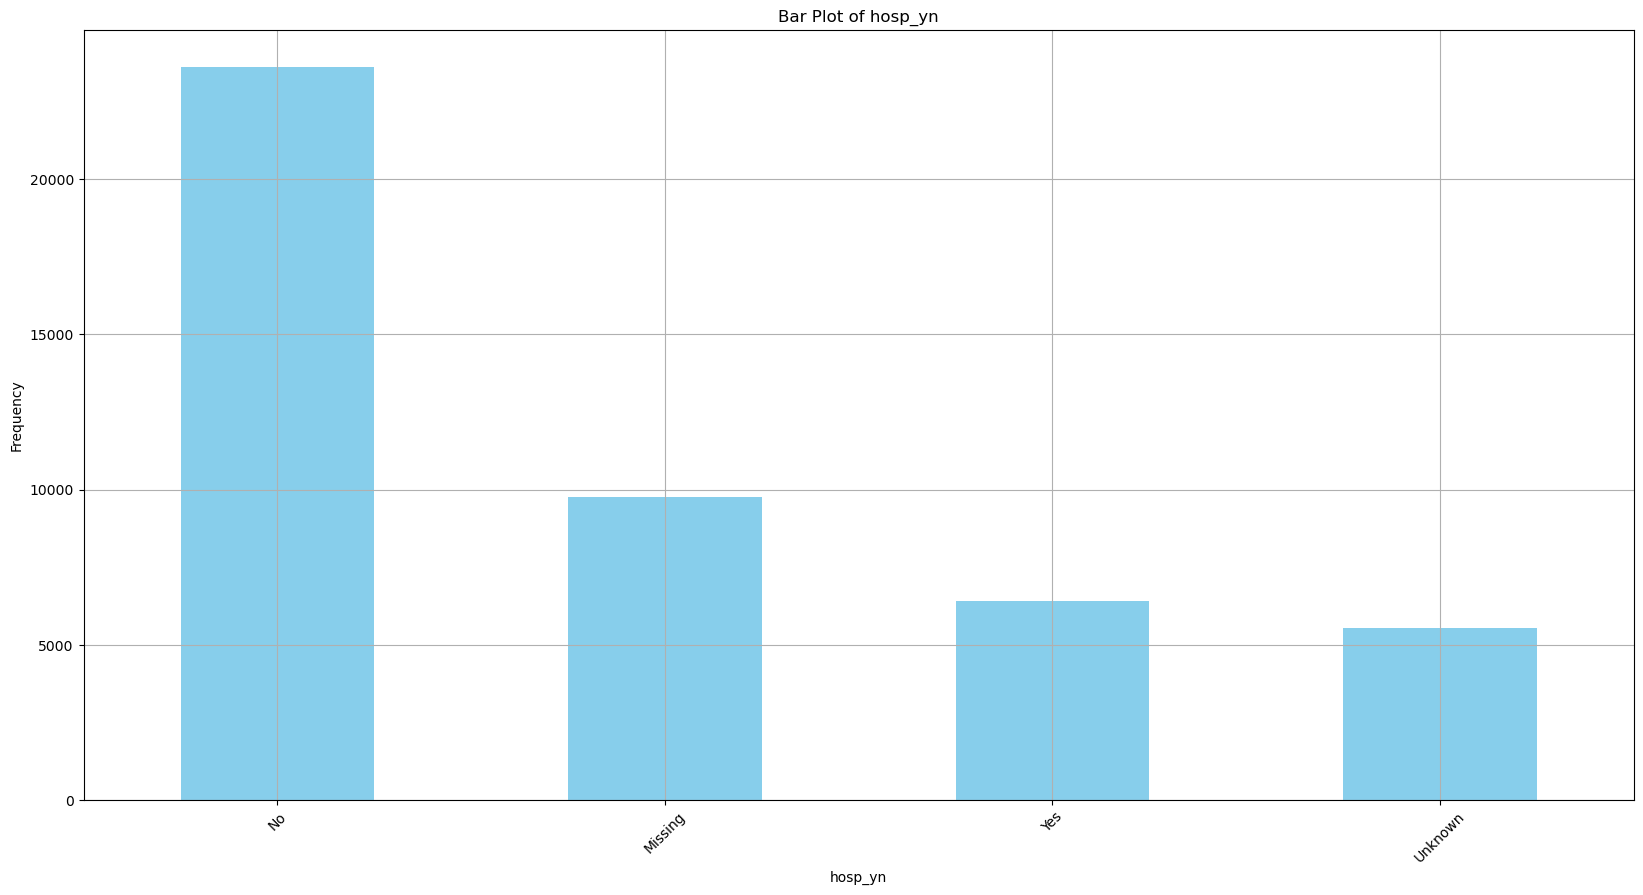

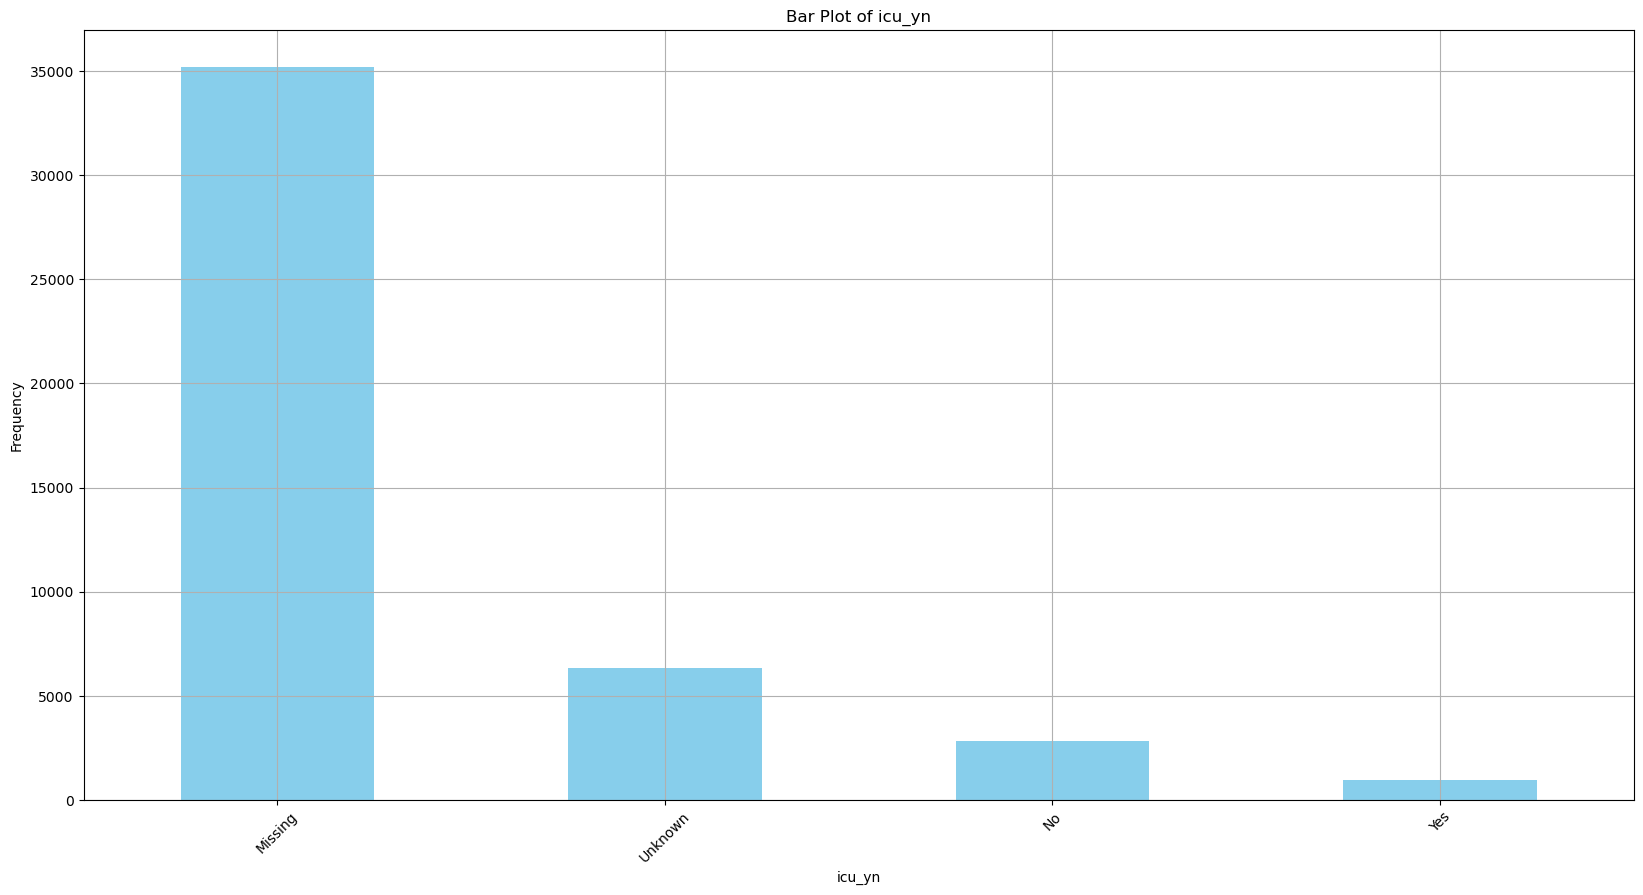

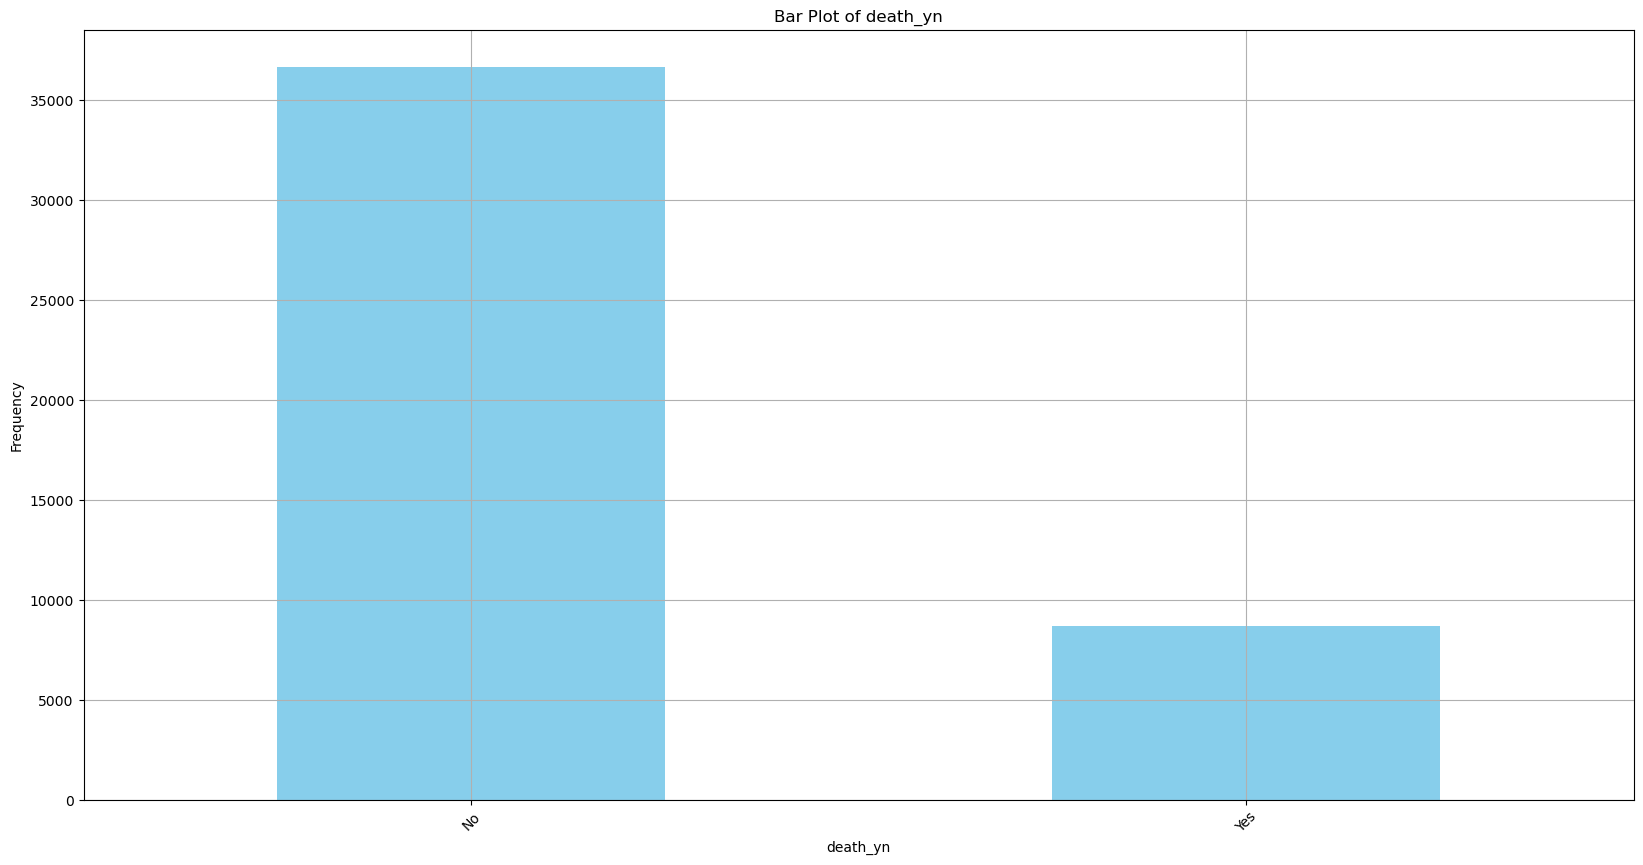

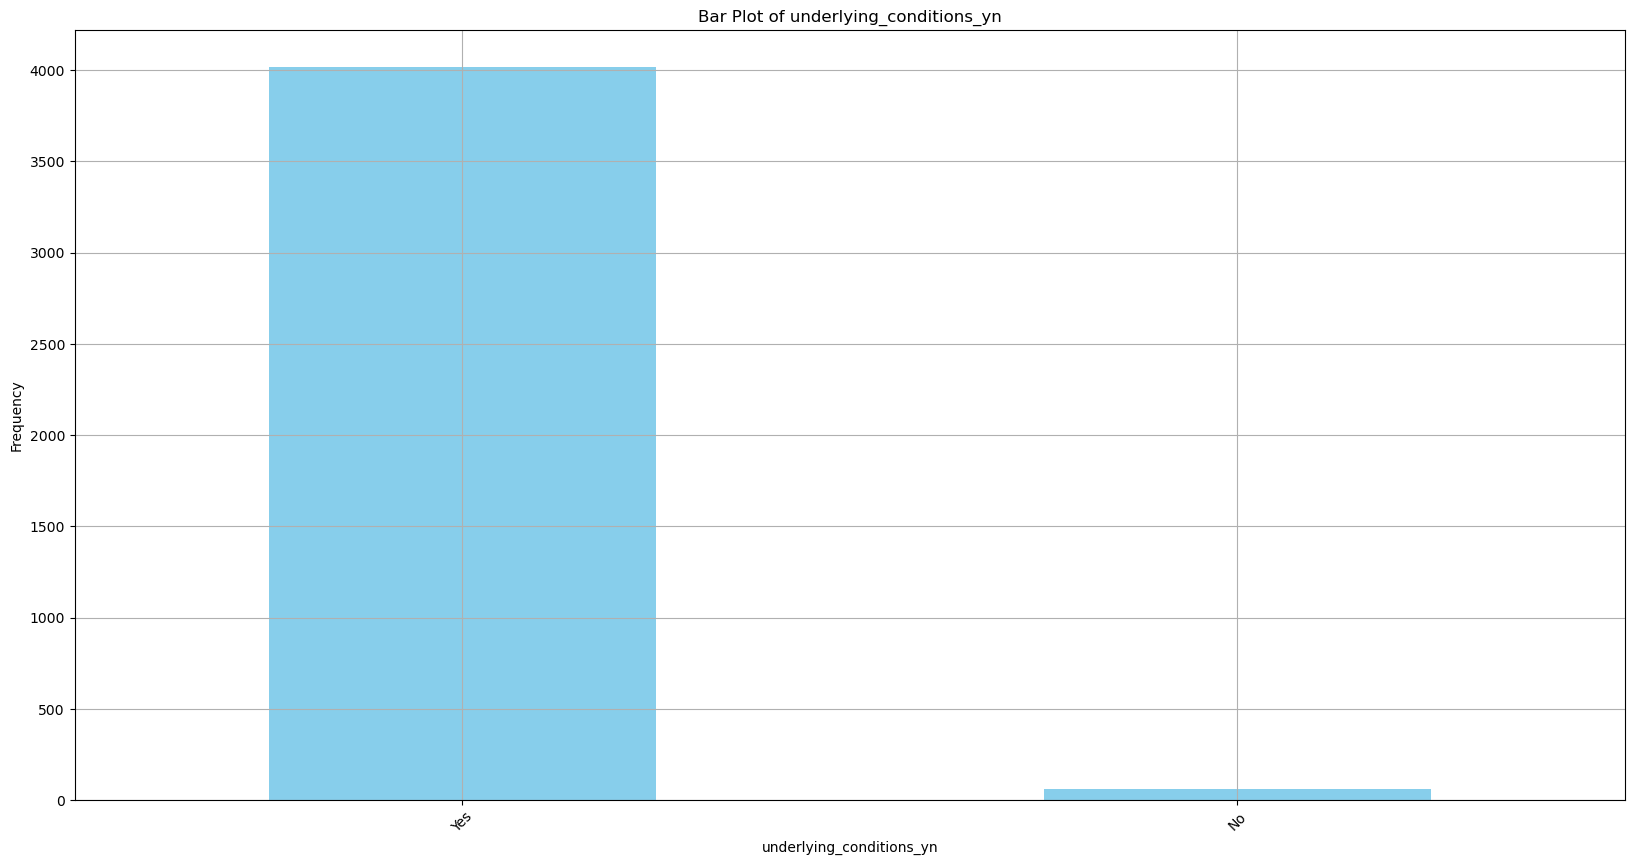

In [456]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    max_categories = 30
    for column in categorical_features.columns:

        plt.figure(figsize=(20, 10))

        # Count the frequency of each category
        category_counts = categorical_features[column].value_counts()

        # If the number of unique categories is greater than max_categories, group smaller categories into "Others"
        if len(category_counts) > max_categories:
            top_categories = category_counts[:max_categories]
            other_count = category_counts[max_categories:].sum()
            top_categories['Others'] = other_count
            f = top_categories.plot(kind='bar', color='skyblue')
        else:
            f = category_counts.plot(kind='bar', color='skyblue')

        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.grid(True)
        pp.savefig(f.get_figure())
        plt.show()

Overall there are still few outliers to consider here. I could not deduce weather the outliers are wrong or not. Thus to be on the safe side I decided to keep them. The machine learning algorithms still need to deal with outliers in the real world as training data that is *too perfect and ideal* is just another form of bias.

### Summary of data quality plan:

| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| county_fibs_code                   | Outliers                      | Drop the entire column         |
| res_county                         | Null Values or empty cells    | 5% so Do Nothing               |
| sex                                | Null Values or empty cells    | 2% so Do Nothing               |
| sex                                | Has both Missing and Unknown  | Replaced all Unknown to Missing|
| race                               | Null Values or empty cells    | Do Nothing                     |
| race                               | Has both Missing and Unknown  | Replaced all Unknown to Missing|
| ethnicity                          | Null Values or empty cells    | Do Nothing                     |
| process                            | Null Values or empty cells    | Do Nothing                     |
| process                            | Outliers                      | Replace with null              |
| process                            | Has both Missing and Unknown  | Replaced all Unknown to Missing|
| case_positive_specimen_interval    | Null Values or empty cells    | Replace with interpolated mean |
| case_positive_specimen_interval    | Negative values               | Replace with null              |
| case_onset_interval                | Null Values or empty cells    | Replace with interpolated mean |
| case_onset_interval                | Negative values               | Replace with 0                 |
| case_onset_interval                | Outliers                      | Replace with interpolated mean |
| exposure_yn                        | Null Values or empty cells    | Do Nothing                     |
| exposure_yn                        | Outliers                      | Remove Outliers                |
| exposure_yn                        | Has both Missing and Unknown  | Replaced all Unknown to Missing|
| hosp_yn                            | Outliers                      | Replace with null              |
| hosp_yn                            | Null Values or empty cells    | Do Nothing                     | 
| hosp_yn                            | Has both Missing and Unknown  | Replaced all Unknown to Missing|
| icu_yn                             | Outliers                      | Do Nothing                     |
| icu_yn                             | Null Values or empty cells    | Do Nothing                     |
| icu_yn                             | Has both Missing and Unknown  | Replaced all Unknown to Missing|
| current_status                     | Outliers                      | Replace with null              |
| symptom_status                     | Outliers                      | Do Nothing                     | 
| symptom_status                     | Null Values or empty cells    | Do Nothing                     | 
| symptom_status                     | Has both Missing and Unknown  | Replaced all Unknown to Missing|
| underlying_conditions_yn           | Null Values or empty cells    | Do Nothing                     |

### - Saving the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

In [457]:
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Print table with descriptive statistics for all the continuous features
df_table_numeric = df[continuous_columns].describe().T

# Prepare %missing column
numeric_columns_missing  = 100 * (df[continuous_columns].isnull().sum()/df.shape[0])
# storing the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing


numeric_columns_card = df[continuous_columns].nunique()
# storing the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['unique'])
df_numeric_card

# Putting the columns together to prepare the final table for numeric_columns
continuousFeatueDesc = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Continuous Columns Statistics
continuousFeatueDesc

,count,mean,std,min,25%,50%,75%,max,%missing,unique
case_positive_specimen_interval,44575.0,0.19501,0.352054,0.0,0.0,0.264524,0.264524,10.0,0.0,13
case_onset_interval,44575.0,0.00452,0.148284,0.0,0.0,0.000000,0.000000,9.0,0.0,11


In [458]:
continuousFeatueDesc.to_csv("continuousFeatureDescription_1.csv")

In [459]:
# Print table with categorical statistics
categorical_columns = df.select_dtypes(['category']).columns
df_table_categ = df[categorical_columns].describe().T
df_table_categ

# store the 2ndmode and 2ndmode % values in a new dataframe
df_category_mode = pd.DataFrame(index = df_table_categ.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

# Prepare %missing column
category_columns_perc_missing = 100 * ((df[categorical_columns].isin(['Missing', 'missing', 'unknown', 'Unknown', '-', '']) | df[categorical_columns].isnull()).sum() / df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

# Look at the values taken by each categorical feature
for column in categorical_columns:
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'
        
# Categorical Columns Statistics
categoricalFeatueDesc = pd.concat([df_table_categ, df_category_mode, df_category_perc_missing], axis=1)

categoricalFeatueDesc

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
case_month,44575,40,2022-01,5110,2022-01,5110,0.114638,2020-12,3419,0.076702,0.000000
res_state,44574,49,NY,4713,NY,4713,0.105734,NC,4436,0.09952,0.002243
state_fips_code,44574.0,49.0,36.0,4713.0,36.0,4713,0.105734,37.0,4436,0.09952,0.002243
res_county,41927,962,MIAMI-DADE,788,MIAMI-DADE,788,0.018795,MARICOPA,614,0.014645,5.940550
age_group,44194,5,18 to 49 years,17642,18 to 49 years,17642,0.399194,65+ years,12522,0.283342,0.982614
sex,43495,3,Female,22708,Female,22708,0.522083,Male,20595,0.473503,2.853617
race,38745,7,White,27056,White,27056,0.698309,Missing,5432,0.140199,25.265283
ethnicity,38208,4,Non-Hispanic/Latino,26582,Non-Hispanic/Latino,26582,0.695718,Unknown,5881,0.153921,32.464386
process,44575,9,Missing,40947,Missing,40947,0.918609,Clinical evaluation,1579,0.035423,91.860909
exposure_yn,44575,2,Missing,40076,Missing,40076,0.899069,Yes,4499,0.100931,89.906898


In [460]:
categoricalFeatueDesc.to_csv("categoricalFeatureDescription_1.csv")

In [461]:
output_excel_file = 'covid19_cdc_2320067_cleaned_2.csv'    
df.to_csv(output_excel_file, index=False)
print("Cleaned data has been saved to", output_excel_file)

Cleaned data has been saved to covid19_cdc_2320067_cleaned_2.csv


# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category

The features that I will look at for pairwise feature interaction,

are the following continuous features:
- Case Positive Specimen Interval: 
- Case Onset Interval: 

and the following categorical features:
- Case Month:
- Res State:
- Res County:
- Age Group:
- Sex:
- Race:
- Ethinicity:
- Process:
- Exposure:
- Current Status:
- Symptom Status:
- Hosp YN
- ICU YN
- Death YN
- Underlying Condition YN


The choices here I based on the idea that these particular features would be strong markers to indicate the the death of a patient, as also discussed based on plots in the Data_Quality_report.pdf.

### Continuous vs Continuous feature plots

**case_positive_specimen_interval** Vs **case_onset_interval**

(array([0.5, 1.5]),
 [Text(0.5, 0, 'case_positive_specimen_interval'),
  Text(1.5, 0, 'case_onset_interval')])

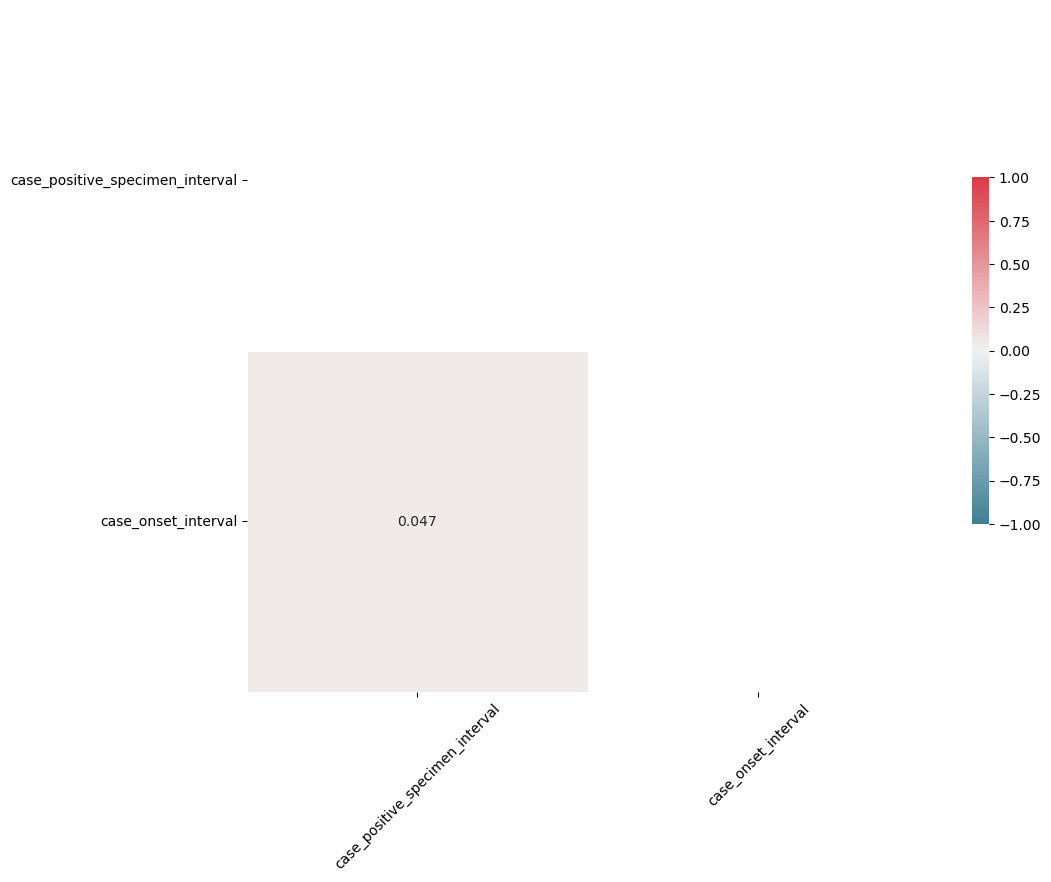

In [462]:
continuous_columns1 = ['case_positive_specimen_interval',
                      'case_onset_interval']
# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

<Axes: xlabel='case_onset_interval', ylabel='case_positive_specimen_interval'>

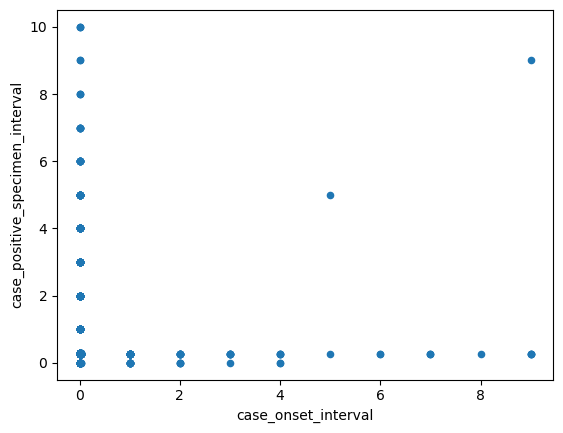

In [463]:
df.plot(kind='scatter', x='case_onset_interval', y='case_positive_specimen_interval')

The continuous features above were chosen as we believed they could have a strong impact on risk outcome.
- We can see from the above correlation matrix that there are very minimal correlations worth discussing.
- We see a correlation (0.045) between the Case onset and Case positive specimen interval.
- We can see there exist very less impact of Case onset on the Case positive intervel, from the scattered plots.

### Categorical vs Categorical feature plots

**case_month** Vs **res_state**

<Figure size 1200x800 with 0 Axes>

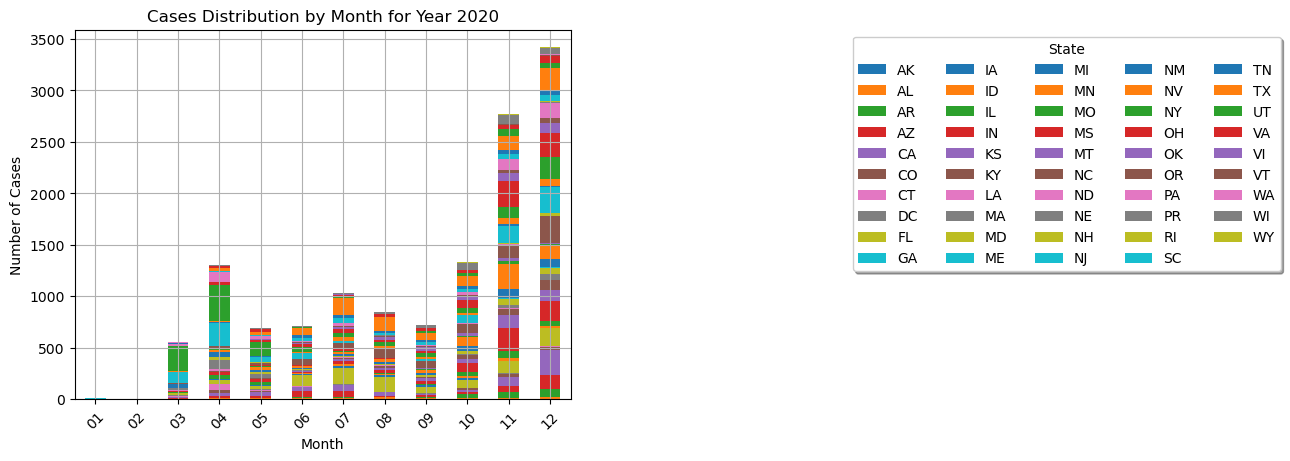

<Figure size 1200x800 with 0 Axes>

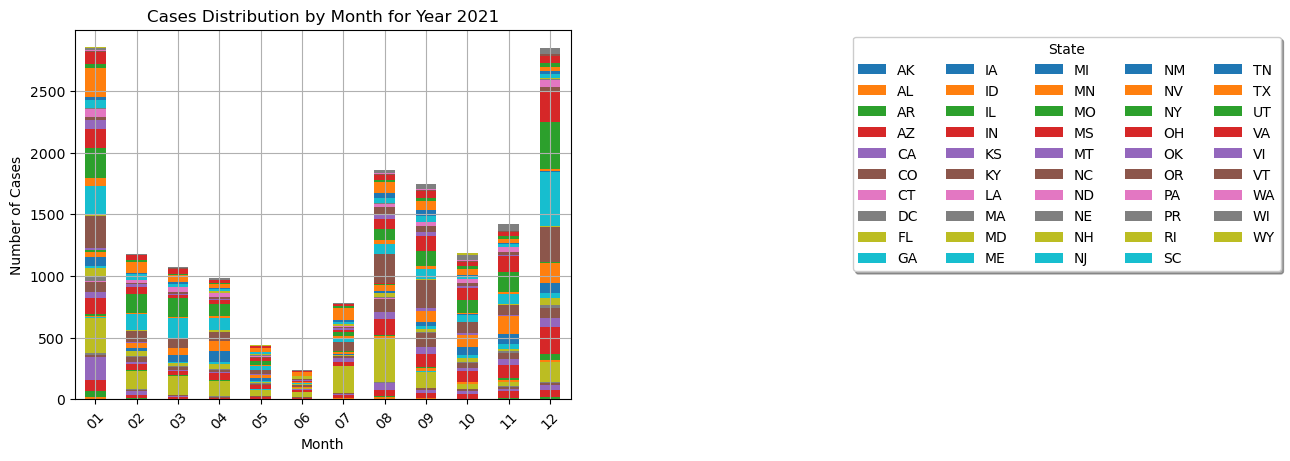

<Figure size 1200x800 with 0 Axes>

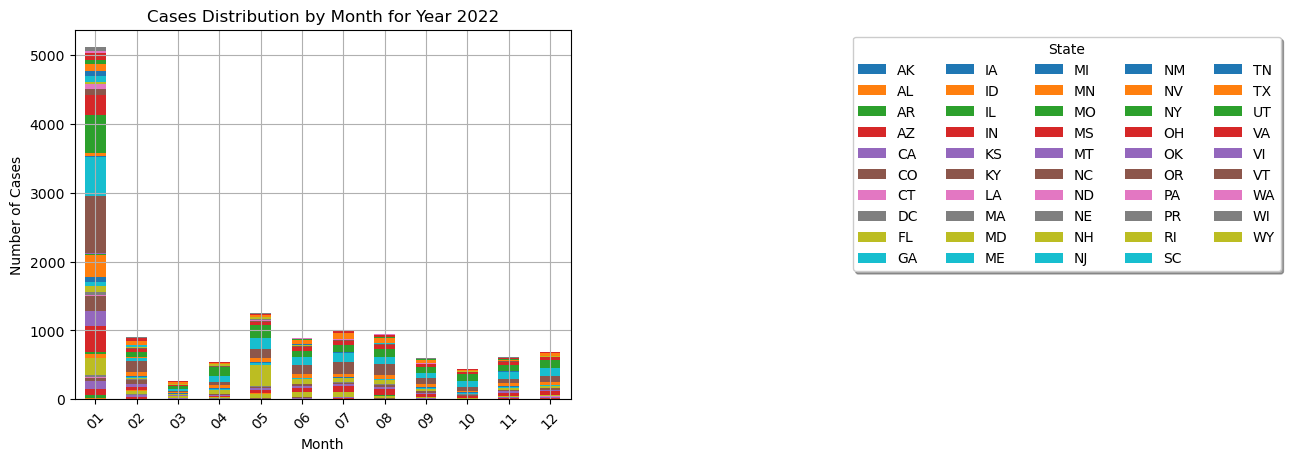

<Figure size 1200x800 with 0 Axes>

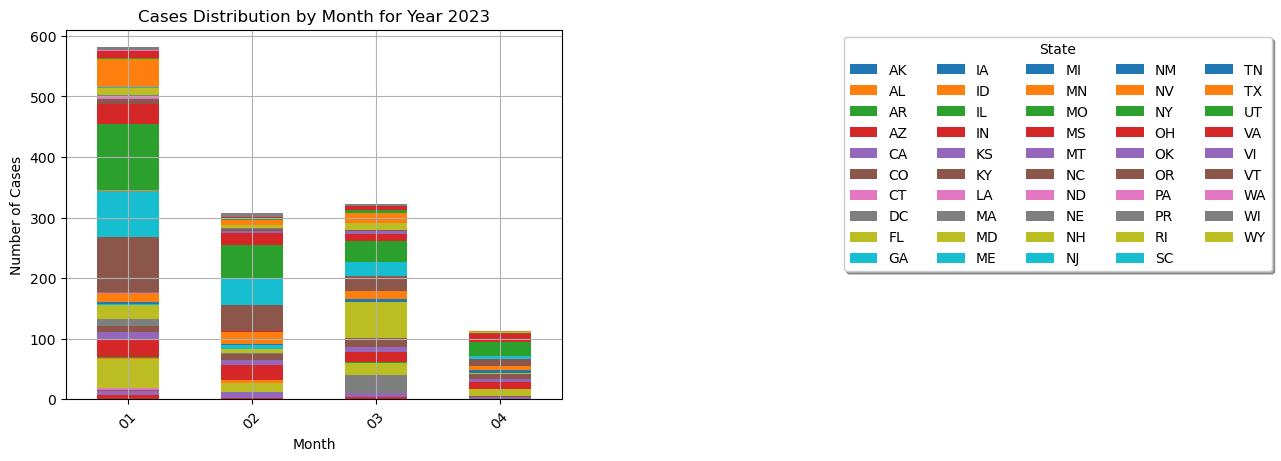

In [464]:
df_top = df.copy()

# Split 'case_month' into 'Year' and 'Month' columns
df_top[['Year', 'Month']] = df_top['case_month'].str.split('-', expand=True)

# Get unique years
years = df_top['Year'].unique()

# Create separate plots for each year
for year in years:
    # Filter data for the current year
    df_year = df_top[df_top['Year'] == year]
    
    # Group by month and state and calculate the count
    group_month_state = df_year.groupby(['Month', 'res_state']).size().unstack()
    
    # Plot for the current year
    plt.figure(figsize=(12, 8))
    group_month_state.plot(kind='bar', stacked=True)
    plt.title(f"Cases Distribution by Month for Year {year}")
    plt.xlabel('Month')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.legend(title='State', loc='upper center',bbox_to_anchor=(2, 1), fancybox=True, shadow=True, ncol=5)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

- There exist a common pattern that the highest amount of cases are observerd within the 1st month of all the years and that also within similar states
- This plot allows to determine which an all states are not following proper quarentine practices and keeping the virus alive.

**death_yn** Vs **age_group**

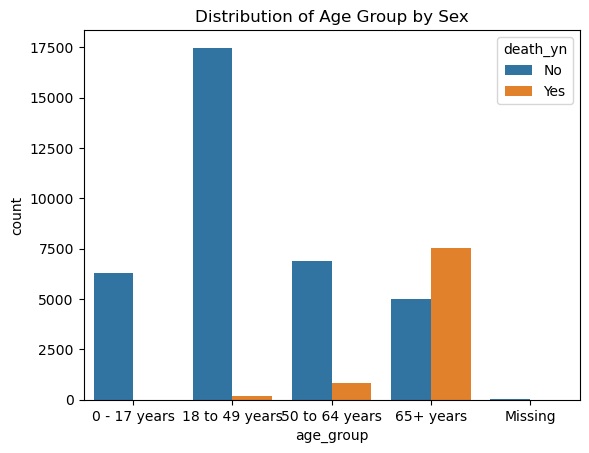

In [465]:
# Create the countplot
sns.countplot(data=df, x='age_group', hue='death_yn')

# Set the title
plt.title('Distribution of Age Group by Sex')

# Show plot
plt.show()

- Cases are found highest within the age group 18-49 but deaths are highest among age group 65+

**sex** Vs **age_group**

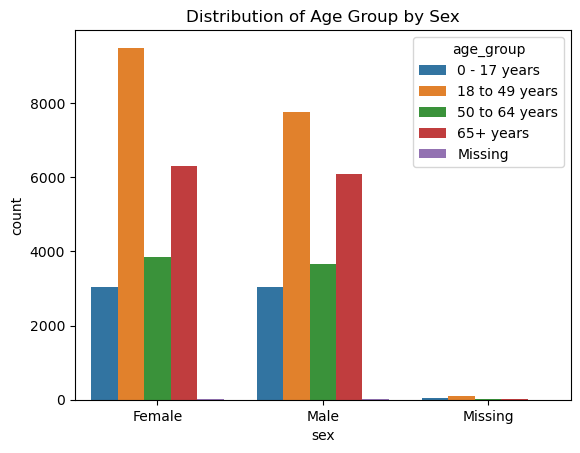

In [466]:
# Create the countplot
sns.countplot(data=df, x='sex', hue='age_group')

# Set the title
plt.title('Distribution of Age Group by Sex')

# Show plot
plt.show()

- Cases are highest observed within females between the ages 18 to 49 years old 

**sex** Vs **death_yn**

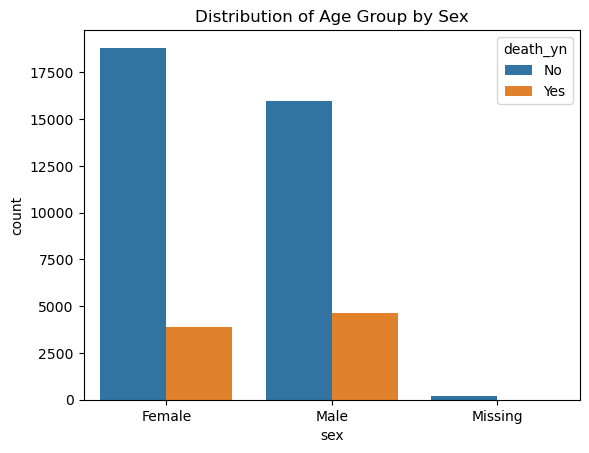

In [467]:
# Create the countplot
sns.countplot(data=df, x='sex', hue='death_yn')

# Set the title
plt.title('Distribution of Age Group by Sex')

# Show plot
plt.show()

- Recovery among females are comparitively higher than males

**sex** Vs **ethinicity**

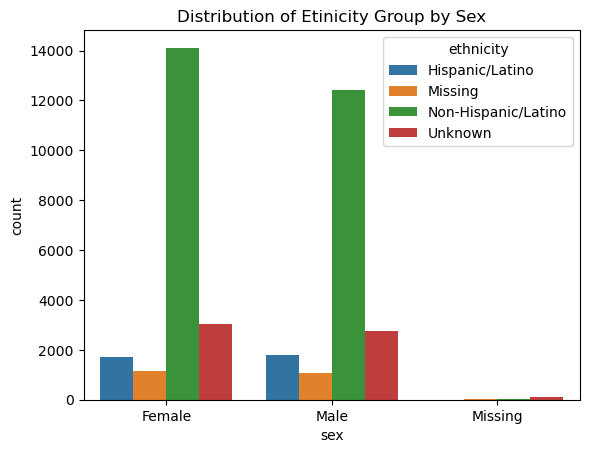

In [468]:
# Create the countplot
sns.countplot(data=df, x='sex', hue='ethnicity')

# Set the title
plt.title('Distribution of Etinicity Group by Sex')

# Show plot
plt.show()

- Highest amount of cases observed with females of the ethinic group Non-Hispanic/Latino

**sex** Vs **race**

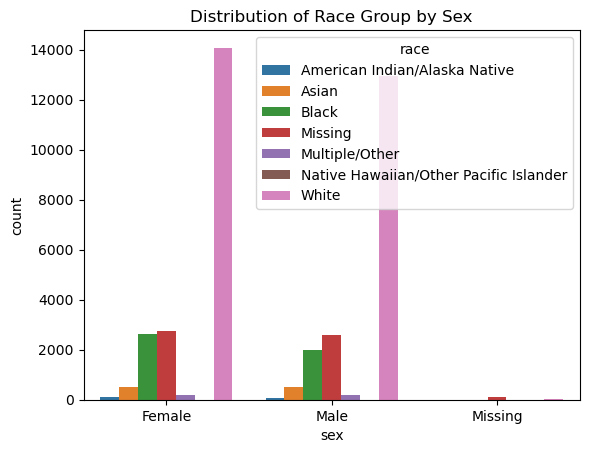

In [469]:
# Create the countplot
sns.countplot(data=df, x='sex', hue='race')

# Set the title
plt.title('Distribution of Race Group by Sex')

# Show plot
plt.show()

- Cases observed higher in whites than other races

**race** Vs **ethinicity**

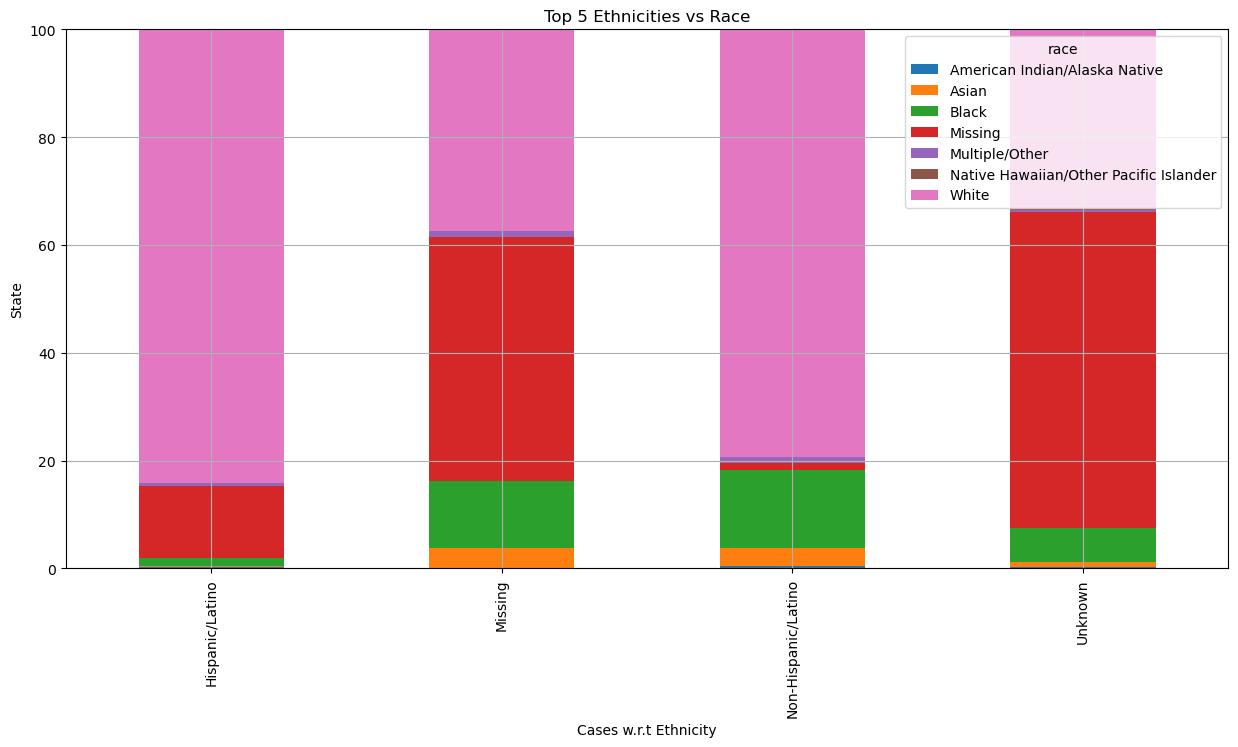

In [470]:
import pandas as pd
import matplotlib.pyplot as plt

top_ethnicities = df['ethnicity'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 5 ethnicities
df_top = df[df['ethnicity'].isin(top_ethnicities)]

# Add a new column 'percent' and set values to zero
df_top['percent'] = 0

# Iterate over each ethnicity
for ethnicity in top_ethnicities:
    # Calculate the count and percentage
    count = df_top[df_top['ethnicity'] == ethnicity].count()['race']
    count_percentage = (1 / count) * 100
    
    # Update the 'percent' column for each row belonging to the ethnicity
    df_top.loc[df_top['ethnicity'] == ethnicity, 'percent'] = count_percentage

# Group by ethnicity and res_state and calculate the sum of the percentage
group = df_top.groupby(['ethnicity', 'race'])['percent'].sum().unstack()

# Plot the top 5 ethnicities and res_state
my_plot = group.plot(kind='bar', stacked=True, title="Top 5 Ethnicities vs Race", figsize=(15, 7), grid=True)

# Set labels and limits
my_plot.set_xlabel("Cases w.r.t Ethnicity")
my_plot.set_ylabel("State")
my_plot.set_ylim([0, 100])

# Show plot
plt.show()


- Describes cases reportrd across various ethinic groups w.r.t race

**res_state** Vs **ethinicity**

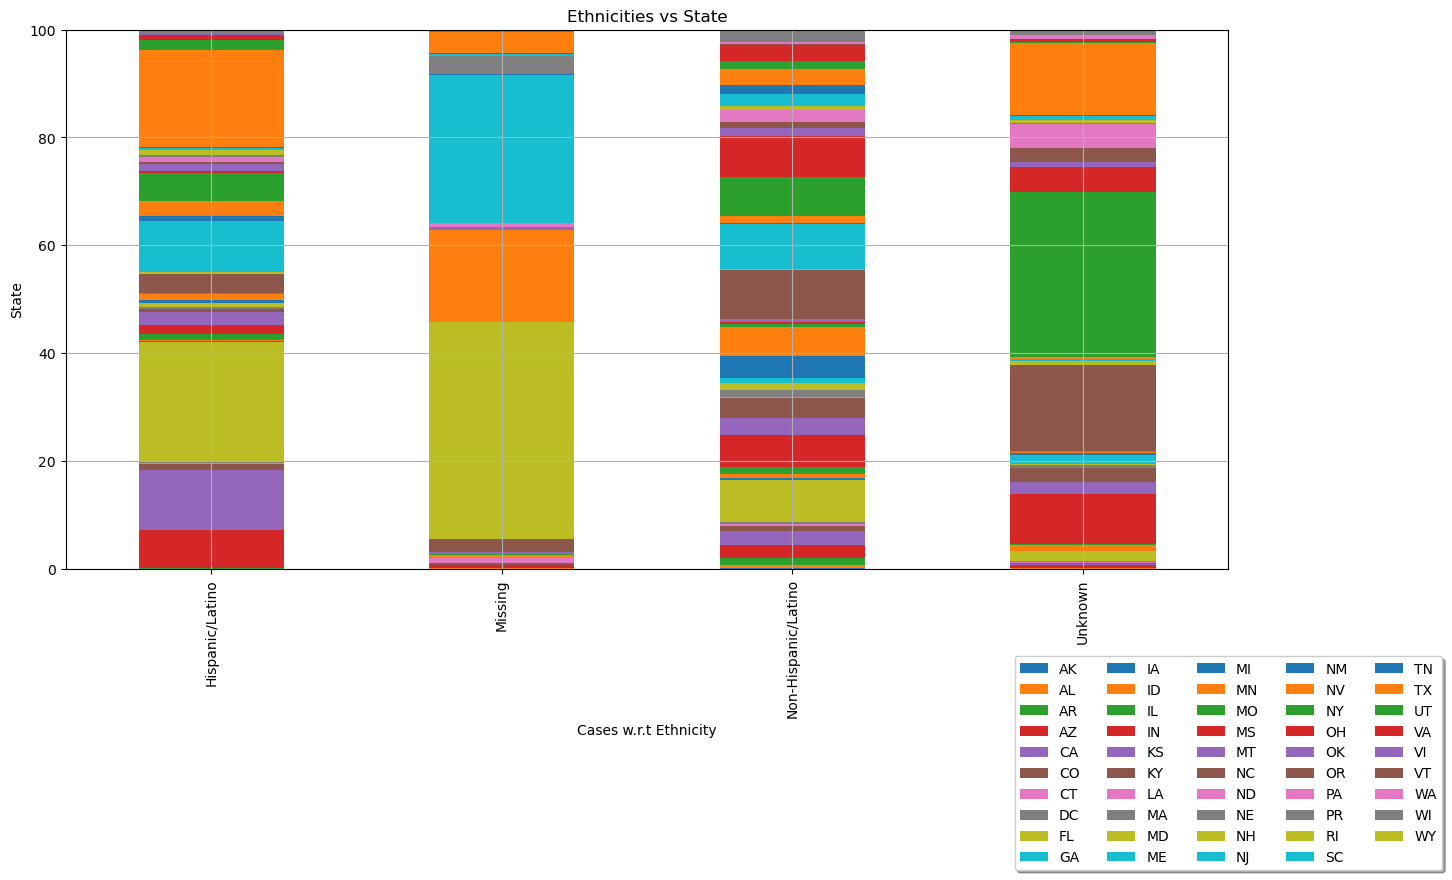

In [472]:
import pandas as pd
import matplotlib.pyplot as plt

top_ethnicities = df['ethnicity'].value_counts().nlargest(10).index

df_top = df[df['ethnicity'].isin(top_ethnicities)]

# Add a new column 'percent' and set values to zero
df_top['percent'] = 0

# Iterate over each ethnicity
for ethnicity in top_ethnicities:
    # Calculate the count and percentage
    count = df_top[df_top['ethnicity'] == ethnicity].count()['res_state']
    count_percentage = (1 / count) * 100
    
    # Update the 'percent' column for each row belonging to the ethnicity
    df_top.loc[df_top['ethnicity'] == ethnicity, 'percent'] = count_percentage

# Group by ethnicity and res_state and calculate the sum of the percentage
group = df_top.groupby(['ethnicity', 'res_state'])['percent'].sum().unstack()

# Plot the top 5 ethnicities and res_state
my_plot = group.plot(kind='bar', stacked=True, title="Ethnicities vs State", figsize=(15, 7), grid=True)
my_plot.legend(loc='upper center', bbox_to_anchor=(1, -0.15), fancybox=True, shadow=True, ncol=5)

# Set labels and limits
my_plot.set_xlabel("Cases w.r.t Ethnicity")
my_plot.set_ylabel("State")
my_plot.set_ylim([0, 100])

# Show plot
plt.show()


- Allows to know the cases spreading across various ethinic groups across states

**icu_yn** Vs **death_yn**

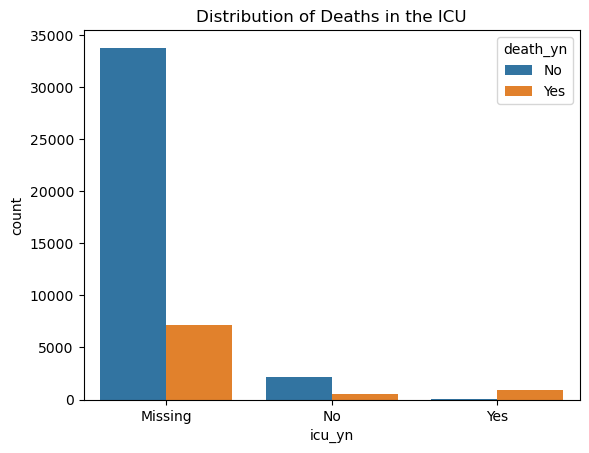

In [473]:
# Create the countplot
sns.countplot(data=df, x='icu_yn', hue='death_yn')

# Set the title
plt.title('Distribution of Deaths in the ICU')

# Show plot
plt.show()

- Lets you know how much cases reported in ICU has led to deaths

**hosp_yn** Vs **icu_yn**

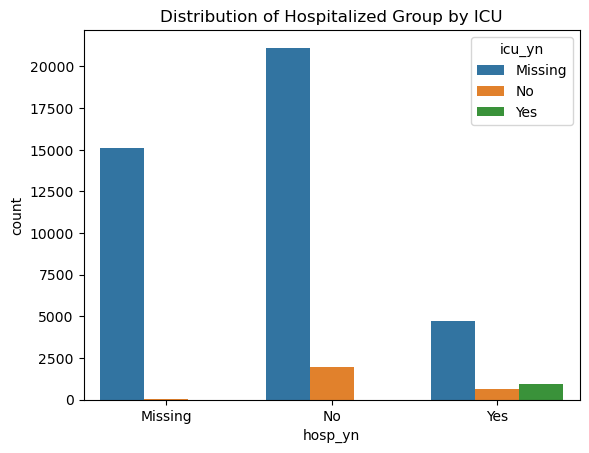

In [474]:
# Create the countplot
sns.countplot(data=df, x='hosp_yn', hue='icu_yn')

# Set the title
plt.title('Distribution of Hospitalized Group by ICU')

# Show plot
plt.show()

- Lets you know among the hospital cases, how many were serious and require ICU treatment

**exposure_yn** Vs **symptom_status**

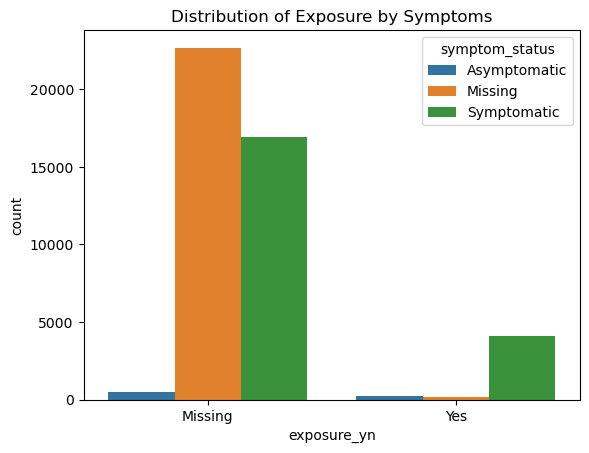

In [476]:
# Create the countplot
sns.countplot(data=df, x='exposure_yn', hue='symptom_status')

# Set the title
plt.title('Distribution of Exposure by Symptoms')

# Show plot
plt.show()

- Shows how many of people who had exposure got symptoms and how many didnt

**current_status** Vs **process**

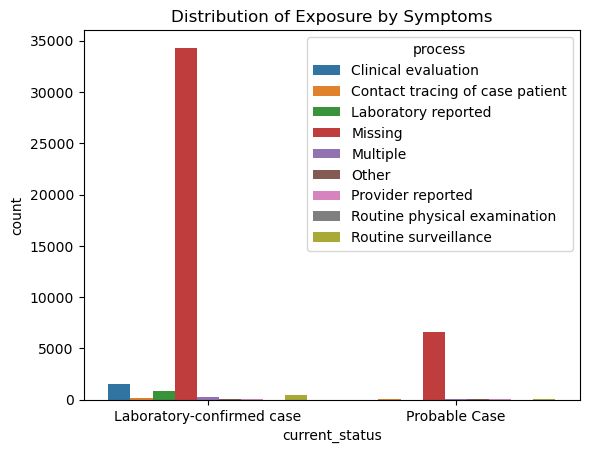

In [477]:
# Create the countplot
sns.countplot(data=df, x='current_status', hue='process')

# Set the title
plt.title('Distribution of Exposure by Symptoms')

# Show plot
plt.show()

- Let you know how many lab confirmed cases and how many probable cases and their process 

**underlying_conditions_yn** Vs **death_yn**

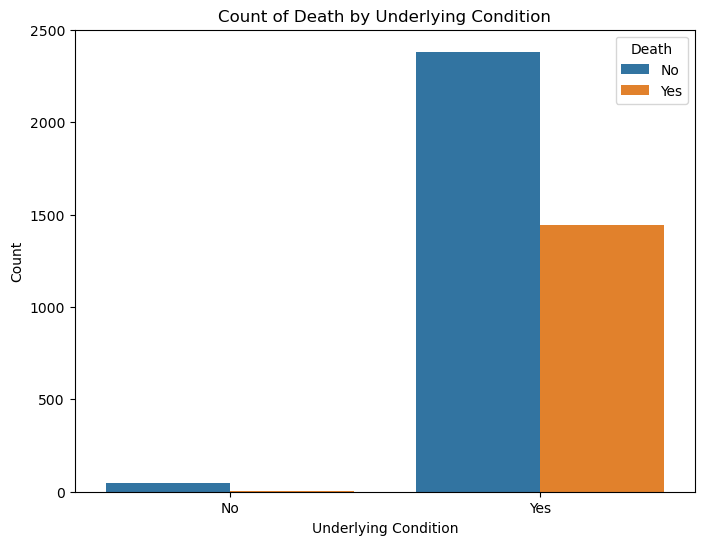

In [478]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='underlying_conditions_yn', hue='death_yn', data=df)

# Set plot labels and title
plt.xlabel('Underlying Condition')
plt.ylabel('Count')
plt.title('Count of Death by Underlying Condition')

# Show legend
plt.legend(title='Death', loc='upper right')

# Show plot
plt.show()

- Deaths are higher with people having underlying conditions

### Continuous Vs Categorical feature plots

**exposure_yn** Vs **case_onset_interval**

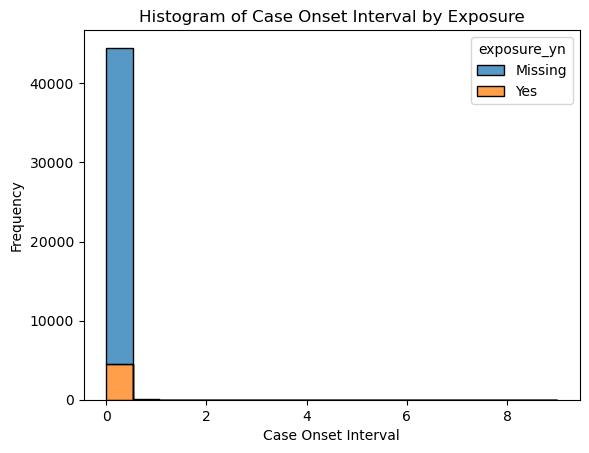

In [479]:
# Create a histogram plot
sns.histplot(data=df, x='case_onset_interval', hue='exposure_yn', element='step', multiple='stack')

# Set the title and labels
plt.title('Histogram of Case Onset Interval by Exposure')
plt.xlabel('Case Onset Interval')
plt.ylabel('Frequency')

# Show plot
plt.show()

- Cases are reported within a span of a week after being exposed to a patient having the virus

**case_positive_specimen_interval** Vs **process**

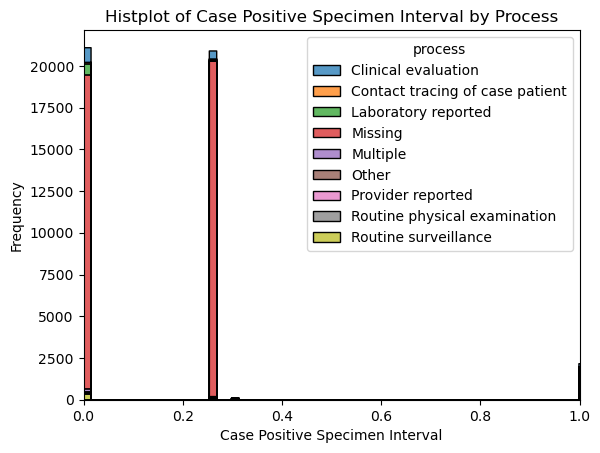

In [480]:
# Create a histogram plot
sns.histplot(data=df, x='case_positive_specimen_interval', hue='process', element='step', multiple='stack')

# Set the title and labels
plt.title('Histplot of Case Positive Specimen Interval by Process')
plt.xlabel('Case Positive Specimen Interval')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 1)

# Show plot
plt.show()

- After inital exposure to covid , most of the positive specimen is reported by Clinical Evaluation

**case_positive_specimen_interval** Vs **death_yn**

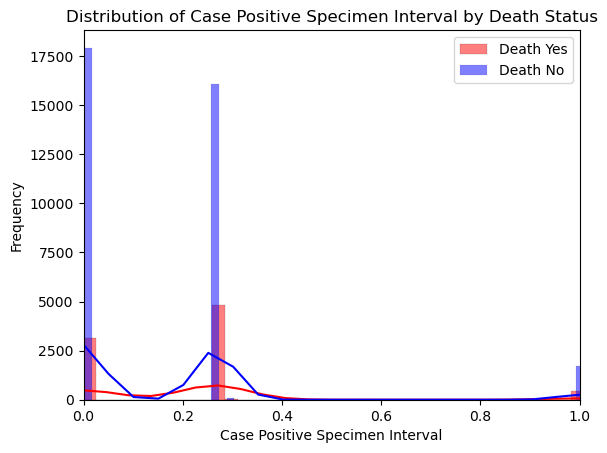

In [481]:
# Filter the DataFrame for each category of 'death_yn'
death_yes = df[df['death_yn'] == 'Yes']
death_no = df[df['death_yn'] == 'No']

# Create histograms for 'case_positive_specimen_interval' for each category of 'death_yn'
sns.histplot(death_yes['case_positive_specimen_interval'], color='red', alpha=0.5, label='Death Yes', kde=True)
sns.histplot(death_no['case_positive_specimen_interval'], color='blue', alpha=0.5, label='Death No', kde=True)

# Set the title and labels
plt.title('Distribution of Case Positive Specimen Interval by Death Status')
plt.xlabel('Case Positive Specimen Interval')
plt.ylabel('Frequency')

# Set y-axis limits
plt.xlim(0, 1)

# Add legend
plt.legend()

# Show plot
plt.show()

- Cases are reported positive within a span of weeks from earlier days and the case of death is slightly more after the second trimester of the 1st week

**death_yn** Vs **case_onset_interval**

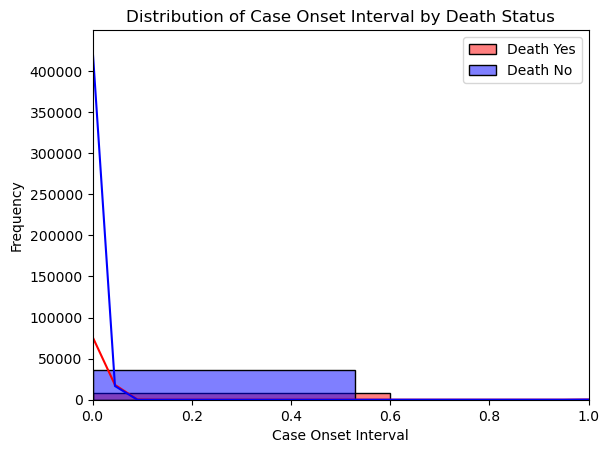

In [482]:
# Filter the DataFrame for each category of 'death_yn'
death_yes = df[df['death_yn'] == 'Yes']
death_no = df[df['death_yn'] == 'No']

# Create histograms for 'case_positive_specimen_interval' for each category of 'death_yn'
sns.histplot(death_yes['case_onset_interval'], color='red', alpha=0.5, label='Death Yes', kde=True)
sns.histplot(death_no['case_onset_interval'], color='blue', alpha=0.5, label='Death No', kde=True)

# Set the title and labels
plt.title('Distribution of Case Onset Interval by Death Status')
plt.xlabel('Case Onset Interval')
plt.ylabel('Frequency')

# Set y-axis limits
plt.xlim(0, 1)

# Add legend
plt.legend()

# Show plot
plt.show()

- Compares the cases of death with case onset interval, where it lets you know the frequency of cases reported after exposure

### - Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome? Explain in plain words (a short paragraph) the story of your findings so far.

- Continuous vs Continuous
    - Within our plot we have only 2 continuous columns and that reduces the number of plots which could be made by them.
    - We found a coeff of corelation of the 2 continuous columns are very minimal from the heatmap.
    - For the scatter plot we have an "L" shape, it typically indicates a relationship between the variables where one variable has a clear threshold or cutoff point beyond which the other variable changes.With one variable on the x-axis and the other on the y-axis, it suggests that there is a critical value of the x-variable beyond which the y-variable changes abruptly.
   
- Categorical vs Categorical
    - We see strong connection between the case_month and the states, which differs how the virus got spread across various states in a span of months. 
    - Even though the highest effected cases are within age group of 18-49, the number of deaths is higher from ages 65+. 
    - Highest gender cases are reported among Females and second with Males between the ages 18-49
    - Case recovery is highest among females compared to males to almost 12%.
    - Females with the group category of Non-Hispanic/Latino has the highest reported cases.
    - Highest reported cases among Whites compared to other races in both males and females, close to 30,000 cases combined
    - Among the prople admitted to the ICU, a majority of them has died, about 2000 cases
    - Lab conformed cases has still more than 3500 cases with missing processes, as the process can be either Lab reported or Clinical analysis, we cant come to a judgement there and keeping the missing values as is.
    - Underlying conditions does not always lead to critical condition or death according to the data, but deaths are slightly higher when the person has a underlying condition.
    
- Continuous vs Categorical
    - Majority of the people who had got exposure to the virus started showing their symptoms within the next 1 or 2 weeks
    - Highest amount of reported more than 2000 cases are by clinical evaluation
    - Cases of death is higher for those who had a case positive specimen offset of between 0.2- 0.4 comapred to others, about 5000 cases.
    - Close to 2000 cases who had tested positive was recoved within close to 0.6 of Case onset interval



# (4). Transform, extend or combine the existing features to create a few new features (at least 3)


#### New Feature 1

- Exposure_Symptoms : Measures if the person attained symptoms after exposure
- From Analysis of data, checks if the person had an exposure and started showing symptoms, then its Yes or No
- Its an easier way to confirm the probable case column in current status

<Axes: xlabel='exposure_symptoms'>

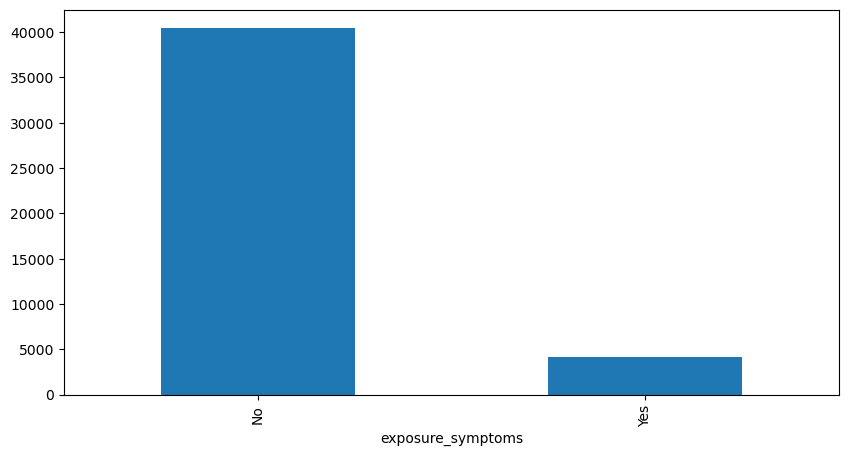

In [483]:
df['exposure_symptoms'] = 'No'
df.loc[(df['exposure_yn'] == 'Yes') & (df['symptom_status'] == 'Symptomatic'), 'exposure_symptoms'] = 'Yes'
df['exposure_symptoms'] = df['exposure_symptoms'].astype('category')
df["exposure_symptoms"].value_counts().plot(kind='bar', figsize=(10,5))

#### New Feature 2

- Death_without_medical_help : Measures if the person died without getting treatment
- From Analysis of data, checks if the person had died and if both the icu_yn or hosp_yn, No
- Its an easier way to confirm the death is with treatment or not

In [484]:
df['death_without_treatment'] = 'No'  # Initialize with 'No'
df.loc[(df['icu_yn'] == 'No') & (df['hosp_yn'] == 'No') & (df['death_yn'] == 'Yes'), 'death_without_treatment'] = 'Yes'
df[df['death_without_treatment']=='Yes'].head()

,case_month,res_state,state_fips_code,res_county,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,exposure_symptoms,death_without_treatment
21,2021-01,NV,32.0,CLARK,65+ years,Female,White,Non-Hispanic/Latino,0.000000,0.0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes,NaN,Yes,Yes
162,2020-06,OH,39.0,TRUMBULL,65+ years,Female,White,Non-Hispanic/Latino,0.264524,0.0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes,Yes,Yes,Yes
445,2020-12,OH,39.0,MARION,65+ years,Male,White,Non-Hispanic/Latino,0.264524,0.0,Clinical evaluation,Missing,Laboratory-confirmed case,Symptomatic,No,No,Yes,Yes,No,Yes
543,2020-11,NV,32.0,CLARK,65+ years,Female,White,Non-Hispanic/Latino,4.000000,0.0,Routine surveillance,Missing,Laboratory-confirmed case,Symptomatic,No,No,Yes,Yes,No,Yes
927,2020-11,PA,42.0,CHESTER,65+ years,Male,White,Non-Hispanic/Latino,0.000000,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes,NaN,Yes,Yes


<Axes: xlabel='death_without_treatment'>

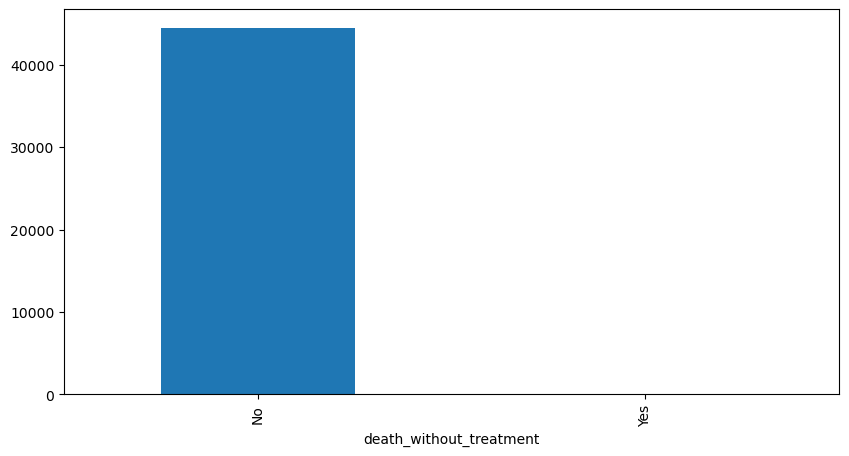

In [485]:
df['death_without_treatment'] = df['death_without_treatment'].astype('category')
df["death_without_treatment"].value_counts().plot(kind='bar', figsize=(10,5))

#### New Feature 3

- Priority_yn : Treatment priority should be given to people above the age of 65+ , 
- From Analysis of data, checks if the person is 65+ and also has got exposure to the virus, 
- Due to old age, their antibodies are weaker and can cause sivere effects and chances of death is higher

<Axes: xlabel='priority_yn'>

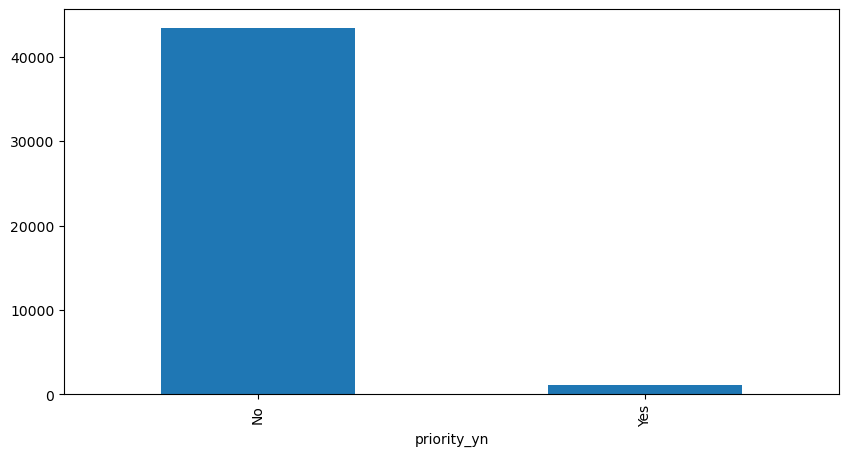

In [486]:
df['priority_yn'] = 'No'  # Initialize with 'No'
df.loc[(df['age_group'] == '65+ years') & (df['exposure_yn'] == 'Yes'), 'priority_yn'] = 'Yes'
df['priority_yn'] = df['priority_yn'].astype('category')
df["priority_yn"].value_counts().plot(kind='bar', figsize=(10,5))

#### New Feature 4
- Quarantine_yn : Checks if the person needs to be quarentined or not
- Check if the person is not dead and also is a lab confirmed case
- This colum can help the officials to have routine checks to see if Covid guidelines are followed

<Axes: xlabel='quarantine_yn'>

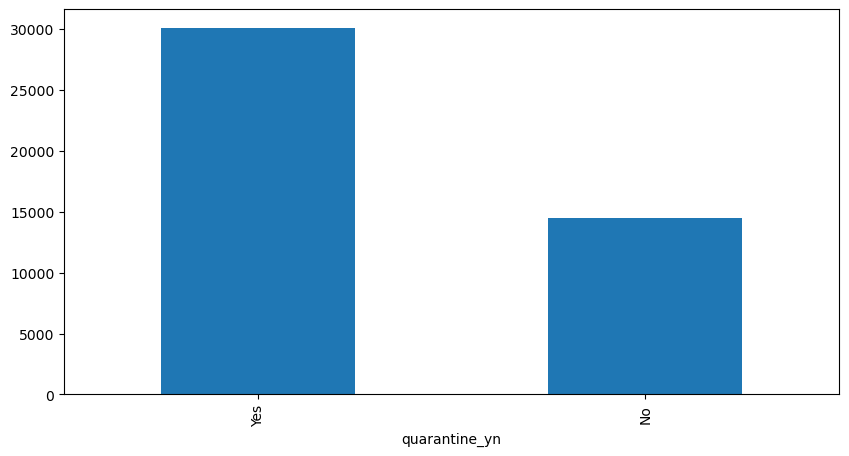

In [487]:
df['quarantine_yn'] = 'No'  # Initialize with 'No'
df.loc[(df['death_yn'] != 'Yes') & (df['current_status'] == 'Laboratory-confirmed case'), 'quarantine_yn'] = 'Yes'
df['quarantine_yn'] = df['quarantine_yn'].astype('category')
df["quarantine_yn"].value_counts().plot(kind='bar', figsize=(10,5))

#### New Feature 5
- Year and Month : Splits the case_month column to Year and Month separately
- Helps to individually analyze a pattern within months of different years
- Ex. Like covid rises during summer and reduces during winter due to crowds on the streets

Text(0.5, 1.0, 'Box Plot of Month vs. Year')

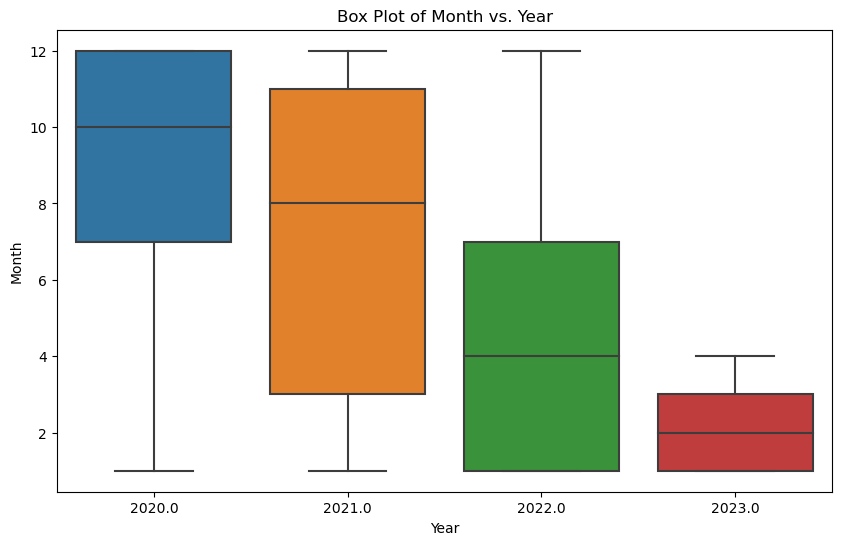

In [488]:
# Split the 'case_month' column into 'Year' and 'Month' columns
df[['year', 'month']] = df['case_month'].str.split('-', expand=True)

# Convert the 'Year' and 'Month' columns to integers
df['year'] = df['year'].astype(float)
df['month'] = df['month'].astype(float)
df['year'] = df['year'].astype('float64')
df['month'] = df['month'].astype('float64')
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='month', data=df)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Box Plot of Month vs. Year')

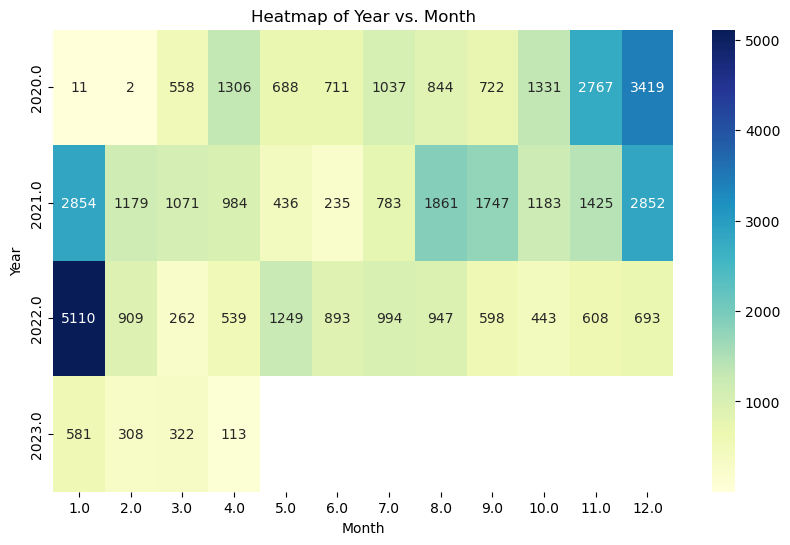

In [489]:
# Create a pivot table with Year as index, Month as columns, and count as values
pivot_table = df.pivot_table(index='year', columns='month', aggfunc='size')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Year vs. Month')

# Show plot
plt.show()

#### New Feature 6 (Just an idea)
Vaccinated_yn : Treatment might differ based on if the person has been vaccinated or not ,
But populating this colum requires the vaccination deatails and client ID to attain the vaccination status,
Currently as we dont have enough data to create this feature, we cant proceed further

### Check logical integrity of derived data 

1. Check if the Year does not go below 2020 and Month is between 1-12

In [490]:
test_13 = df[['year']][df['year']<2020]
print("Number of rows failing the test: ", test_13.shape[0])
test_13.head()

Number of rows failing the test:  0


,year


In [491]:
test_14 = df[['month']][(df['month']>12) | (df['month']<1)]
print("Number of rows failing the test: ", test_14.shape[0])
test_14.head()

Number of rows failing the test:  0


,month


### To finish - Print data types, descriptive tables, save to csv

In [492]:
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
exposure_symptoms                  category
death_without_treatment            category
priority_yn                        category
quarantine_yn                      category
year                            

#### Print continuous statistics

In [493]:
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Print table with descriptive statistics for all the continuous features
df_table_numeric = df[continuous_columns].describe().T

# Prepare %missing column
numeric_columns_missing  = 100 * (df[continuous_columns].isnull().sum()/df.shape[0])
# storing the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing


numeric_columns_card = df[continuous_columns].nunique()
# storing the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['unique'])
df_numeric_card

# Putting the columns together to prepare the final table for numeric_columns
continuousFeatueDesc = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Continuous Columns Statistics
continuousFeatueDesc

,count,mean,std,min,25%,50%,75%,max,%missing,unique
case_positive_specimen_interval,44575.0,0.195010,0.352054,0.0,0.0,0.264524,0.264524,10.0,0.0,13
case_onset_interval,44575.0,0.004520,0.148284,0.0,0.0,0.000000,0.000000,9.0,0.0,11
year,44575.0,2021.056018,0.844604,2020.0,2020.0,2021.000000,2022.000000,2023.0,0.0,4
month,44575.0,6.665463,4.045850,1.0,3.0,7.000000,11.000000,12.0,0.0,12


In [494]:
continuousFeatueDesc.to_csv("continuousFeatureDescription_2.csv")

#### Print categorical statistics

In [495]:
# Print table with categorical statistics
categorical_columns = df.select_dtypes(['category']).columns
df_table_categ = df[categorical_columns].describe().T
df_table_categ

# store the 2ndmode and 2ndmode % values in a new dataframe
df_category_mode = pd.DataFrame(index = df_table_categ.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

# Prepare %missing column
category_columns_perc_missing = 100 * ((df[categorical_columns].isin(['Missing', 'missing', 'unknown', 'Unknown', '-', '']) | df[categorical_columns].isnull()).sum() / df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

# Look at the values taken by each categorical feature
for column in categorical_columns:
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'
        
# Categorical Columns Statistics
categoricalFeatueDesc = pd.concat([df_table_categ, df_category_mode, df_category_perc_missing], axis=1)

categoricalFeatueDesc

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
case_month,44575,40,2022-01,5110,2022-01,5110,0.114638,2020-12,3419,0.076702,0.000000
res_state,44574,49,NY,4713,NY,4713,0.105734,NC,4436,0.09952,0.002243
state_fips_code,44574.0,49.0,36.0,4713.0,36.0,4713,0.105734,37.0,4436,0.09952,0.002243
res_county,41927,962,MIAMI-DADE,788,MIAMI-DADE,788,0.018795,MARICOPA,614,0.014645,5.940550
age_group,44194,5,18 to 49 years,17642,18 to 49 years,17642,0.399194,65+ years,12522,0.283342,0.982614
sex,43495,3,Female,22708,Female,22708,0.522083,Male,20595,0.473503,2.853617
race,38745,7,White,27056,White,27056,0.698309,Missing,5432,0.140199,25.265283
ethnicity,38208,4,Non-Hispanic/Latino,26582,Non-Hispanic/Latino,26582,0.695718,Unknown,5881,0.153921,32.464386
process,44575,9,Missing,40947,Missing,40947,0.918609,Clinical evaluation,1579,0.035423,91.860909
exposure_yn,44575,2,Missing,40076,Missing,40076,0.899069,Yes,4499,0.100931,89.906898


In [496]:
categoricalFeatueDesc.to_csv("categoricalFeatureDescription_2.csv")

In [353]:
# Final changes saved to covid19_cdc_2320067_cleaned_3.csv
df.to_csv('covid19_cdc_2320067_cleaned_3.csv', index=False)

#### That's All Folks